## Описание данных

 - `Размер` - размер сумки *(категориальный признак)*
 - `Категория` - тоут/через плечо/с короткими ручками/рюкзаки/клатчи/аксессуары для сумок *(категориальный признак)*
 - `Бренд` - бренд сумки *(категориальный признак)*
 - `Материал сумок` *(категориальный признак)*
 - `Цвет` - цвет сумки *(категориальный признак)*
 - `Длина ручки` *(категориальный признак)*
 - `Наличие пыльника` *(бинарный признак)*
 - `Состояние товара` *(категориальный признак)*
 - `Продавец` *(категориальный признак)*
 - `Модель` *(категориальный признак)*
 - `Винтаж` - является ли сумка винтажной *(бинарный признак)*
 - `Наличие коробки` *(бинарный признак)*
 - `Наличие сертификата` *(бинарный признак)* 
 
 И одна целевая переменная `Цена` - цена сумки, рубли.

---

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import STOPWORDS, WordCloud

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('bags_df_process.csv')
df.head(10)

Размер                  Категория           Бренд      Материал сумок  \
0   INT L  Сумки с короткими ручками     MARC JACOBS   Экзотическая кожа   
1   INT S    Клатчи и вечерние сумки         VERSACE                Кожа   
2   INT M          Сумки через плечо      BALENCIAGA                Кожа   
3   INT U  Сумки с короткими ручками        BURBERRY                Кожа   
4   INT M  Сумки с короткими ручками  KARL LAGERFELD  Искусственная кожа   
5   INT U    Клатчи и вечерние сумки         BVLGARI   Экзотическая кожа   
6   INT S          Сумки через плечо  KARL LAGERFELD  Искусственная кожа   
7  INT XS          Сумки через плечо     MARC JACOBS                Кожа   
8  INT XS  Сумки с короткими ручками      BALENCIAGA   Экзотическая кожа   
9  INT XS  Сумки с короткими ручками      BALENCIAGA   Экзотическая кожа   

         Цвет     Длина ручки  Наличие пыльника    Состояние товара  \
0  Серебряный   Средние ручки                 1  Отличное состояние   
1      Черный  Короткие ручки                 0  Отличное состояние   
2      Желтый  Длинный ремень                 0      Новое с биркой   
3  Коричневый   Средние ручки                 0  Отличное состояние   
4      Мульти   Средние ручки                 0      Новое с биркой   
5  Коралловый  Короткие ручки                 0      Новое с биркой   
6       Синий  Длинный ремень                 0      Новое с биркой   
7     Золотой  Длинный ремень                 0   Хорошее состояние   
8  Коричневый  Короткие ручки                 0      Новое с биркой   
9      Черный  Короткие ручки                 0      Новое с биркой   

           Продавец     Цена    Модель  Винтаж  Наличие коробки  \
0  Частный продавец    52000  Ordinary       0                0   
1  Частный продавец    38000  Ordinary       0                0   
2  Частный продавец   345000     Crush       0                0   
3  Частный продавец    27000  Ordinary       1                0   
4  Частный продавец    17950  Ordinary       0                0   
5  Частный продавец  2800000  Serpenti       0                0   
6  Частный продавец    15150  Ordinary       0                0   
7  Частный продавец    13600  Ordinary       0                0   
8  Частный продавец   690000  Ordinary       0                0   
9  Частный продавец   690000  Ordinary       0                0   

   Наличие сертификата  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
5                    0  
6                    0  
7                    0  
8                    0  
9                    0

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Размер               1051 non-null   object
 1   Категория            1051 non-null   object
 2   Бренд                1051 non-null   object
 3   Материал сумок       1051 non-null   object
 4   Цвет                 1051 non-null   object
 5   Длина ручки          1051 non-null   object
 6   Наличие пыльника     1051 non-null   int64 
 7   Состояние товара     1051 non-null   object
 8   Продавец             1051 non-null   object
 9   Цена                 1051 non-null   int64 
 10  Модель               1051 non-null   object
 11  Винтаж               1051 non-null   int64 
 12  Наличие коробки      1051 non-null   int64 
 13  Наличие сертификата  1051 non-null   int64 
dtypes: int64(5), object(9)
memory usage: 115.1+ KB


- - -

## Анализ категориальных признаков

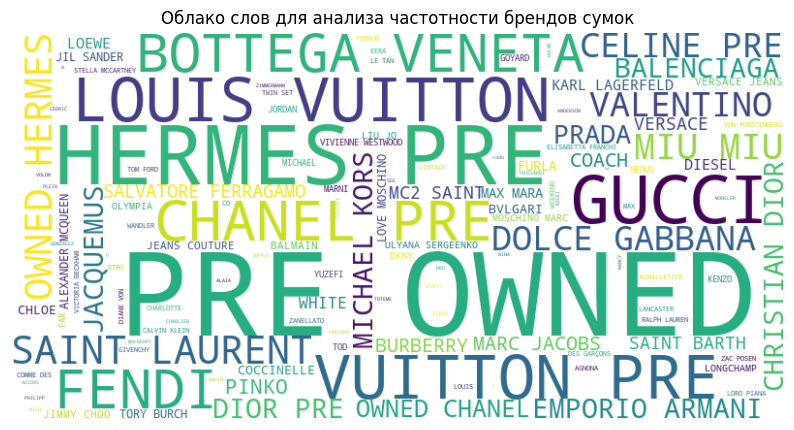

In [4]:
text = ' '.join(df['Бренд'].astype(str))
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Облако слов для анализа частотности брендов сумок')
plt.show()


**Вывод:** Как видно из графика, самыми распространенныеми брендами сумок на сайте оказались Hermes, Louis Vuitton, Gucci, Chanel и Bottega Veneta. Cреди наиболее редко встречающихся брендов сумок на вторичном рынке присутствуют бренды более бюджетного сегмента. Подобные результаты связаны с тем, что осталась возможность приобрести эти бренды в России, например, на Ламоде или в бутиках. Но также среди менее популярных оказались и дорогие бренды с длинной истоией, например, Goyard, о котором модники в России узнали судя по всему не так давно. Тут у меня несколько предположений, которые я могу сделать, основываясь на собственном опыте: 1. Люди решили приобрести подделки (потому что я вижу их очень много на людях). 2. Все сумки уже раскупили (что менее вероятно, т.к. при высоком спросе частные продавцы просто купили бы еще сумок)

---

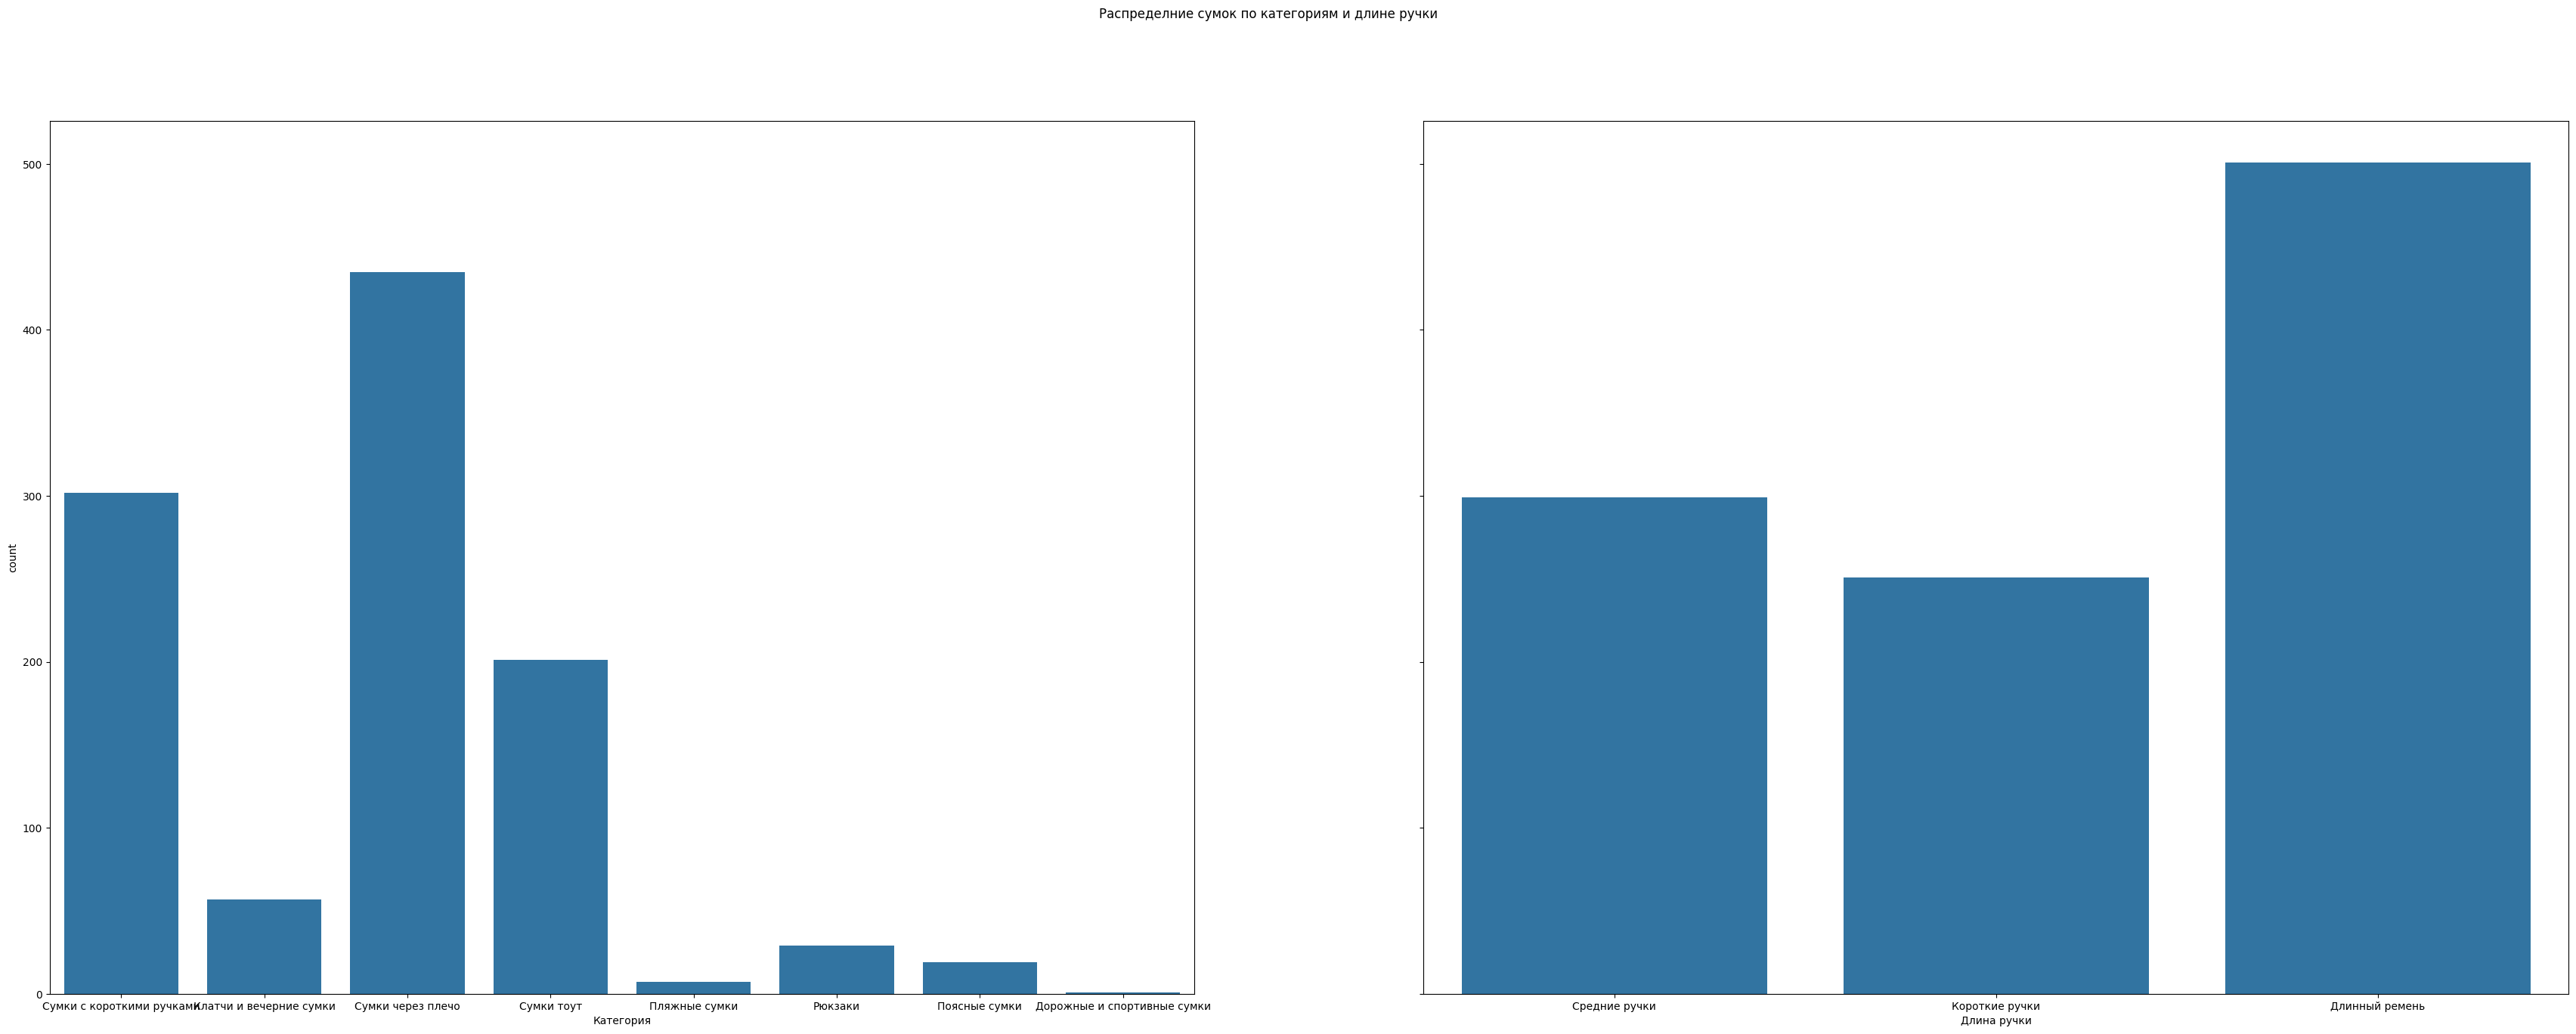

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(43, 15), sharey=True)  # посмотрим на следующие категоральные признаки,
sns.countplot(x='Категория', data=df, ax=axes[0])  # отвечающие за цвет за цвет салона и кузова
plt.suptitle('Распределние сумок по категориям и длине ручки')
sns.countplot(x='Длина ручки', data=df, ax=axes[1]);

**Вывод:** Итак, посмотрев на распределние количества сумок по категориям, нетрудно сделать вывод о популярности сумок через плечо, которые являются зачастую самыми бюджетными из-за небольшого размера и достаточно удобными. Но также достаточно много сумок с короткими ручками и сумок тоут. 

Распределение же сумок относительно длины ручки показывает, что самыми распространенными являются сумки на длинном ремне, что соответствует результатам по категориям сумок. 

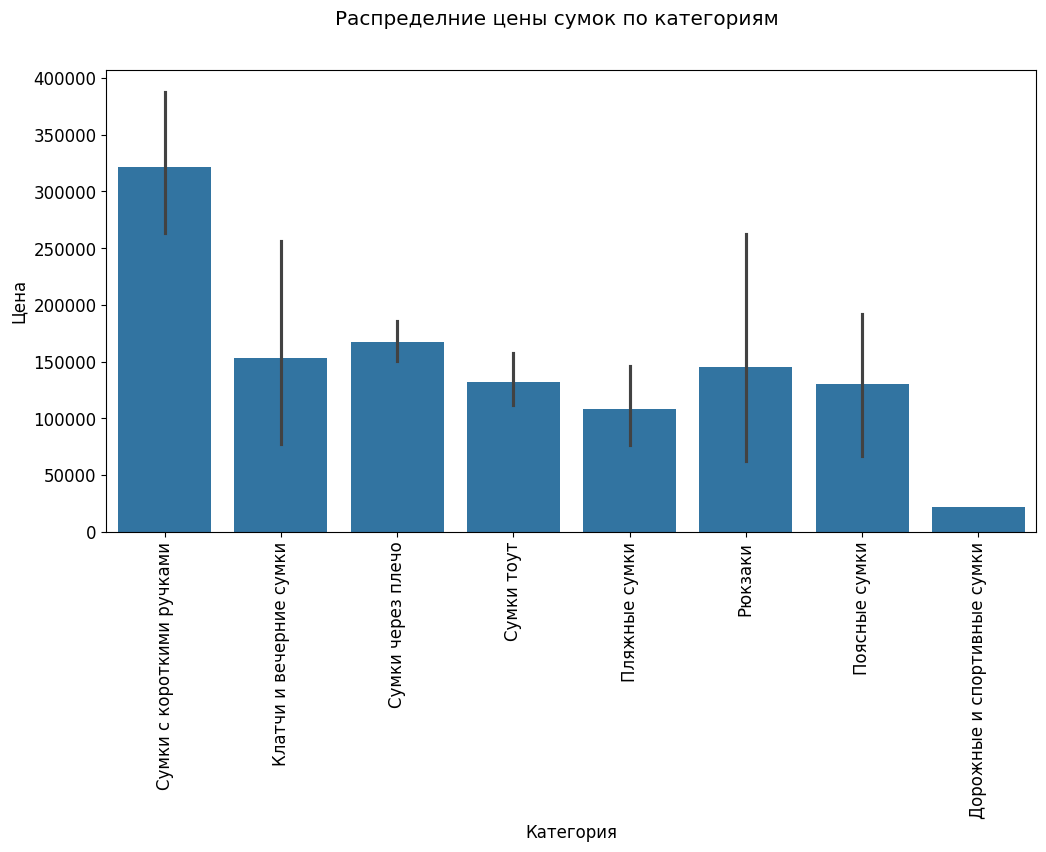

In [6]:
plt.rcParams.update({'font.size':12 })
sns.barplot(x="Категория", y="Цена", data=df)

plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(12, 6)

plt.suptitle('Распределние цены сумок по категориям')
plt.show()

**Вывод:** Здесь график показывает нам, что самыми дорогими являются сумки с короткими ручками, а вот сумки через плечо значительно дешевле как я и предположила под прошлым графиком. Еще примечательно, что сумки из наименее популярных категорий категорий имеют наибольшие выбросы.

---

Text(0.5, 0.98, 'Распределние сумок по модели')

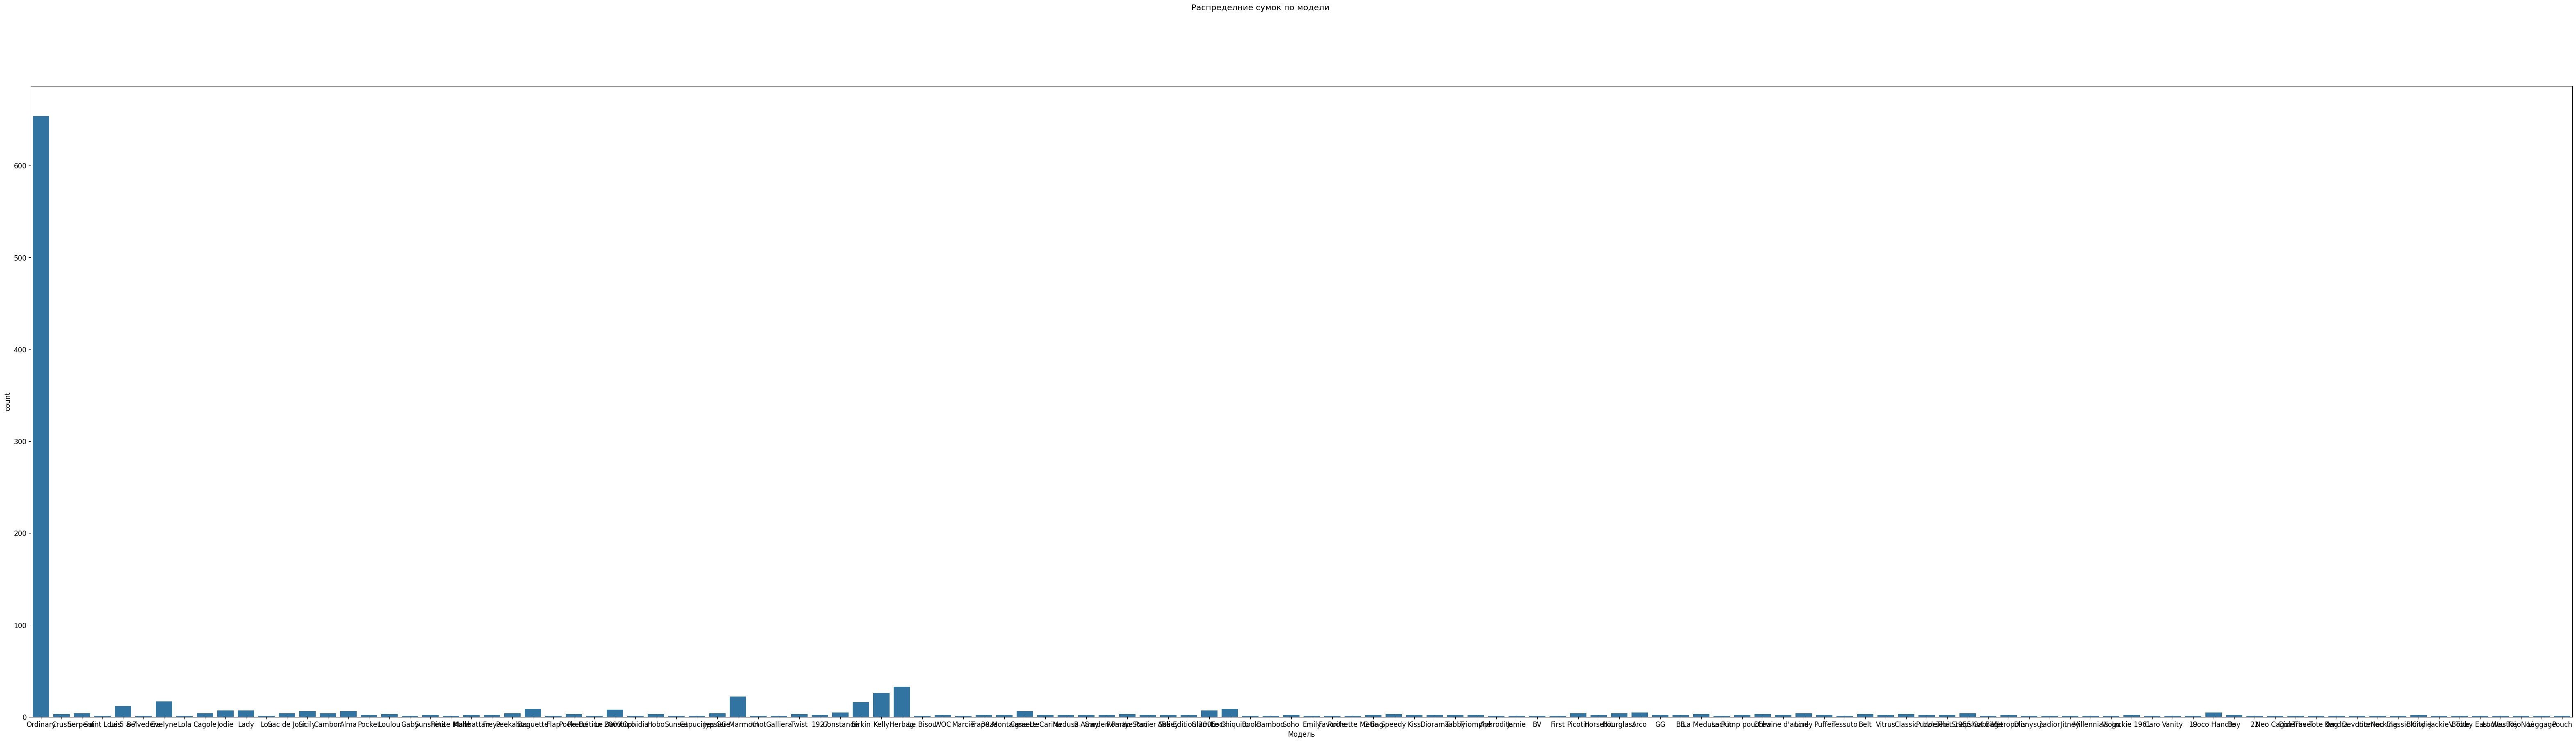

In [7]:
ax, fig = plt.subplots(figsize=(80, 20))
sns.countplot(x='Модель', data=df)
plt.suptitle('Распределние сумок по модели')

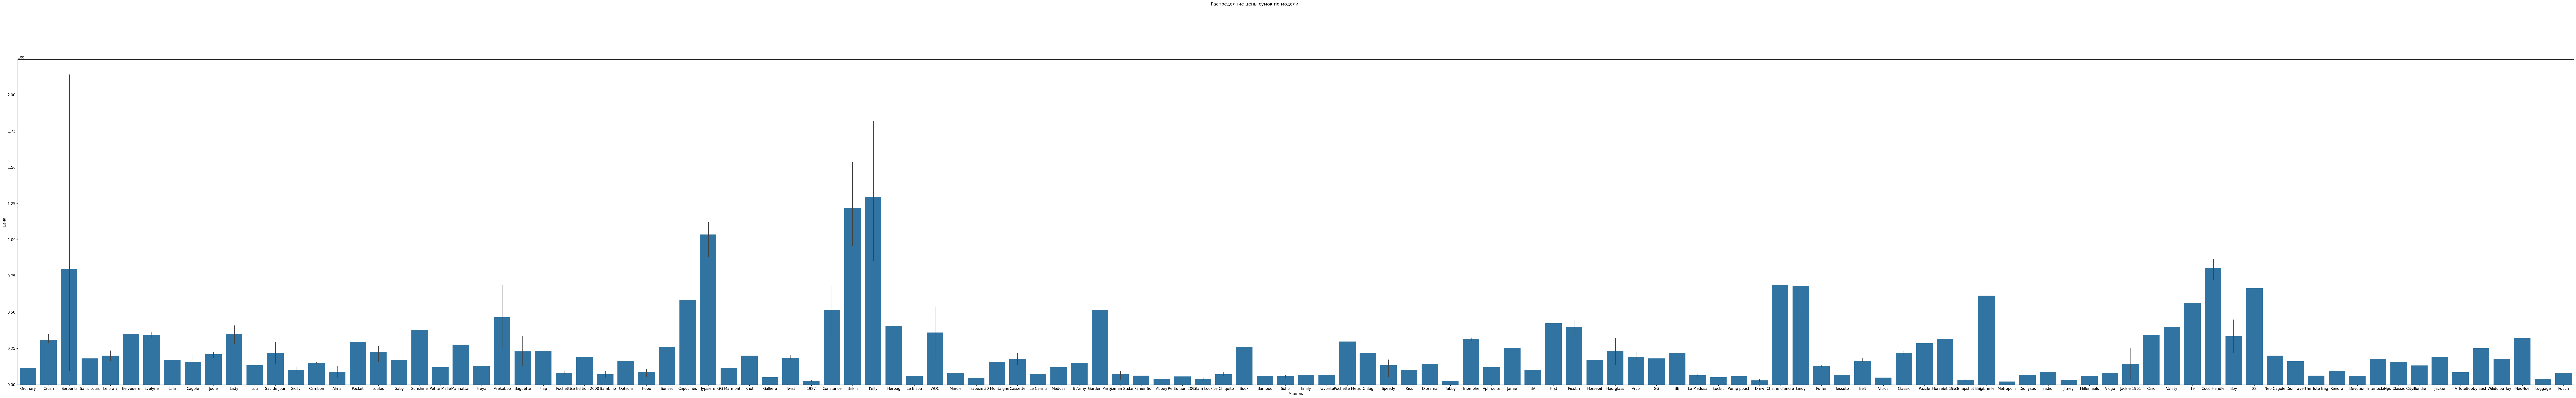

In [8]:
sns.barplot(x="Модель", y="Цена", data=df)
fig = plt.gcf()
fig.set_size_inches(150, 20)
plt.suptitle('Распределние цены сумок по модели')
plt.subplots_adjust(top=0.85)
plt.show()

Видно, что некоторые модели стоят значительно больше, чем сумки без обозначения модели. Для этих моделей я нашла название соответствующих им брендов. И сделала отдельные базы данных для этих брендов.

In [9]:
hermes_df = df[df['Бренд'] == 'HERMES PRE-OWNED']
balenci_df = df[df['Бренд'] == 'BALENCIAGA']
bvlg_df = df[df['Бренд'] == 'BVLGARI']
sl_df = df[df['Бренд'] == 'SAINT LAURENT']
goyard_df = df[df['Бренд'] == 'GOYARD']
burberry_df = df[df['Бренд'] == 'BURBERRY']
prada_df = df[df['Бренд'] == 'PRADA']
fendi_df = df[df['Бренд'] == 'FENDI']
lv_df = df[df['Бренд'] == 'LOUIS VUITTON PRE-OWNED']
chanel_df = df[df['Бренд'] == 'CHANEL PRE-OWNED']
dior_df = df[df['Бренд'] == 'CHRISTIAN DIOR PRE-OWNED']

## Hermes

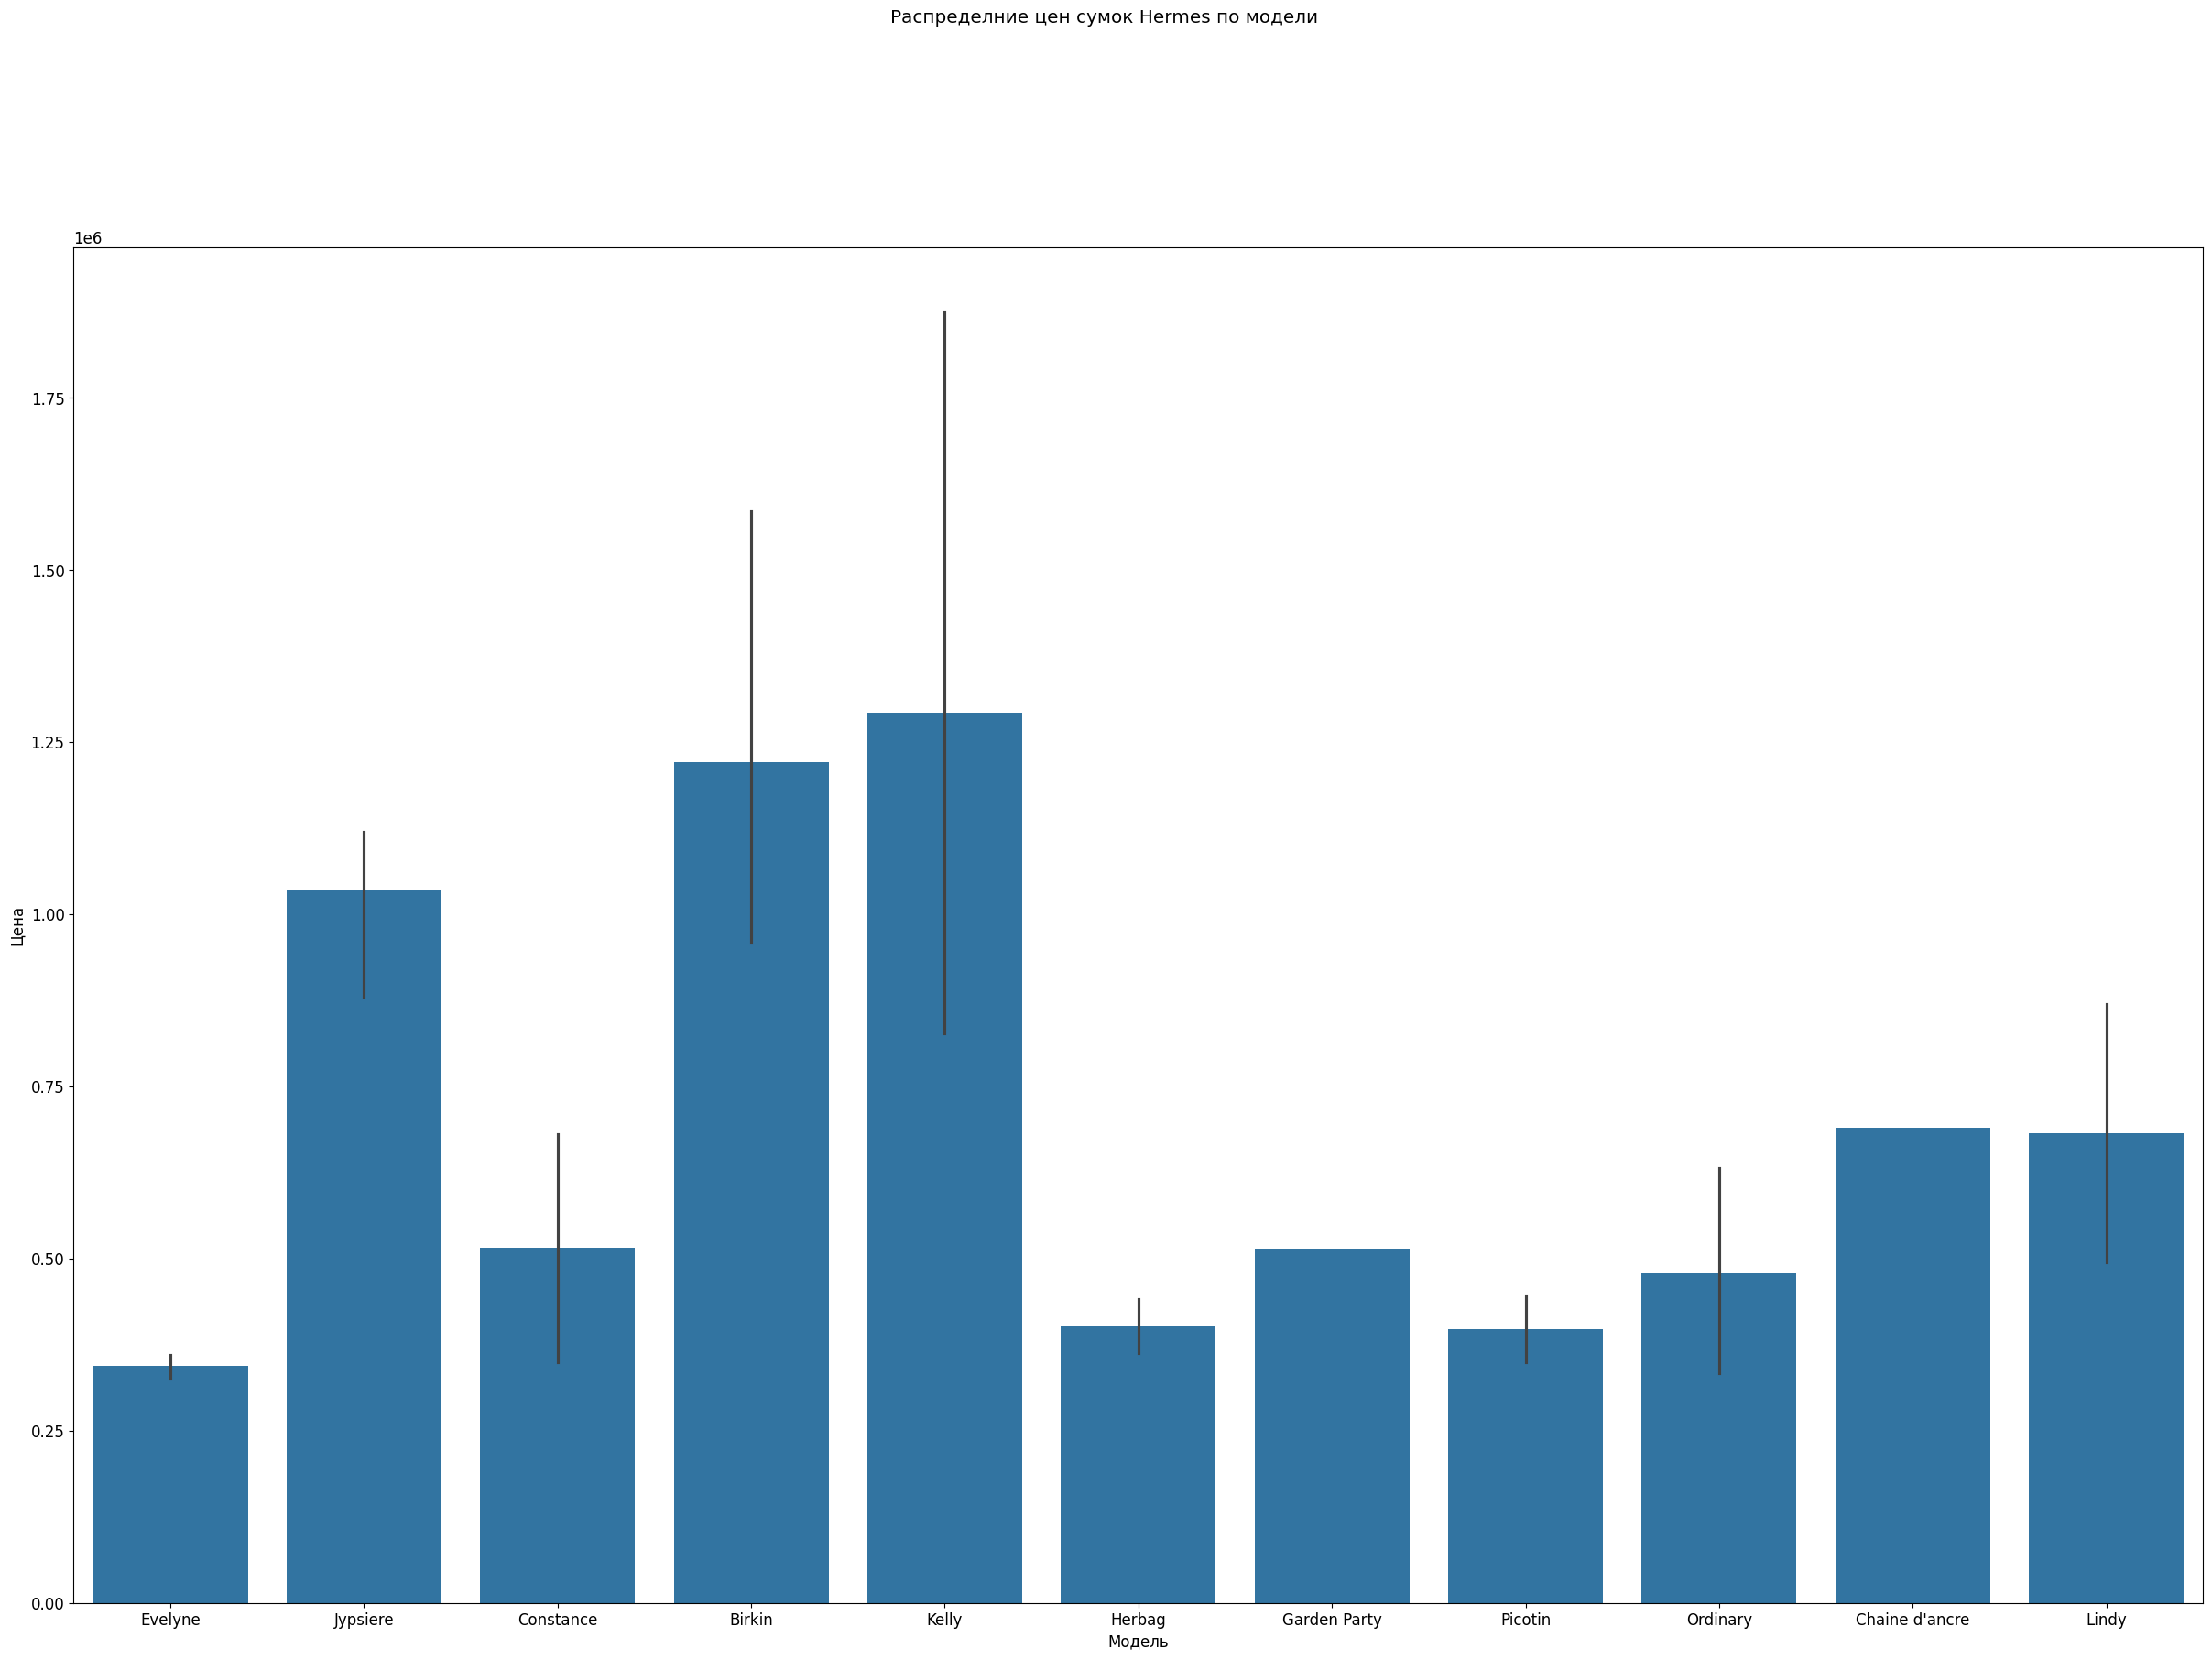

In [10]:
sns.barplot(x="Модель", y="Цена", data=hermes_df)
fig = plt.gcf()
fig.set_size_inches(30, 20)
plt.suptitle('Распределние цен сумок Hermes по модели')
plt.subplots_adjust(top=0.85)
plt.show()

Jypsiere, Birkin, Kelly - остаются как модели, остальное - ordinary

In [11]:
hermes_df['Модель'] = hermes_df['Модель'].apply(lambda x: x if x == 'Jypsiere' or x == 'Birkin'or x == 'Kelly' else 'Ordinary')
df[df['Бренд'] == 'HERMES PRE-OWNED'] = hermes_df

## Balenciaga

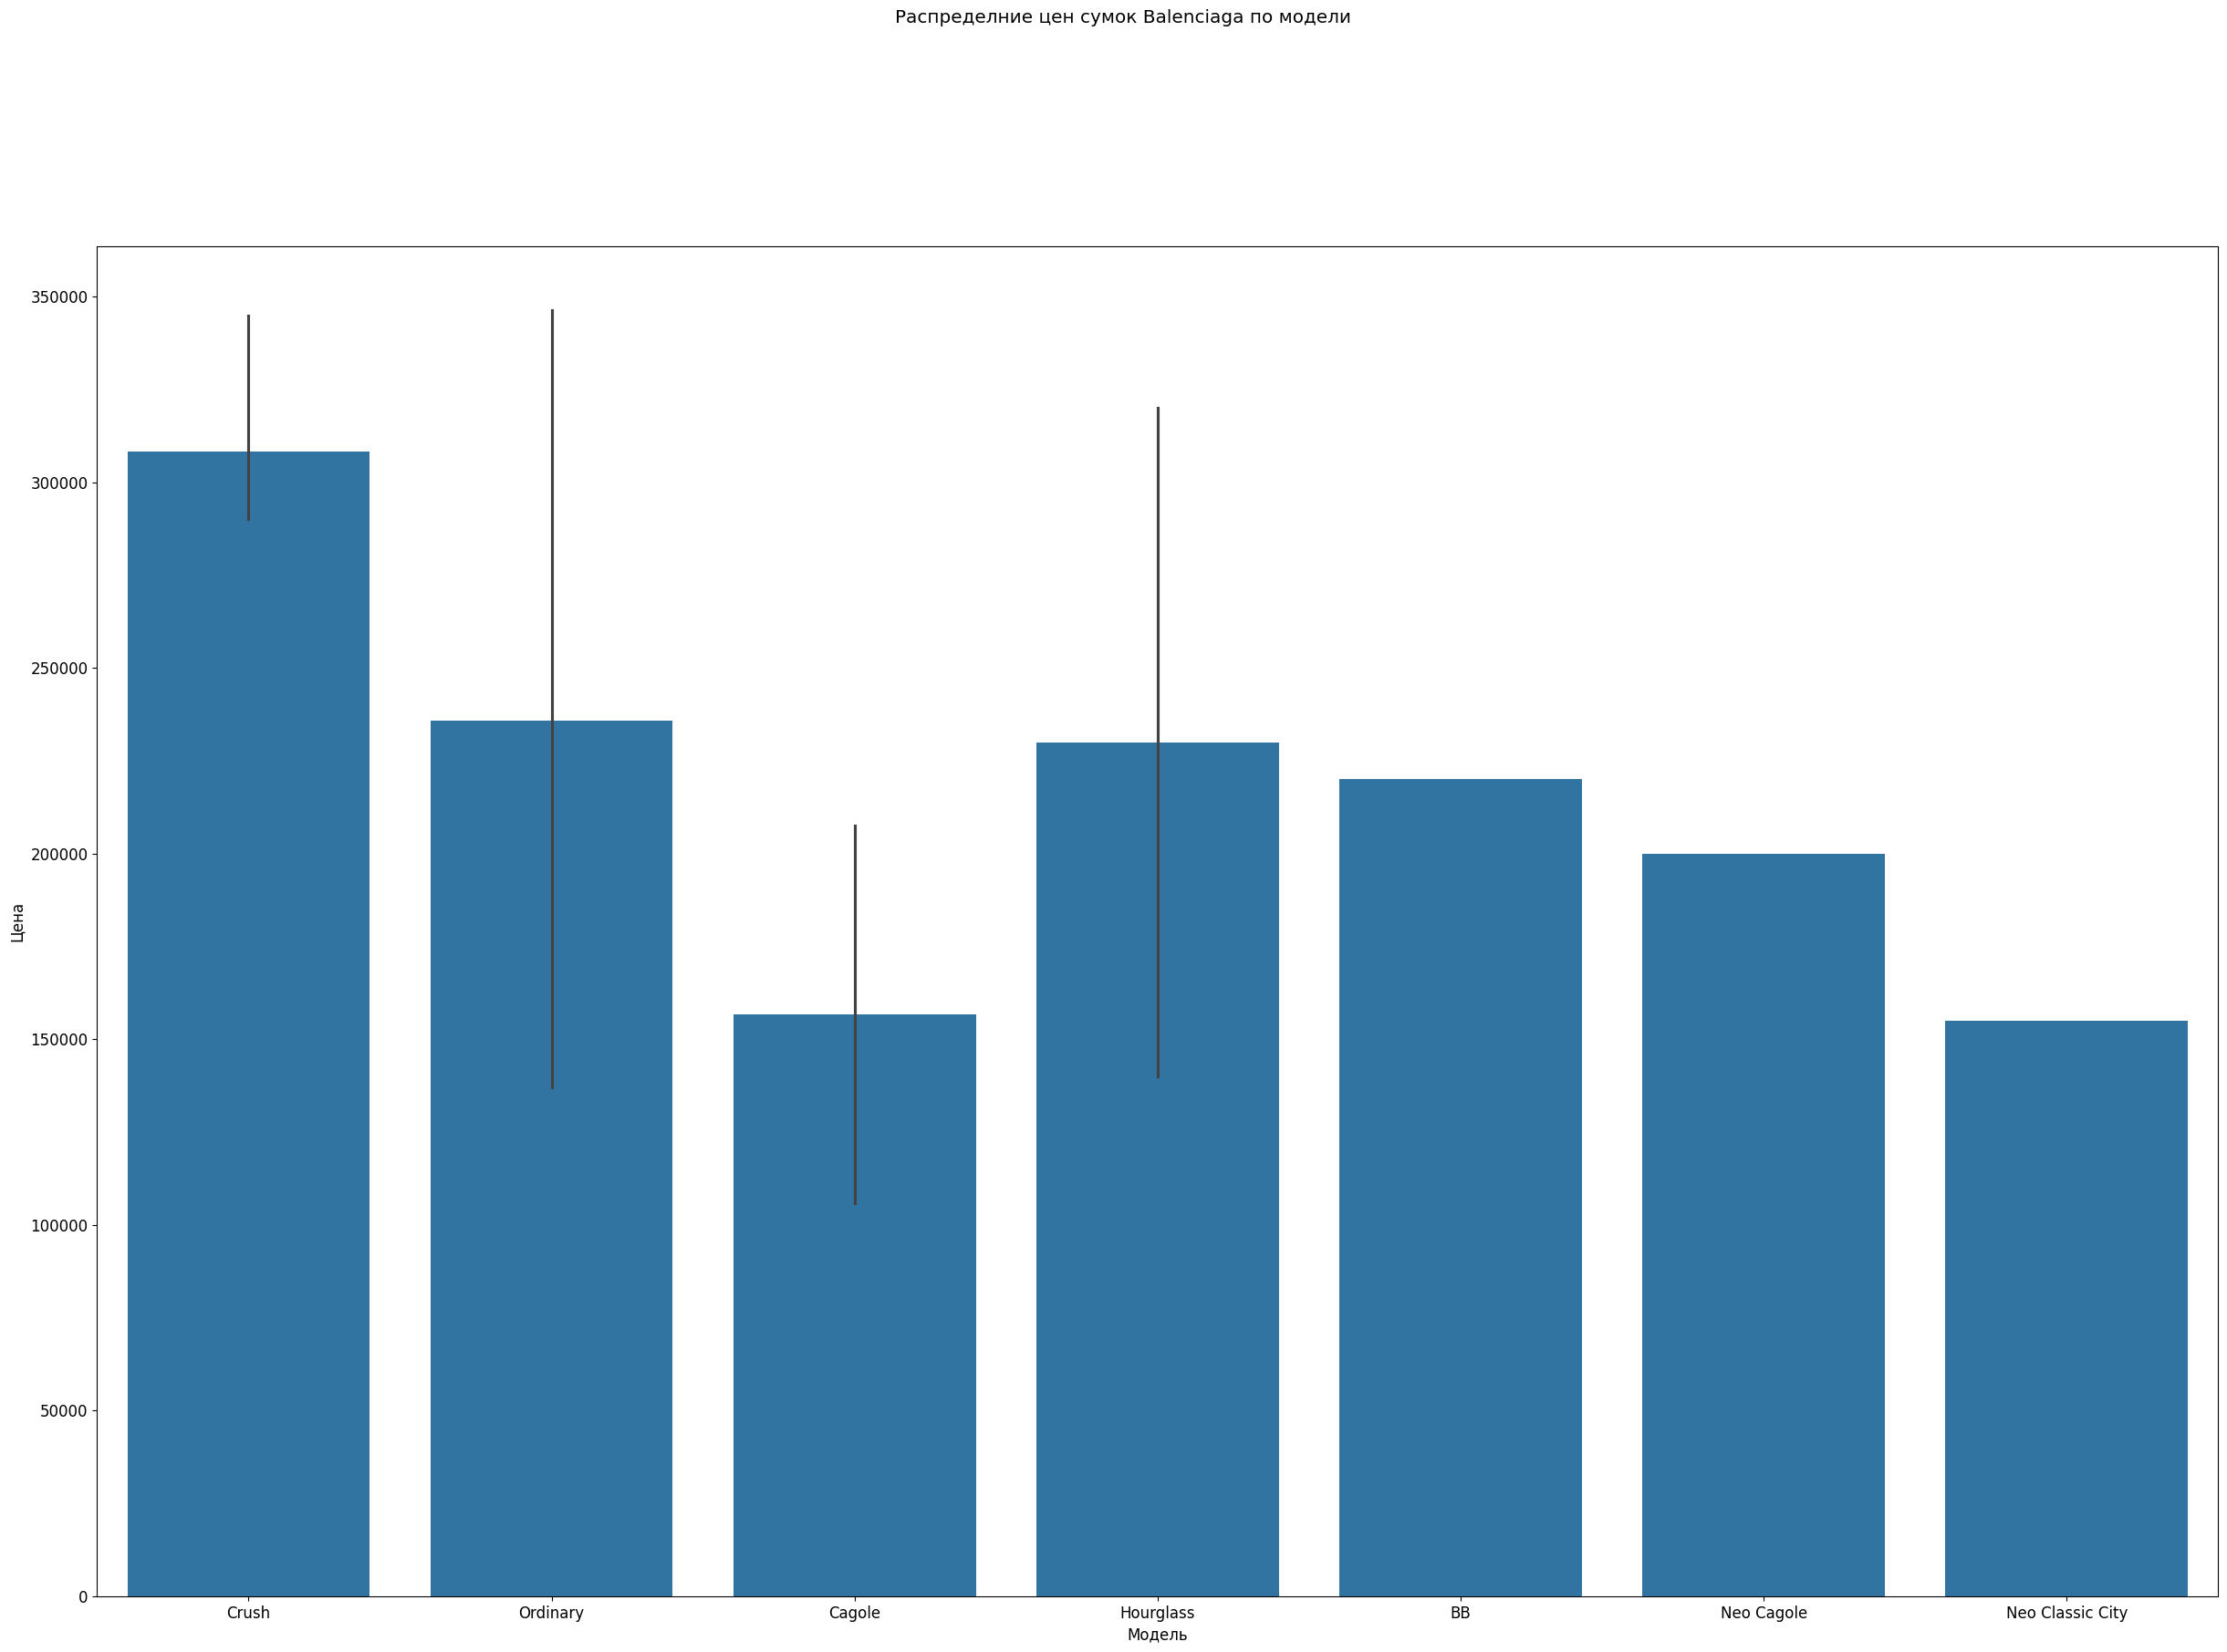

In [12]:
sns.barplot(x="Модель", y="Цена", data=balenci_df)
fig = plt.gcf()
fig.set_size_inches(30, 20)
plt.suptitle('Распределние цен сумок Balenciaga по модели')
plt.subplots_adjust(top=0.85)
plt.show()

Crush - остается как модель, а остальное - ordinary

In [13]:
balenci_df['Модель'] = balenci_df['Модель'].apply(lambda x: x if x == 'Crush' else 'Ordinary')
df[df['Бренд'] == 'BALENCIAGA'] = balenci_df

## BVLGARI

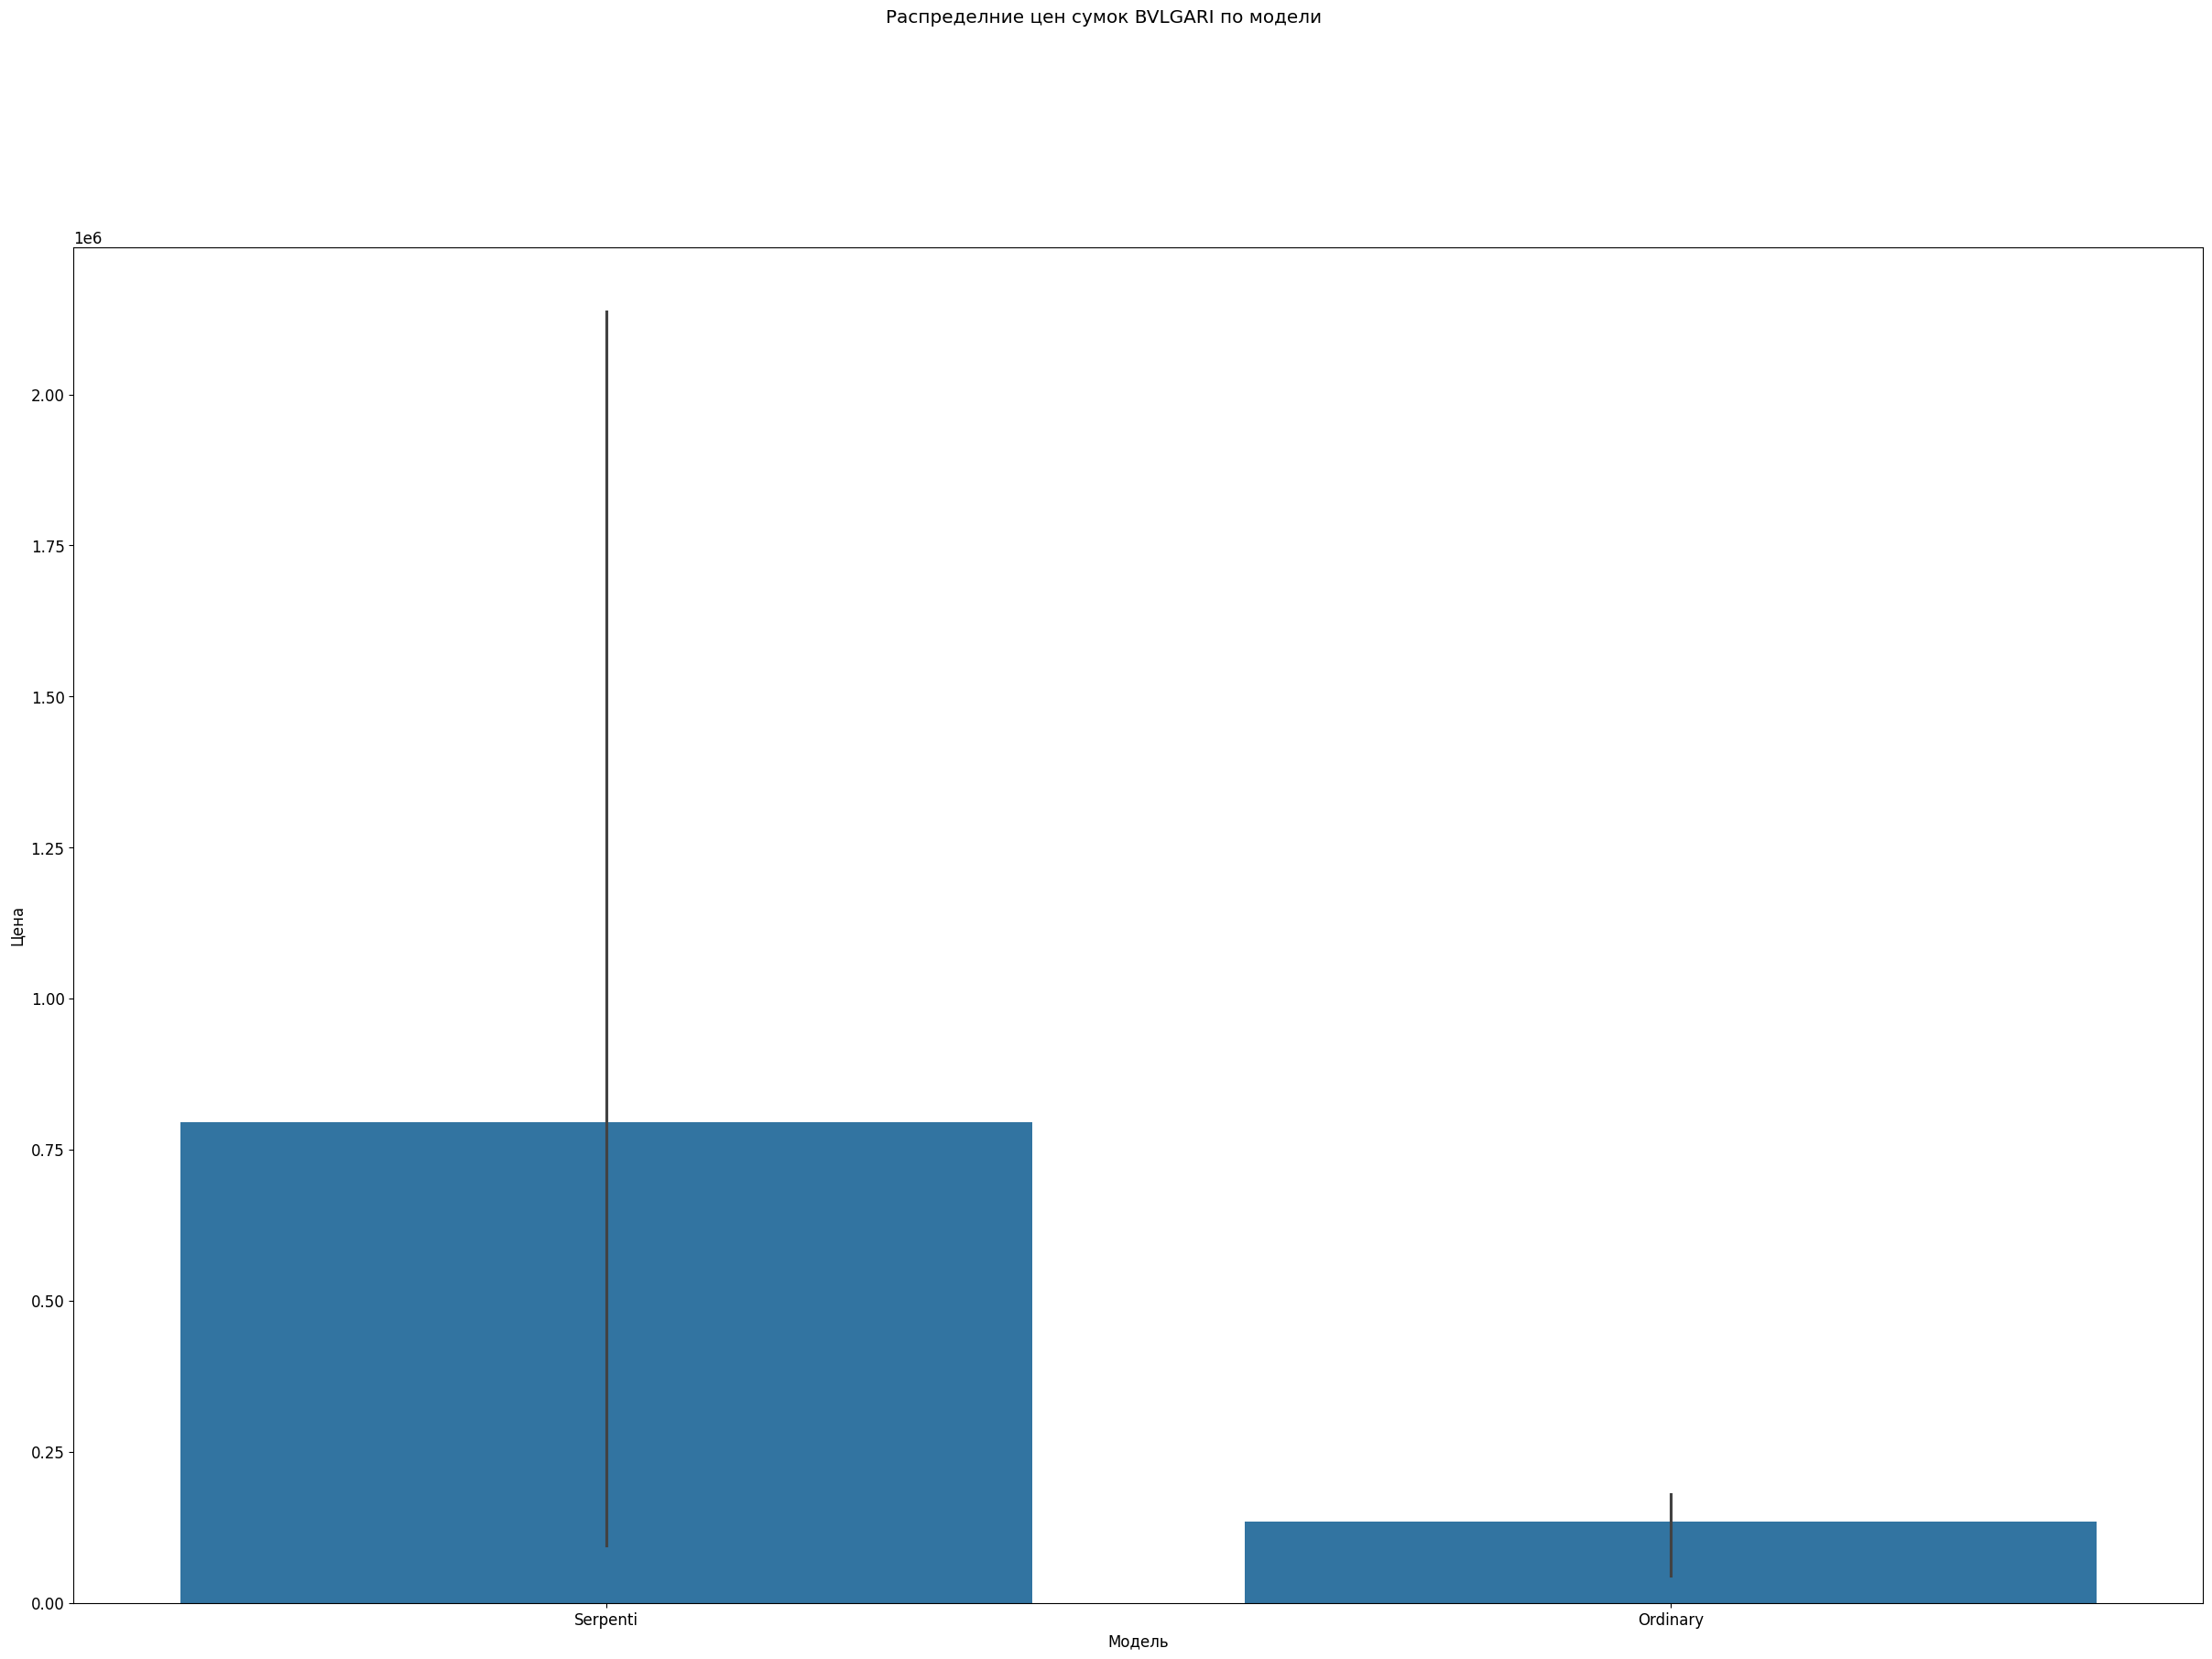

In [14]:
sns.barplot(x="Модель", y="Цена", data=bvlg_df)
fig = plt.gcf()
fig.set_size_inches(30, 20)
plt.suptitle('Распределние цен сумок BVLGARI по модели')
plt.subplots_adjust(top=0.85)
plt.show()

Тут вообще только две сумки, поэтому тут не выделяем модели.

In [15]:
bvlg_df['Модель'] = bvlg_df['Модель'].apply(lambda x: 'Ordinary' if x == x else 'Ordinary')
df[df['Бренд'] == 'BVLGARI'] = bvlg_df

## Saint Laurent

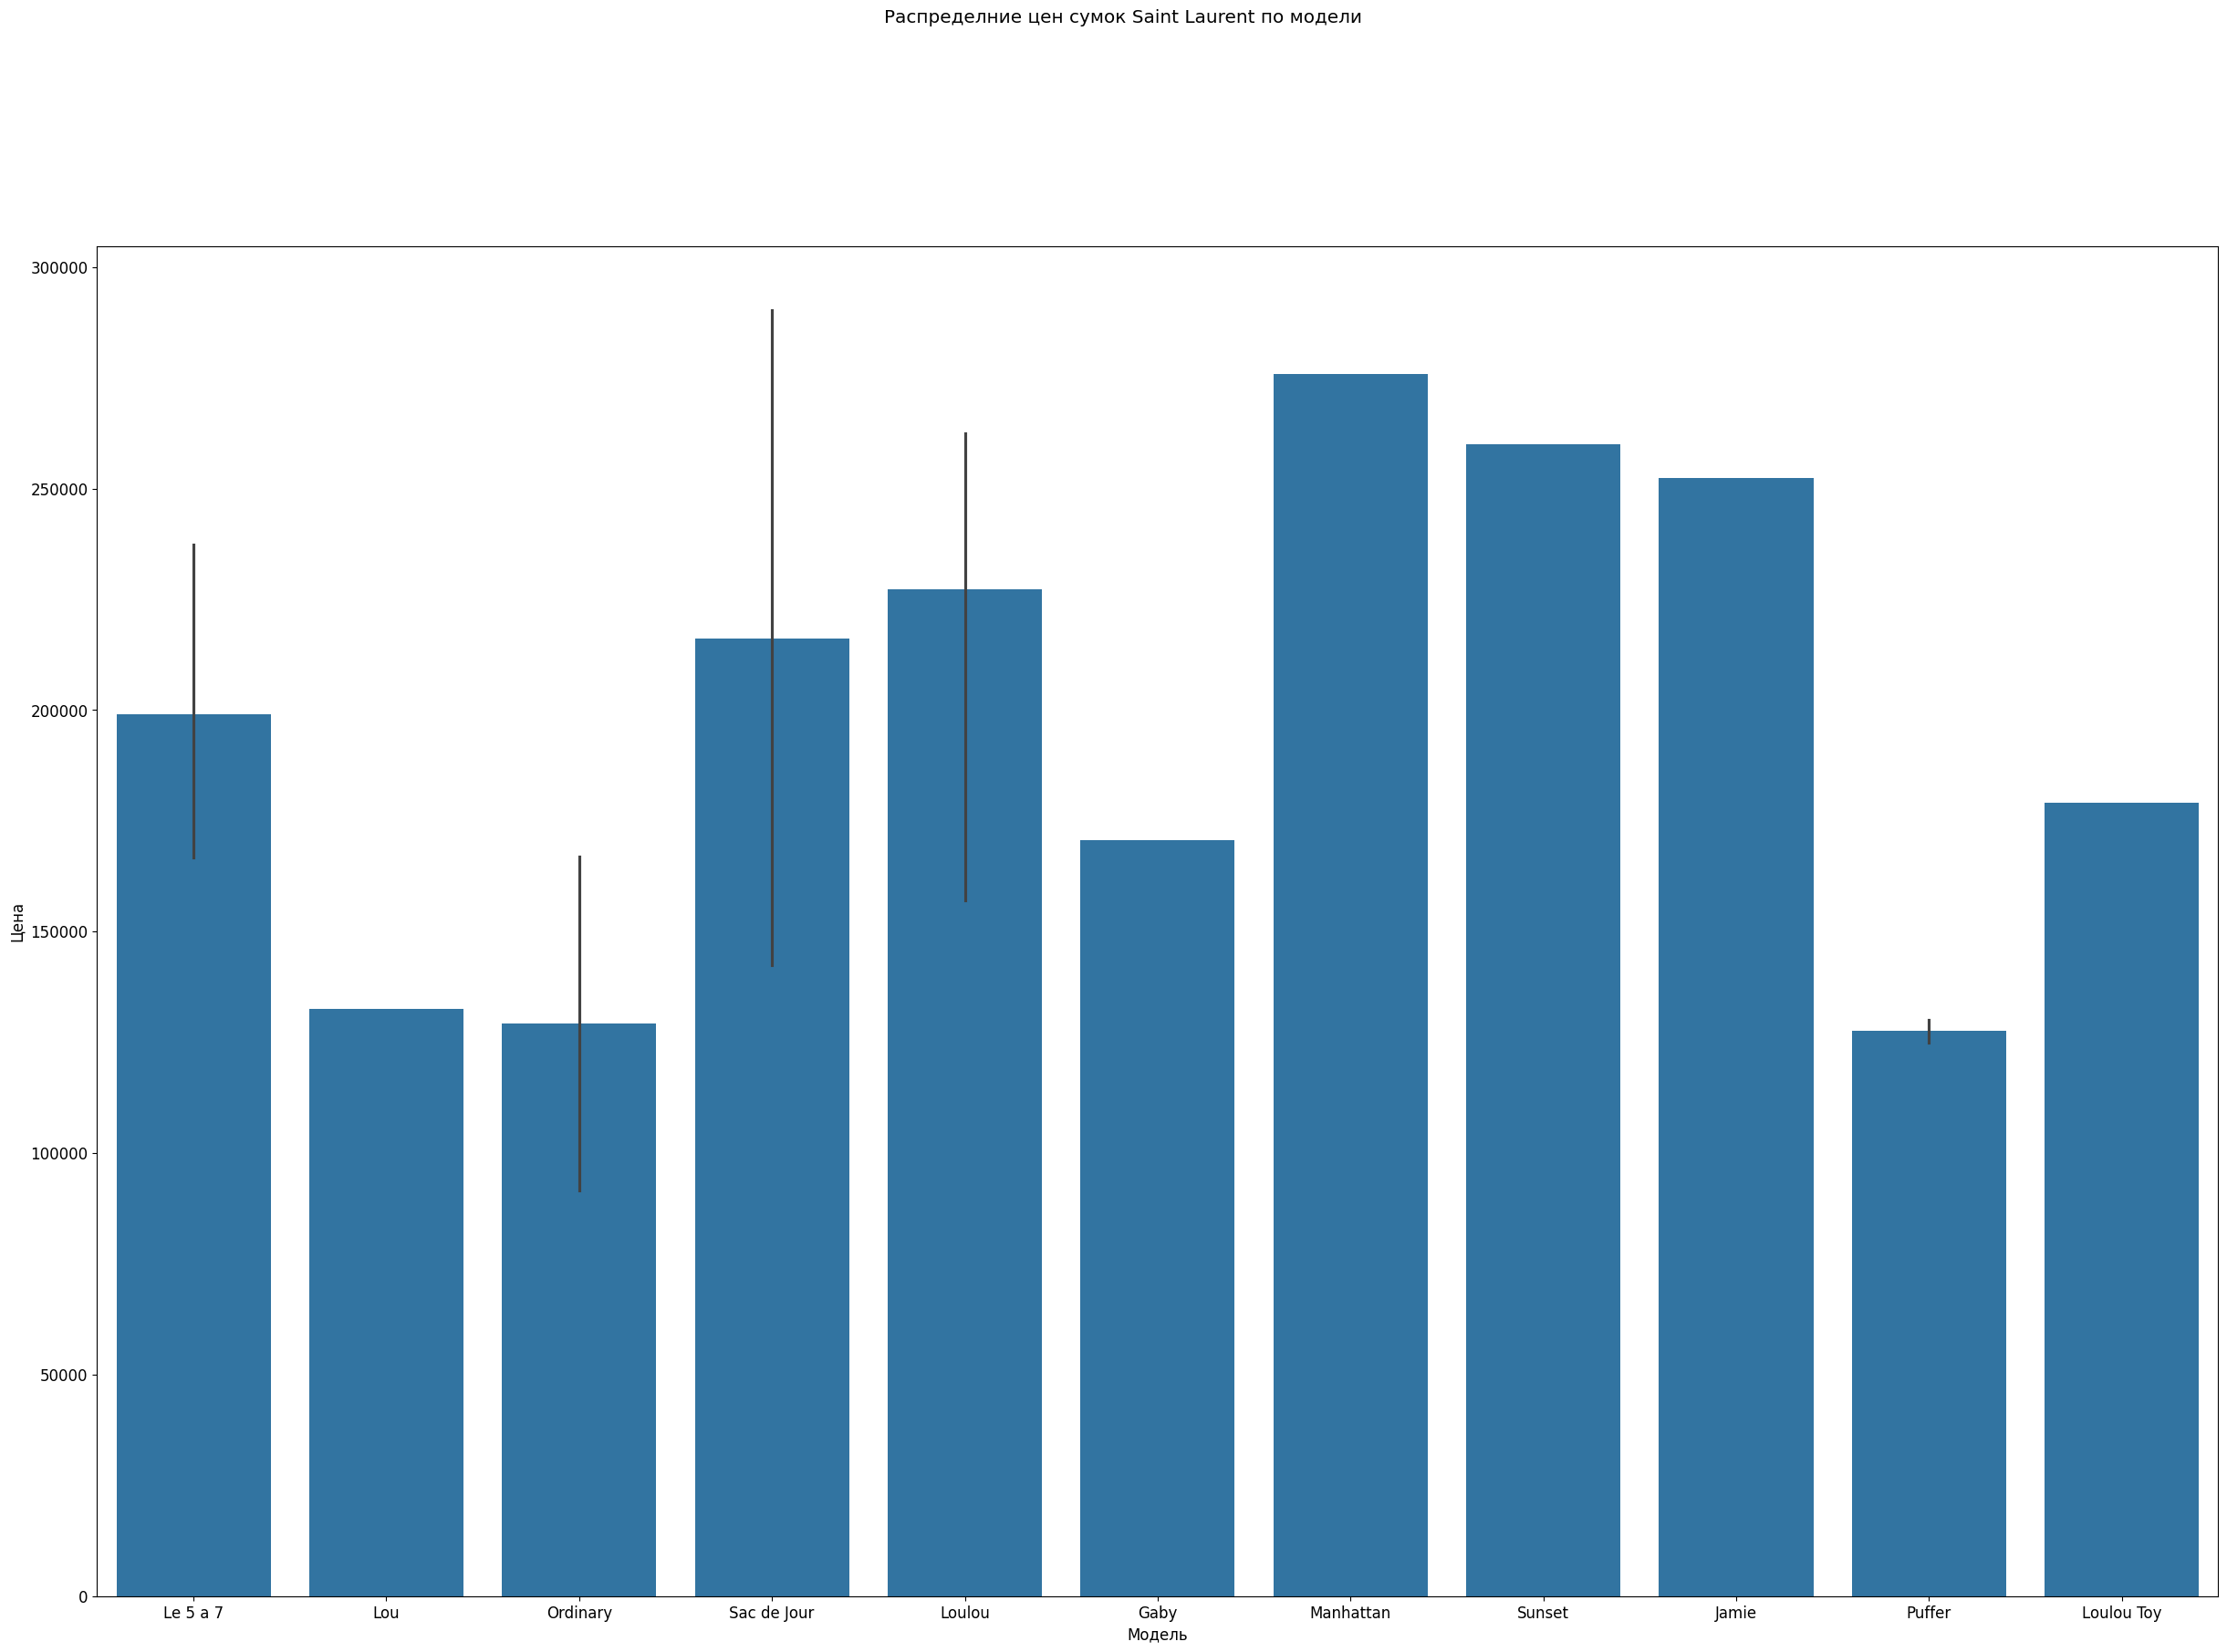

In [16]:
sns.barplot(x="Модель", y="Цена", data=sl_df)
fig = plt.gcf()
fig.set_size_inches(30, 20)
plt.suptitle('Распределние цен сумок Saint Laurent по модели')
plt.subplots_adjust(top=0.85)
plt.show()

Самыми легендарными классическими моделями сумок Saint Lauren являются Le 5 a 7, Jamie, Manhattan и Loulou. По этому графику тоже видно, что они являются одними из самых дорогих, поэтому эти модели мы оставляем а остальное - в Ordinary.

In [17]:
sl_df['Модель'] = sl_df['Модель'].apply(lambda x: x if x == 'Le 5 a 7' or x == 'Jamie'or x == 'Manhattan' or x == 'Loulou'  else 'Ordinary')
df[df['Бренд'] == 'SAINT LAURENT'] = sl_df

## Goyard

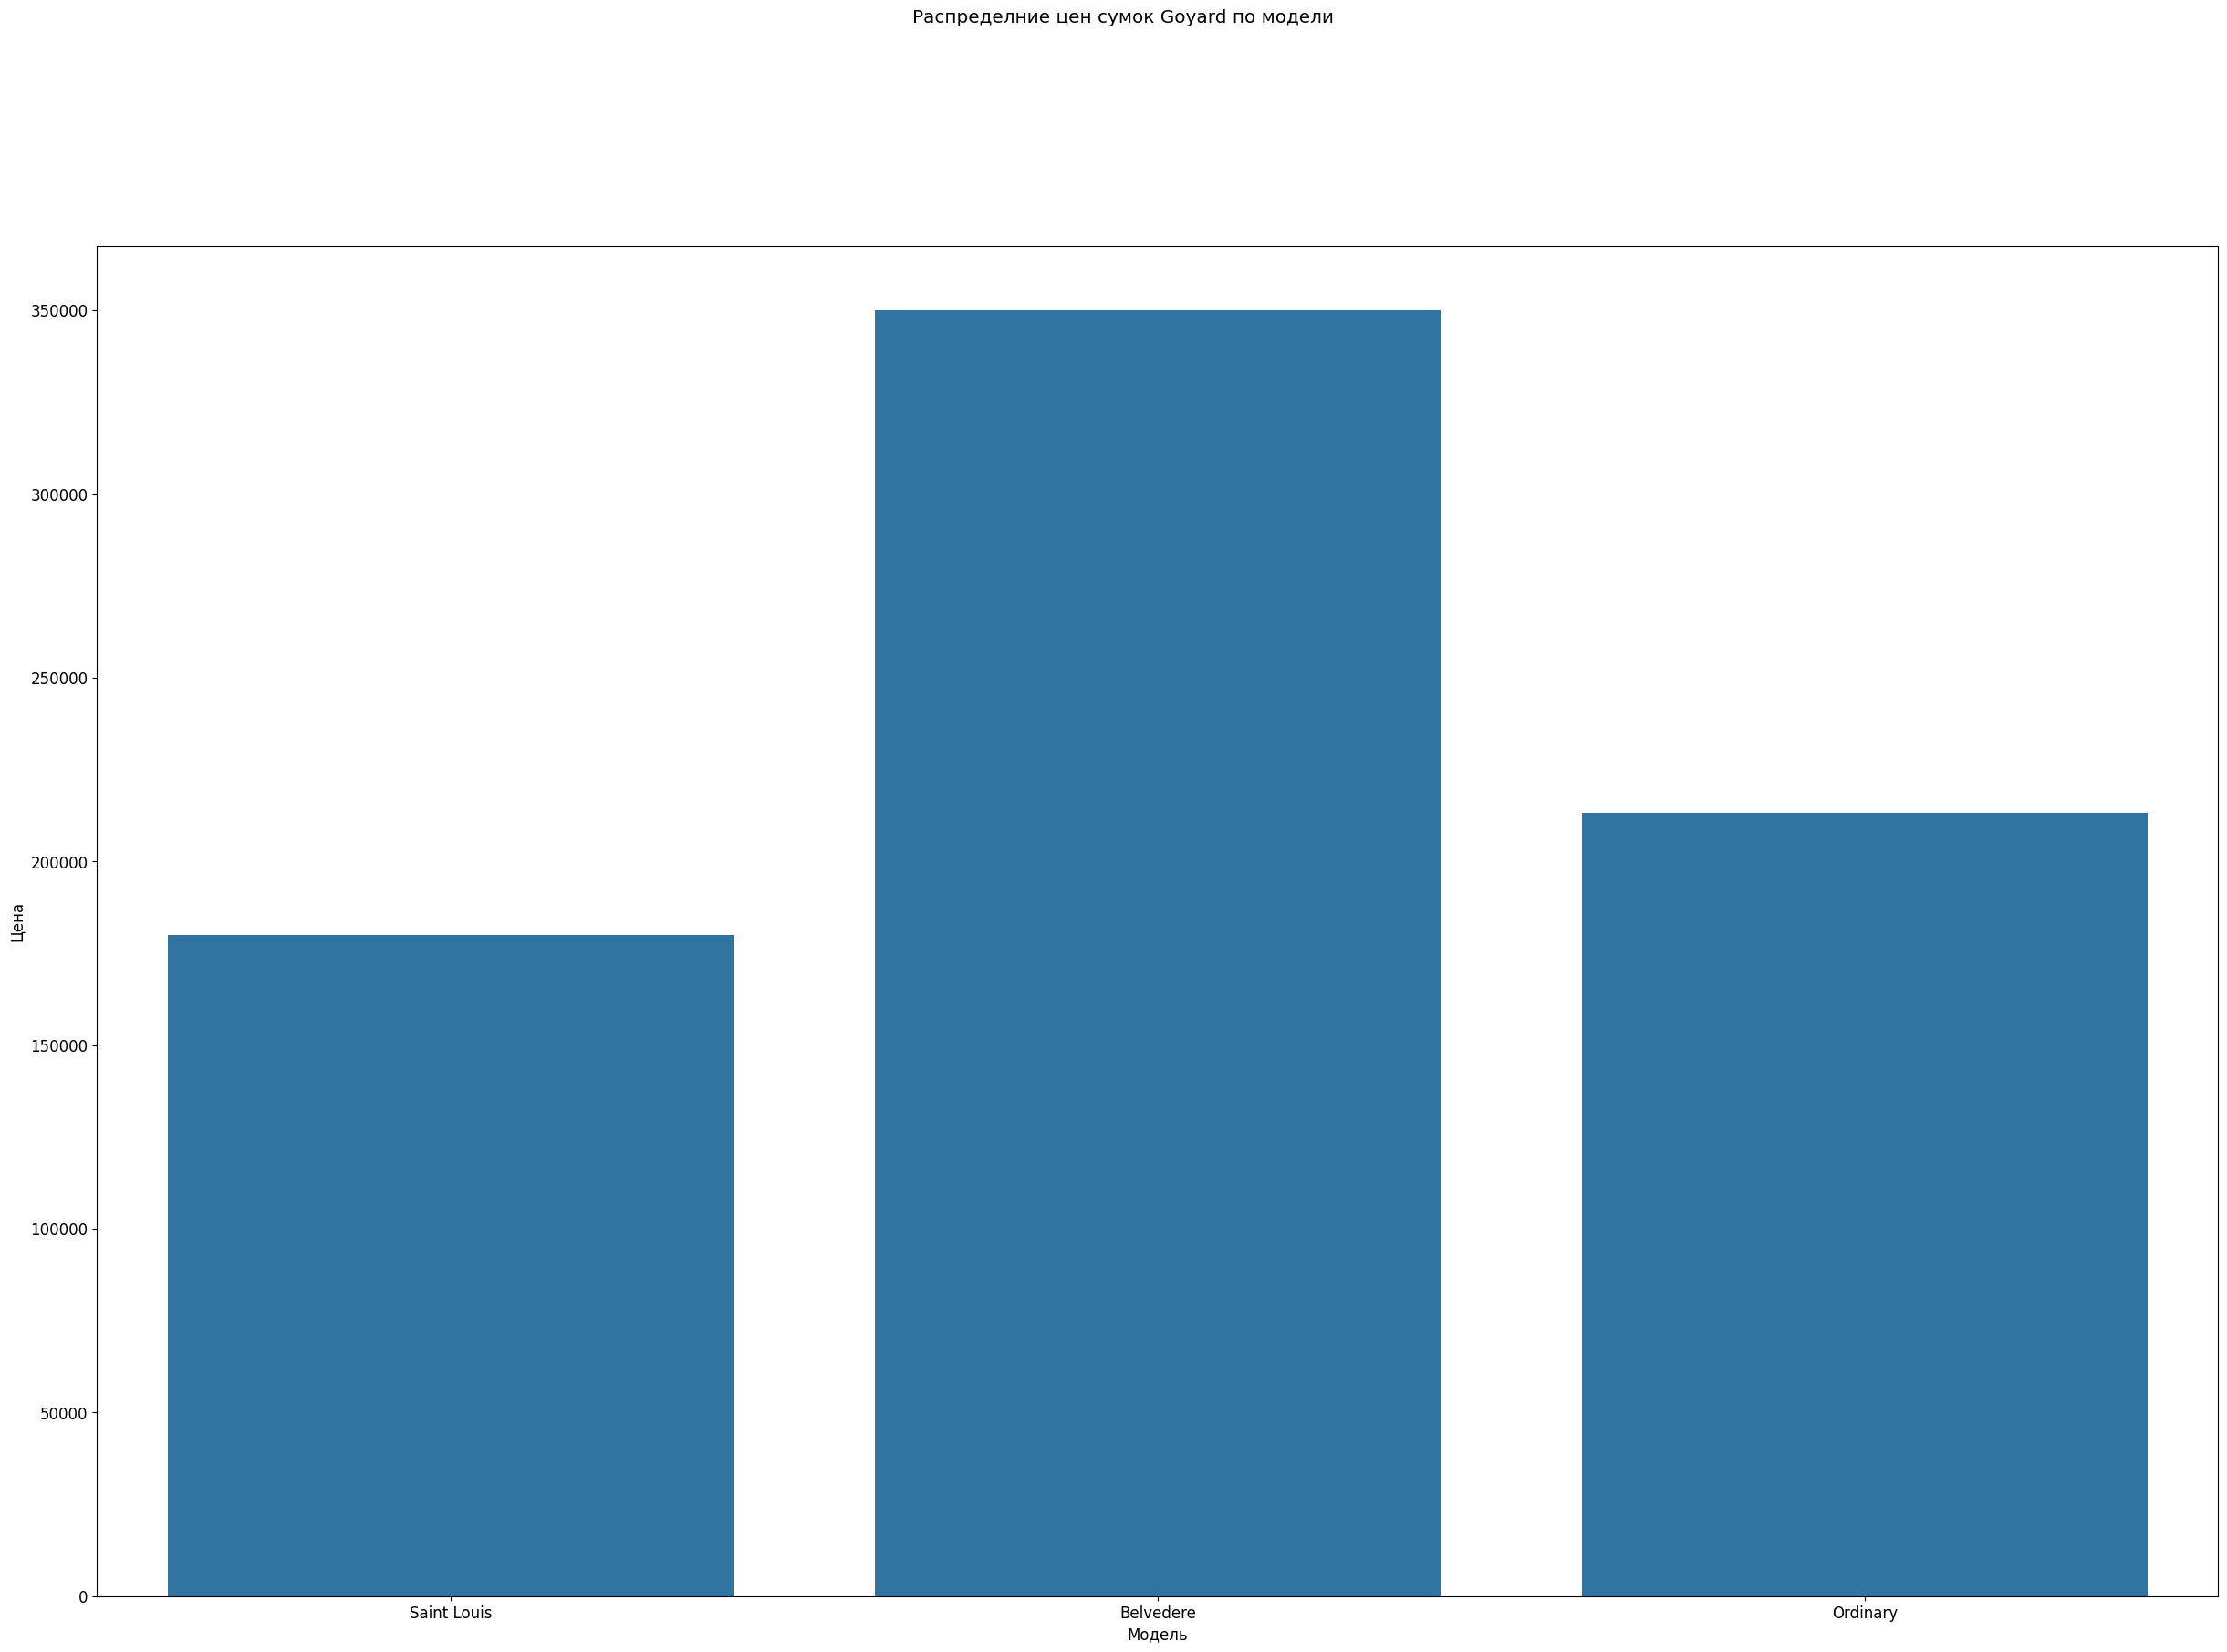

In [18]:
sns.barplot(x="Модель", y="Цена", data=goyard_df)
fig = plt.gcf()
fig.set_size_inches(30, 20)
plt.suptitle('Распределние цен сумок Goyard по модели')
plt.subplots_adjust(top=0.85)
plt.show()

Самая популярная модель Гоярда на сегодняшний день здесь не выделена в отельную категорию и в целом бренд малочисленно представлен, поэтому его тоже весь в Ordinary.

In [19]:
goyard_df['Модель'] = goyard_df['Модель'].apply(lambda x: 'Ordinary' if x == x else 'Ordinary')
df[df['Бренд'] == 'GOYARD'] = goyard_df

## Burberry

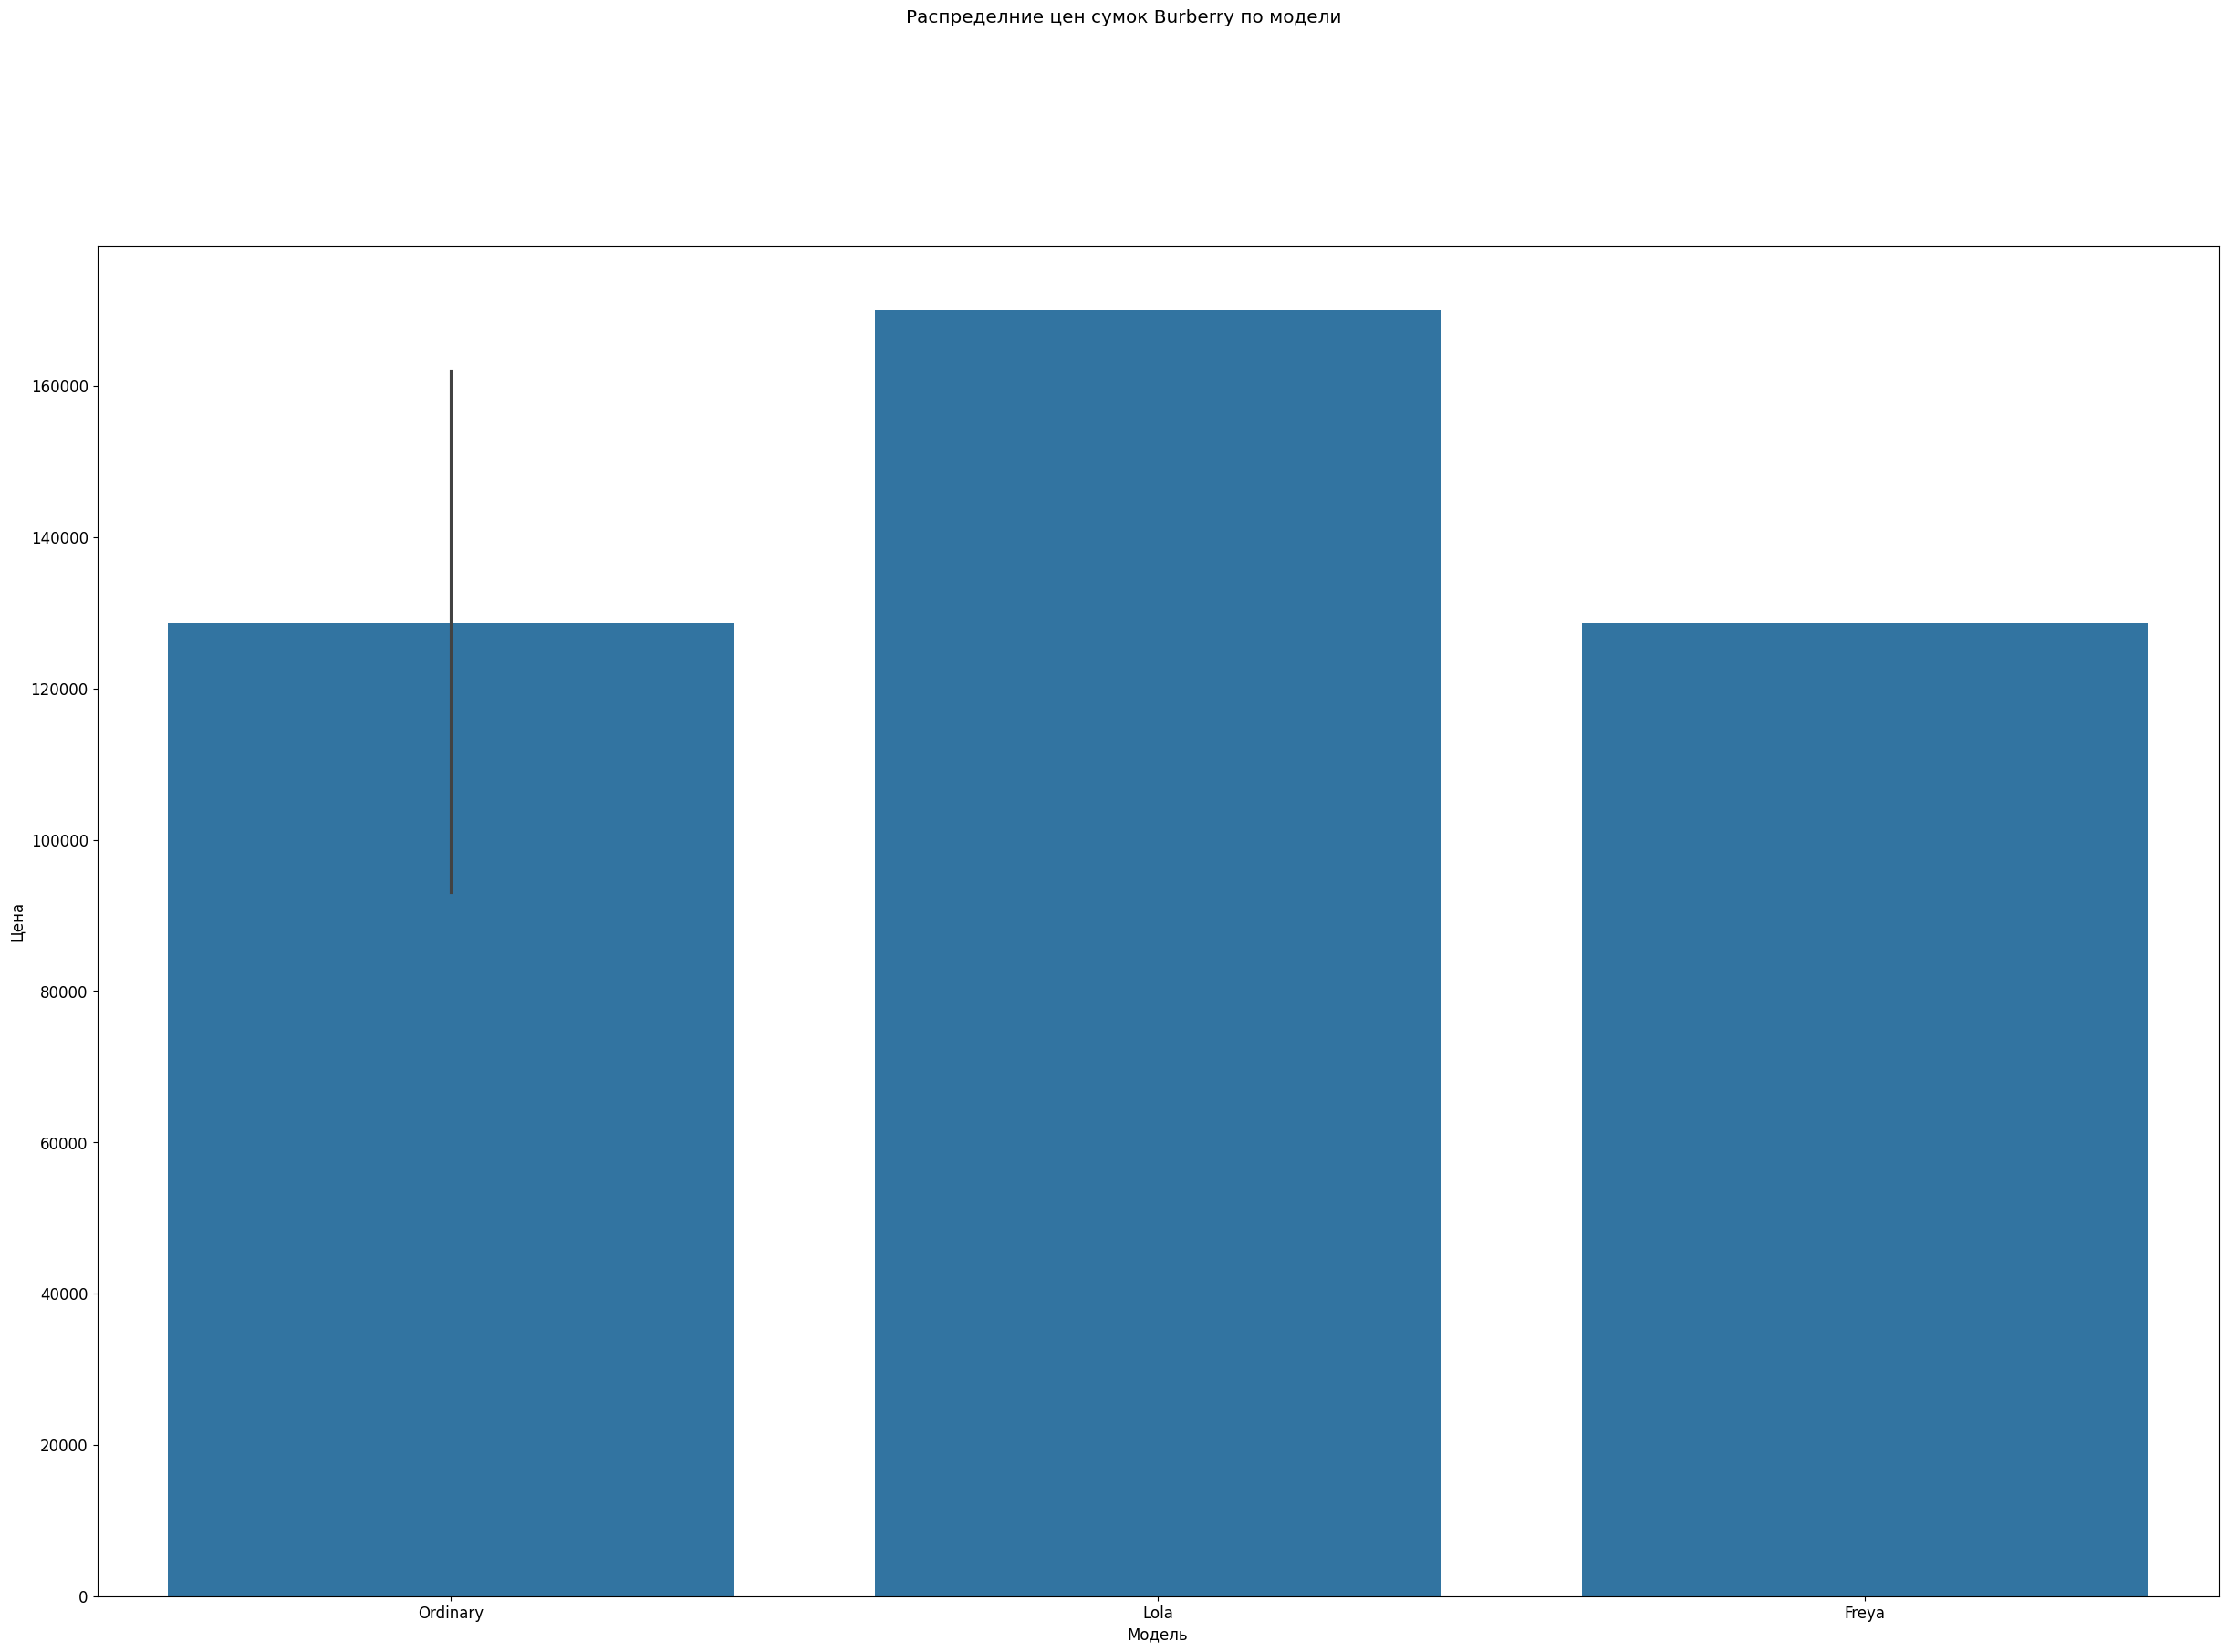

In [20]:
sns.barplot(x="Модель", y="Цена", data=burberry_df)
fig = plt.gcf()
fig.set_size_inches(30, 20)
plt.suptitle('Распределние цен сумок Burberry по модели')
plt.subplots_adjust(top=0.85)
plt.show()

Аналогично Гоярду

In [21]:
burberry_df['Модель'] = burberry_df['Модель'].apply(lambda x: 'Ordinary' if x == x else 'Ordinary')
df[df['Бренд'] == 'BURBERRY'] = burberry_df

## Prada

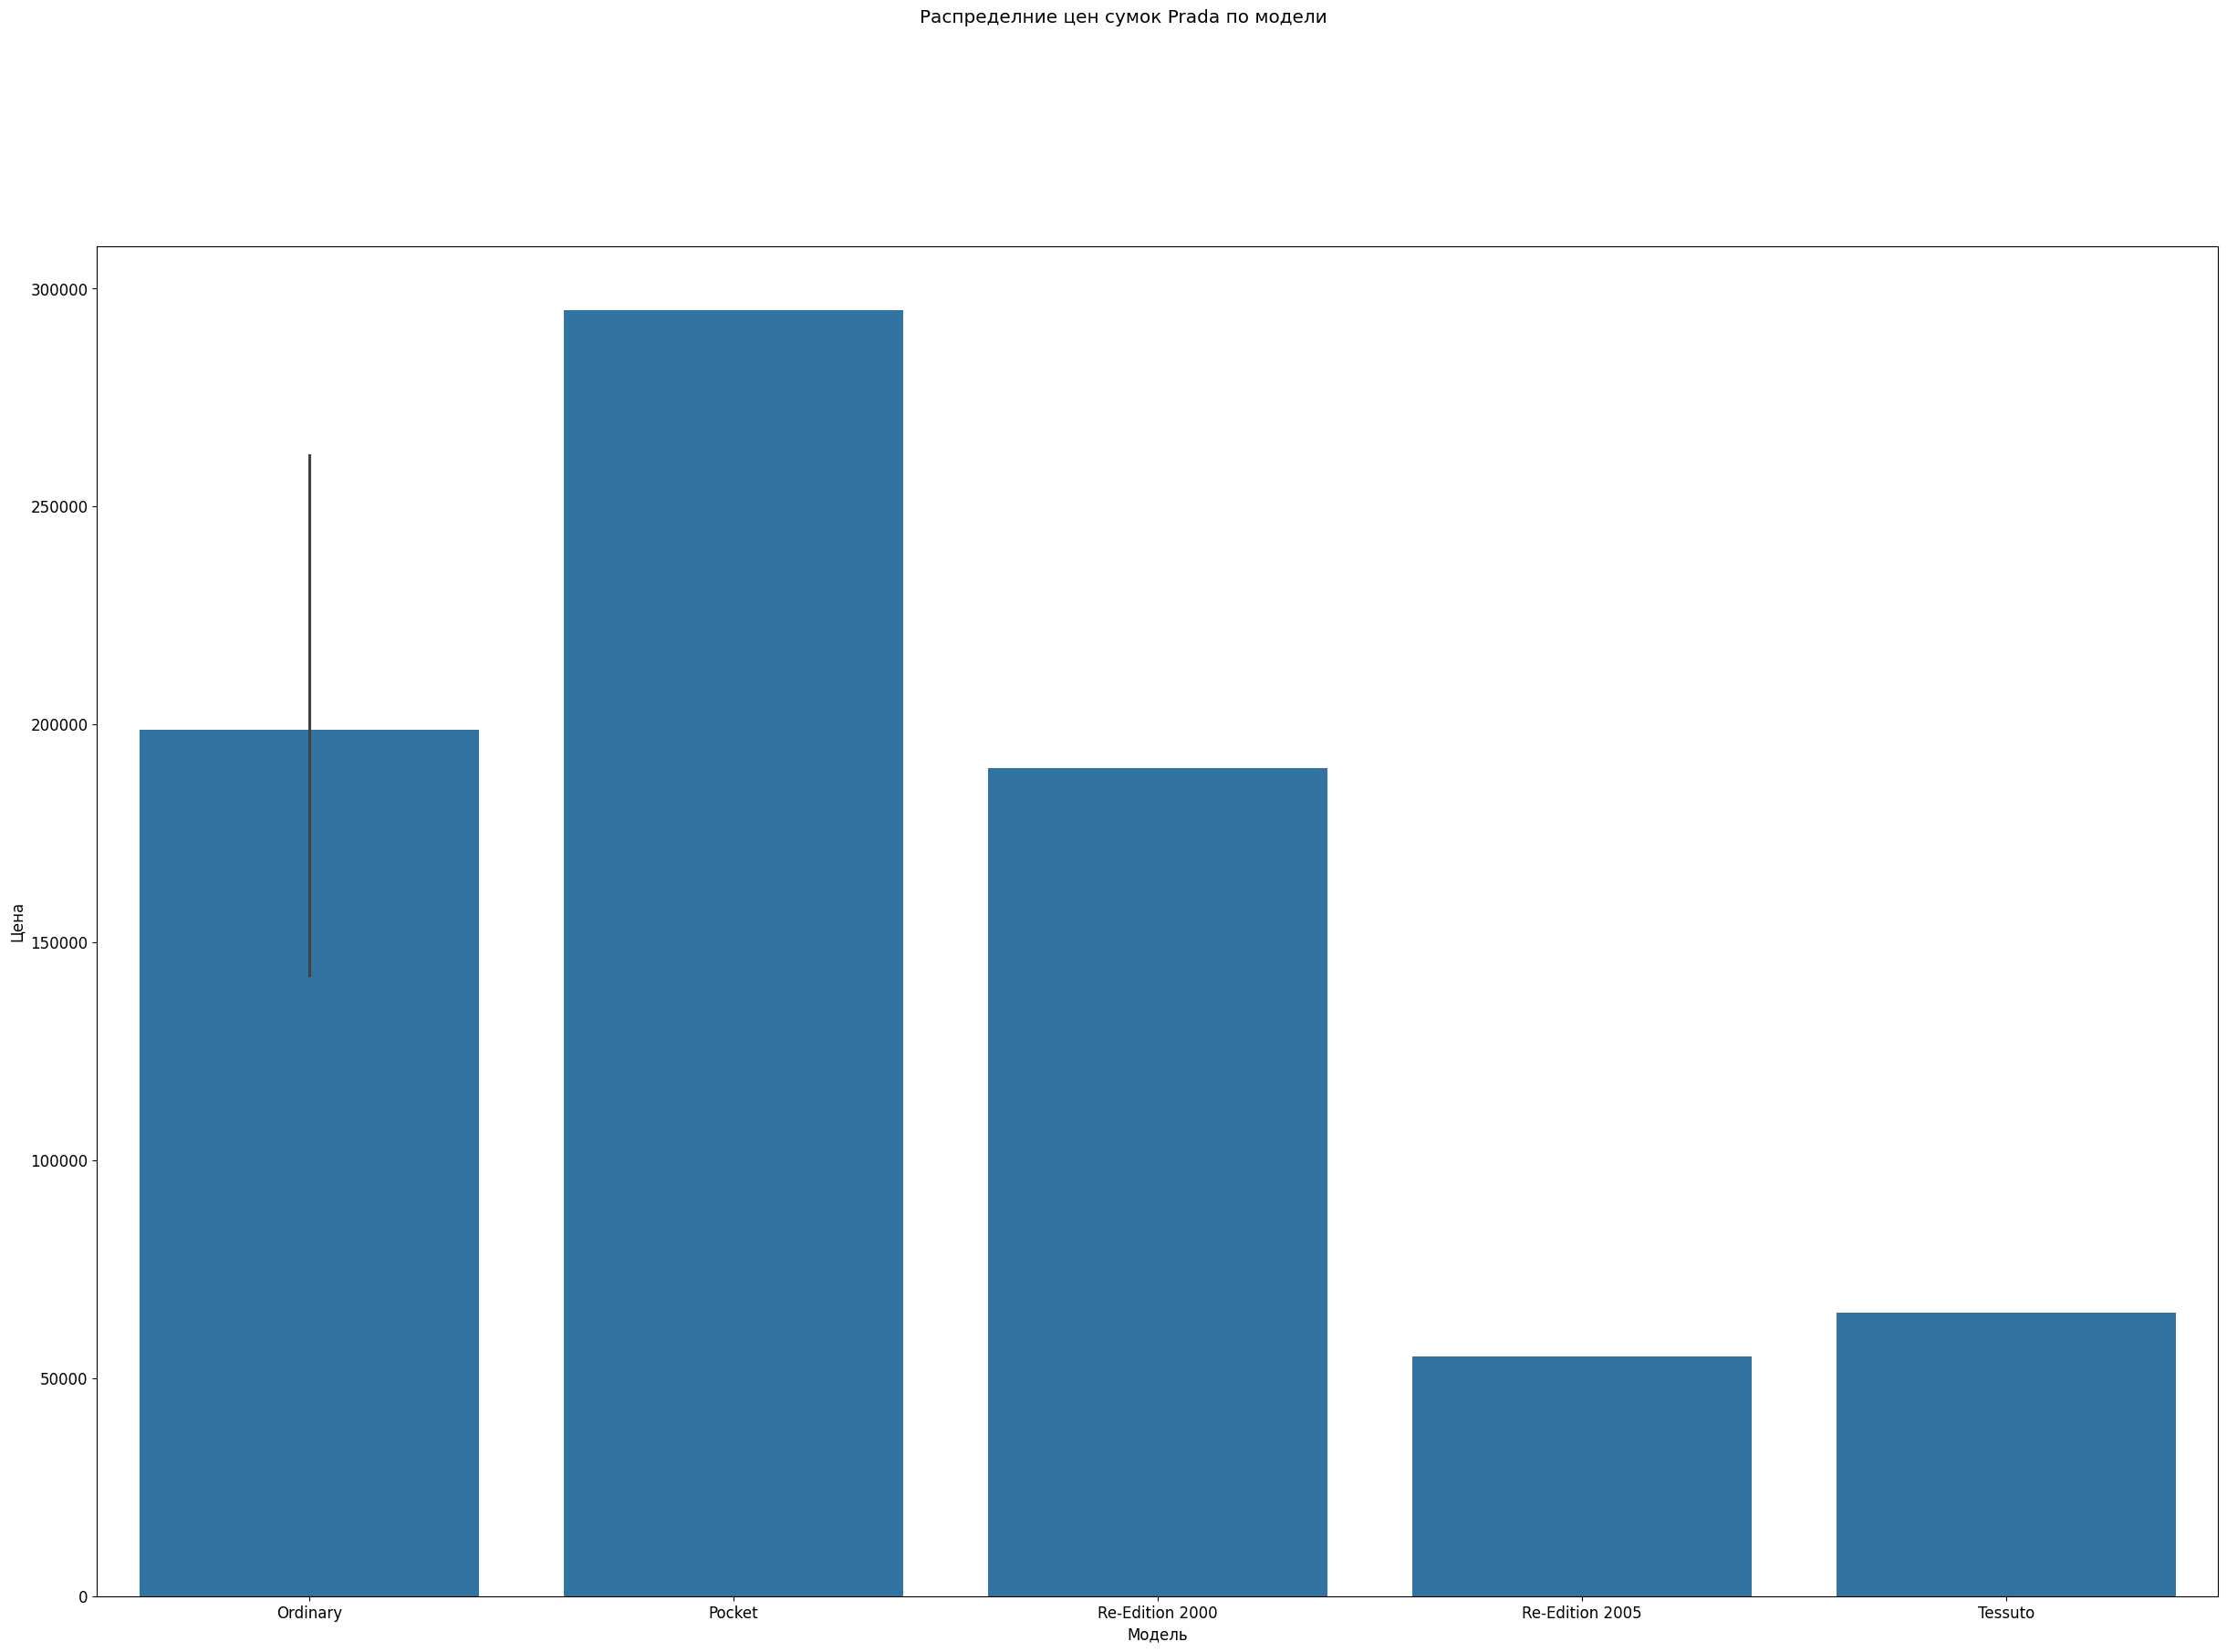

In [22]:
sns.barplot(x="Модель", y="Цена", data=prada_df)
fig = plt.gcf()
fig.set_size_inches(30, 20)
plt.suptitle('Распределние цен сумок Prada по модели')
plt.subplots_adjust(top=0.85)
plt.show()

Классические модели прада здесь также не выделены.

In [23]:
prada_df['Модель'] = prada_df['Модель'].apply(lambda x: 'Ordinary' if x == x else 'Ordinary')
df[df['Бренд'] == 'PRADA']=prada_df

## FENDI

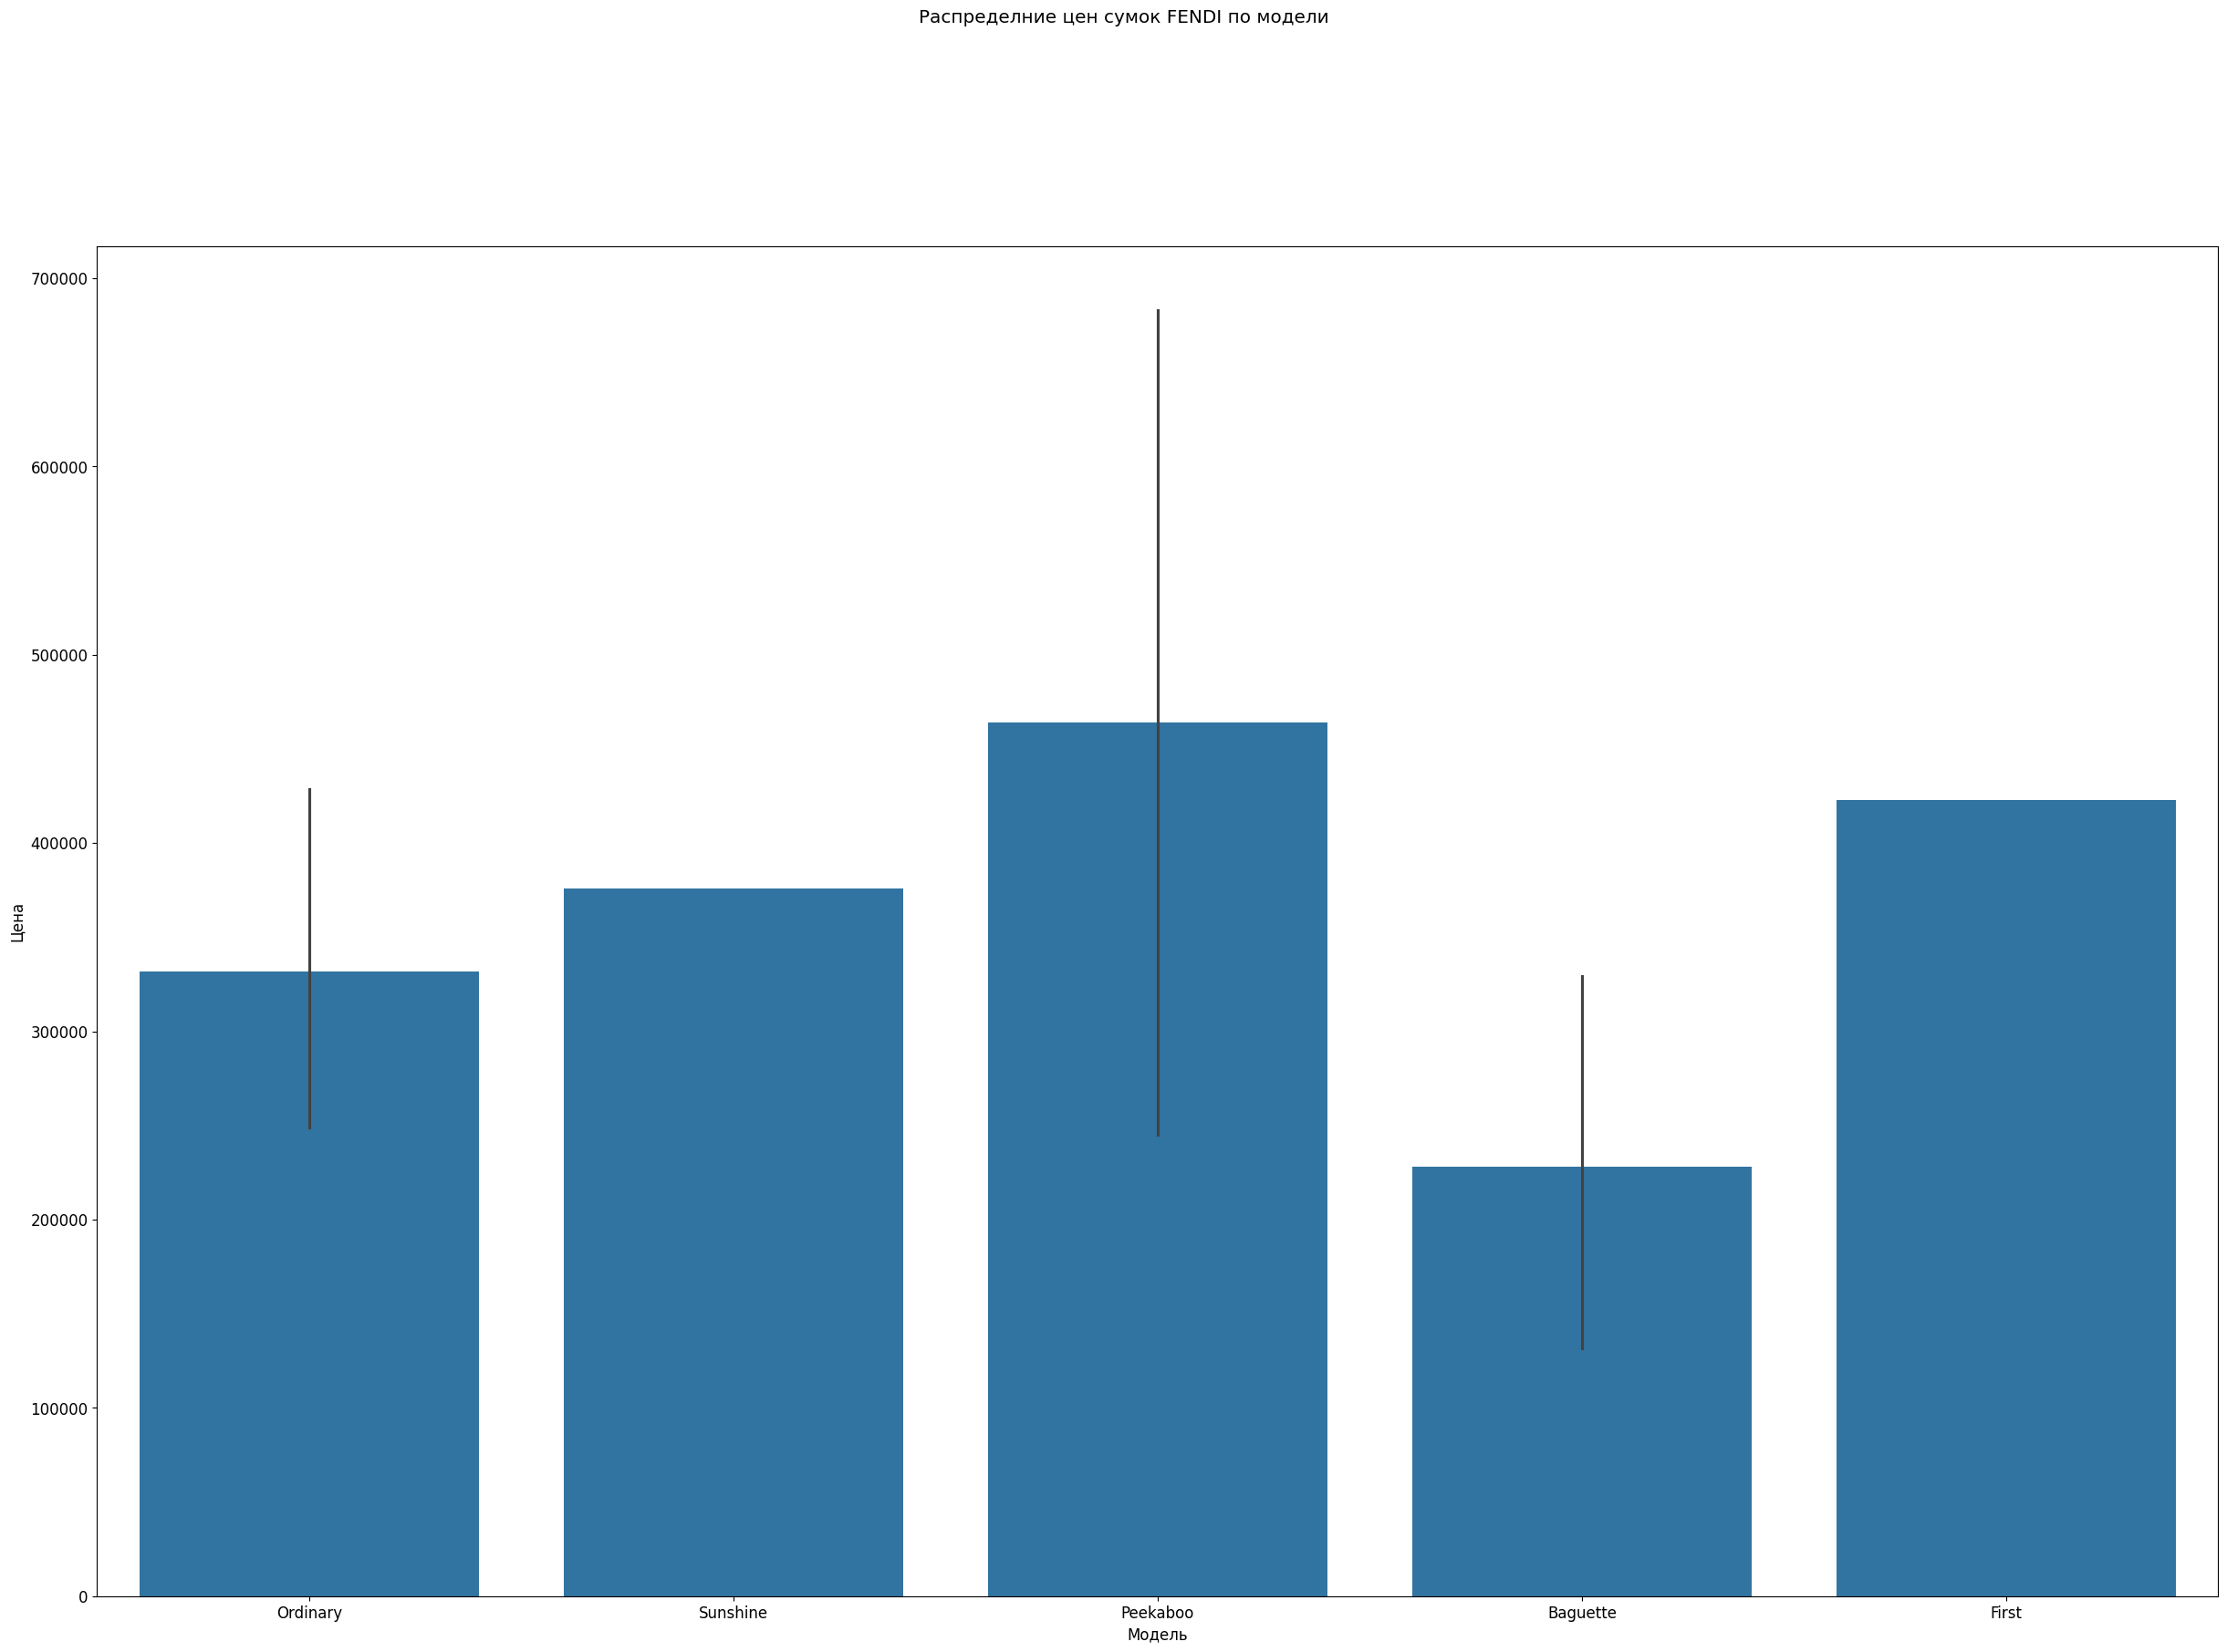

In [24]:
sns.barplot(x="Модель", y="Цена", data=fendi_df)
fig = plt.gcf()
fig.set_size_inches(30, 20)
plt.suptitle('Распределние цен сумок FENDI по модели')
plt.subplots_adjust(top=0.85)
plt.show()

Peekaboo - легендарная сумка фенди, поэтому только ее выделяем в отдельную категорию.

In [25]:
fendi_df['Модель'] = fendi_df['Модель'].apply(lambda x: x if x == 'Peekaboo' else 'Ordinary')
df[df['Бренд'] == 'FENDI'] = fendi_df

## Louis Vuitton

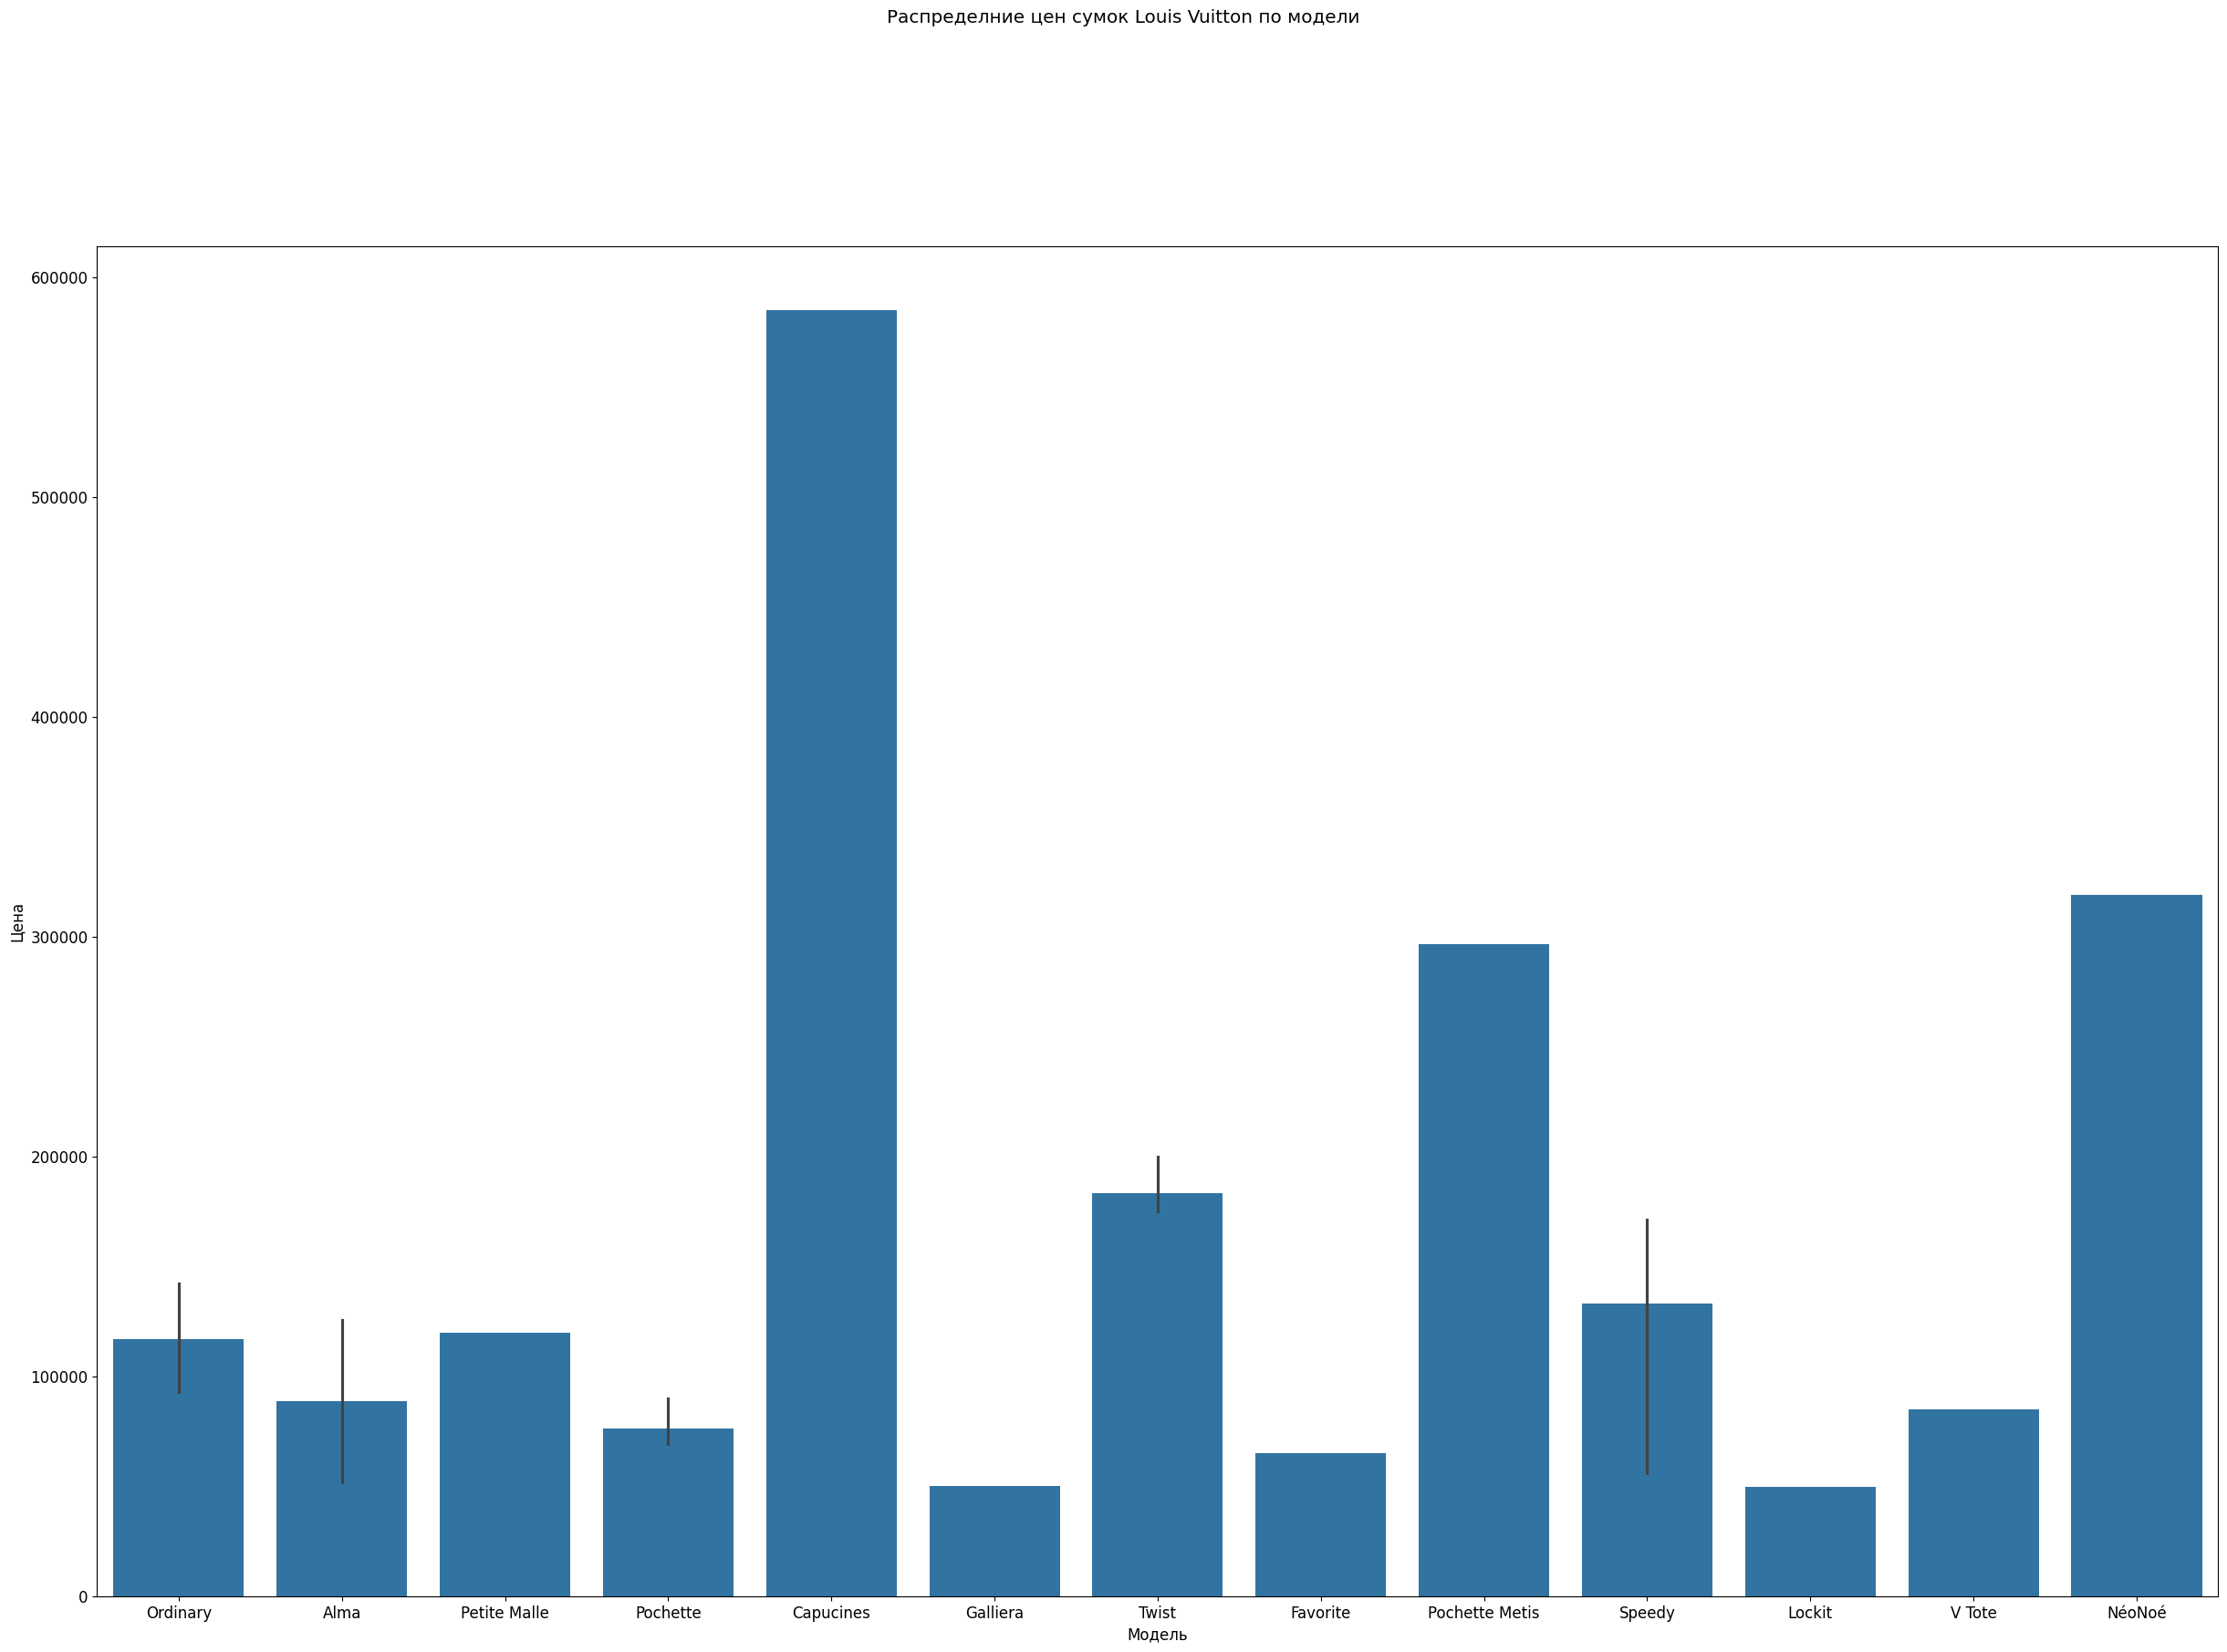

In [26]:
sns.barplot(x="Модель", y="Цена", data=lv_df)
fig = plt.gcf()
fig.set_size_inches(30, 20)
plt.suptitle('Распределние цен сумок Louis Vuitton по модели')
plt.subplots_adjust(top=0.85)
plt.show()

Легендарные у ЛВ сумки Speedy, Alma, Twist, Pochette, Petite Male, NeoNoe, Capucines. Можно заметить, что в большинстве их них присутсвуют выбросы. Это может говорить о высоком спросе на такие сумки из бутика или наоборот на винтажные экземпляры.

In [27]:
lv_df['Модель'] = lv_df['Модель'].apply(lambda x: 'Ordinary' if x == 'Galliera' or x == 'Favorite' or x=='Lockit'or x=='V Tote' else x)
df[df['Бренд'] == 'LOUIS VUITTON PRE-OWNED'] = lv_df

## Chanel

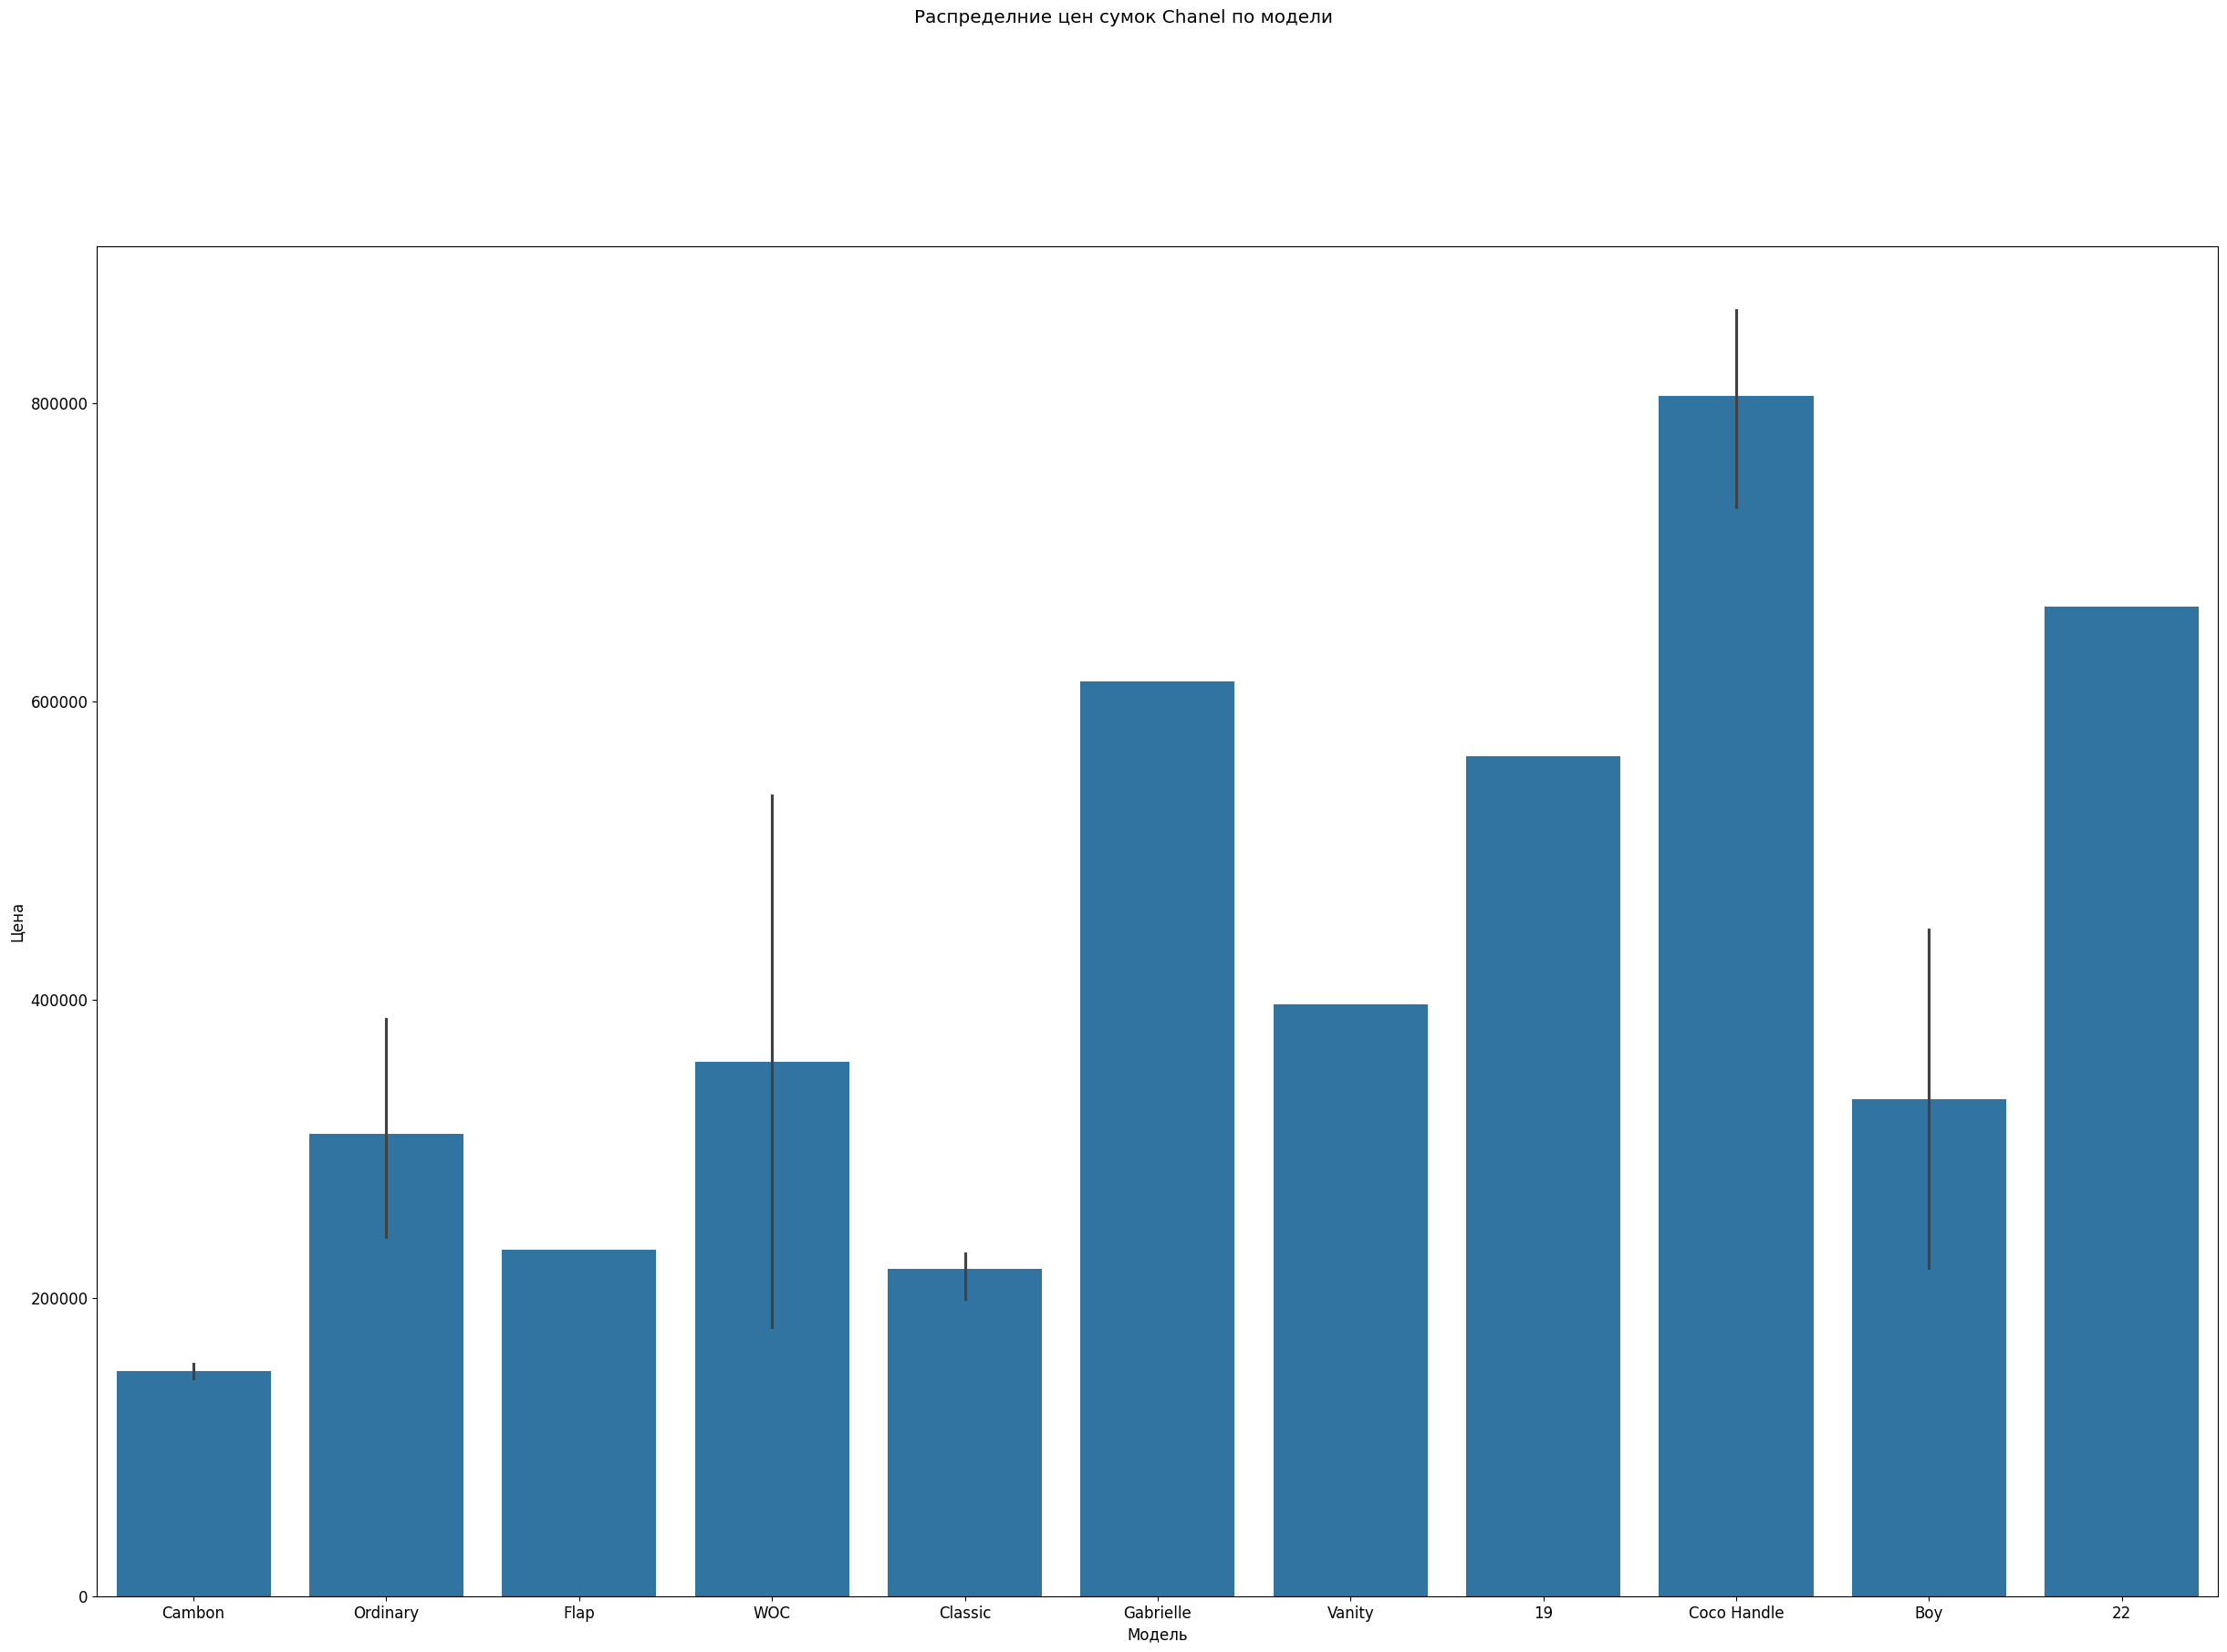

In [28]:
sns.barplot(x="Модель", y="Цена", data=chanel_df)
fig = plt.gcf()
fig.set_size_inches(30, 20)
plt.suptitle('Распределние цен сумок Chanel по модели')
plt.subplots_adjust(top=0.85)
plt.show()

Здесь важными моделями являются Classic, Boy, Gabrielle, WOC, 22, 19 и Coco Handle. 

In [29]:
chanel_df['Модель'] = chanel_df['Модель'].apply(lambda x: 'Ordinary' if x == 'Cambon' or x == 'Flap' or x=='Vanity' else x)
df[df['Бренд'] == 'CHANEL PRE-OWNED'] = chanel_df

## Dior

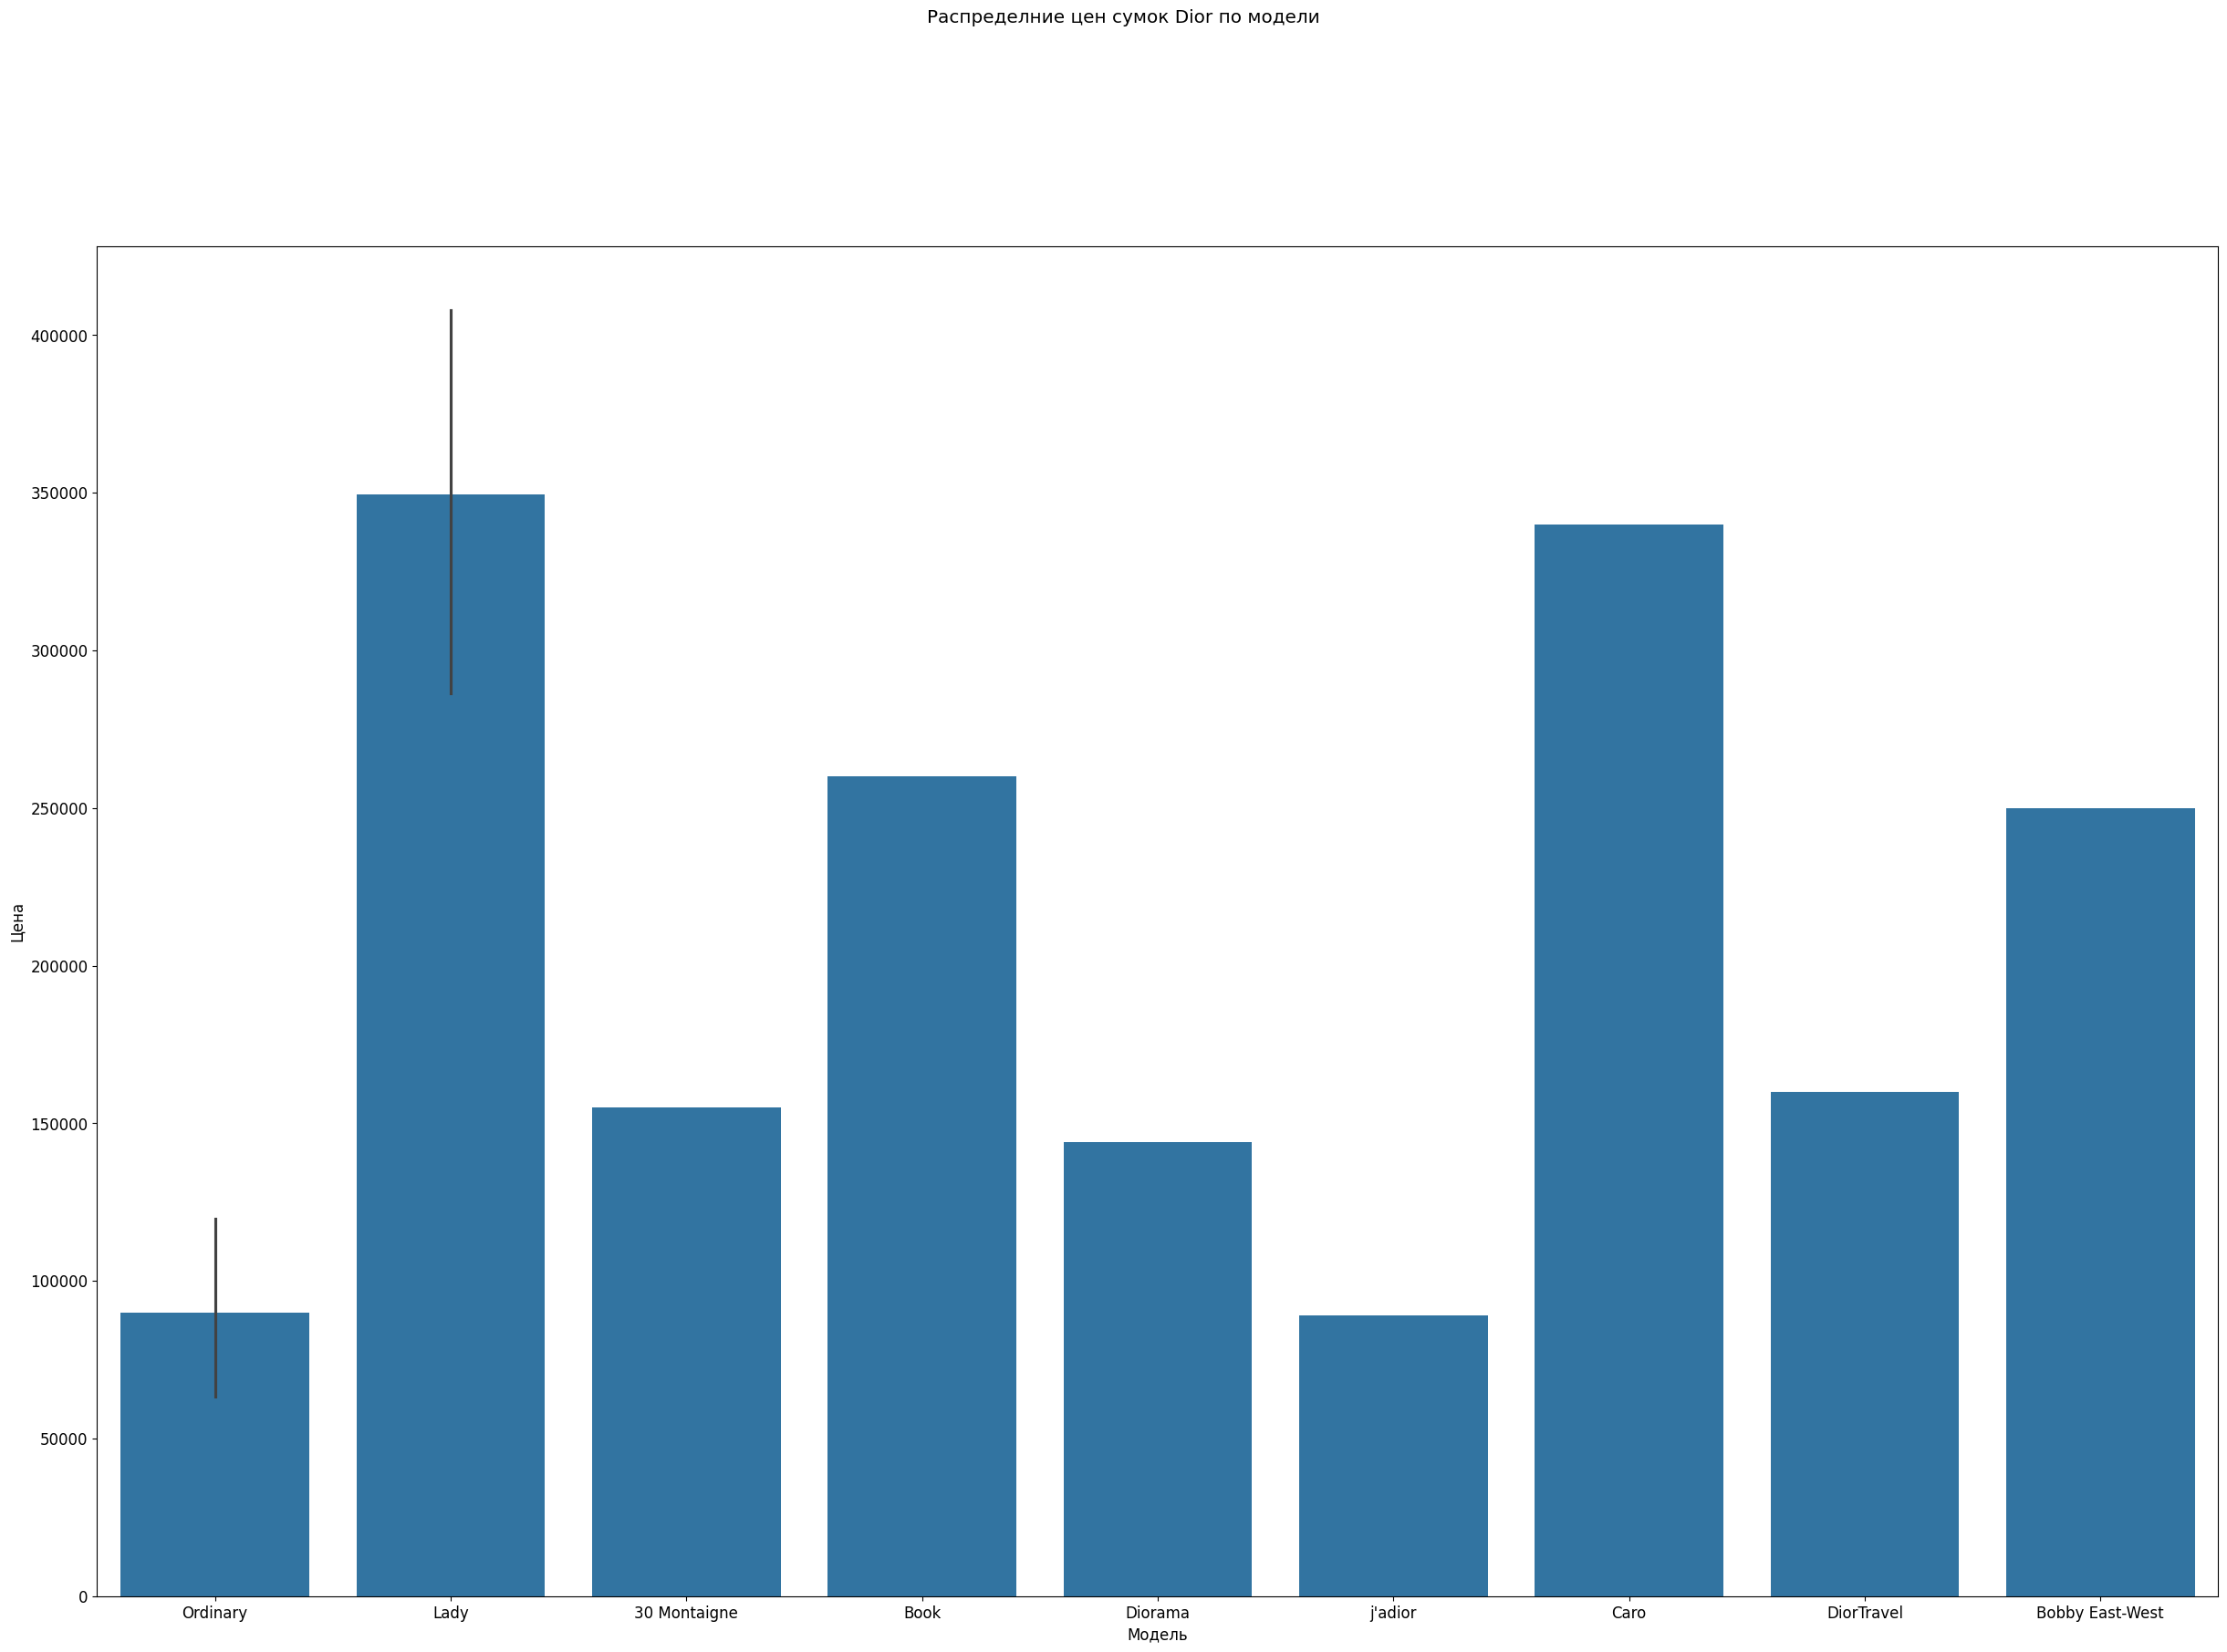

In [30]:
sns.barplot(x="Модель", y="Цена", data=dior_df)
fig = plt.gcf()
fig.set_size_inches(30, 20)
plt.suptitle('Распределние цен сумок Dior по модели')
plt.subplots_adjust(top=0.85)
plt.show()

Легенды: Lady, Book, Diorama, jadior, 30 Montaigne.

In [31]:
dior_df['Модель'] = dior_df['Модель'].apply(lambda x: 'Ordinary' if x == 'Caro' or x == 'DiorTravel' or x=='Bobby East-West' else x)
df[df['Бренд'] == 'CHRISTIAN DIOR PRE-OWNED'] = dior_df

In [32]:
#удаляем модели прочих брендов

df.loc[~df['Бренд'].isin(['HERMES PRE-OWNED','BALENCIAGA','BVLGARI','SAINT LAURENT','GOYARD','BURBERRY','PRADA','FENDI','LOUIS VUITTON PRE-OWNED', 'CHANEL PRE-OWNED', 'CHRISTIAN DIOR PRE-OWNED']), 'Модель'] = 'Ordinary'

Выводим новое распределение цены по моделям

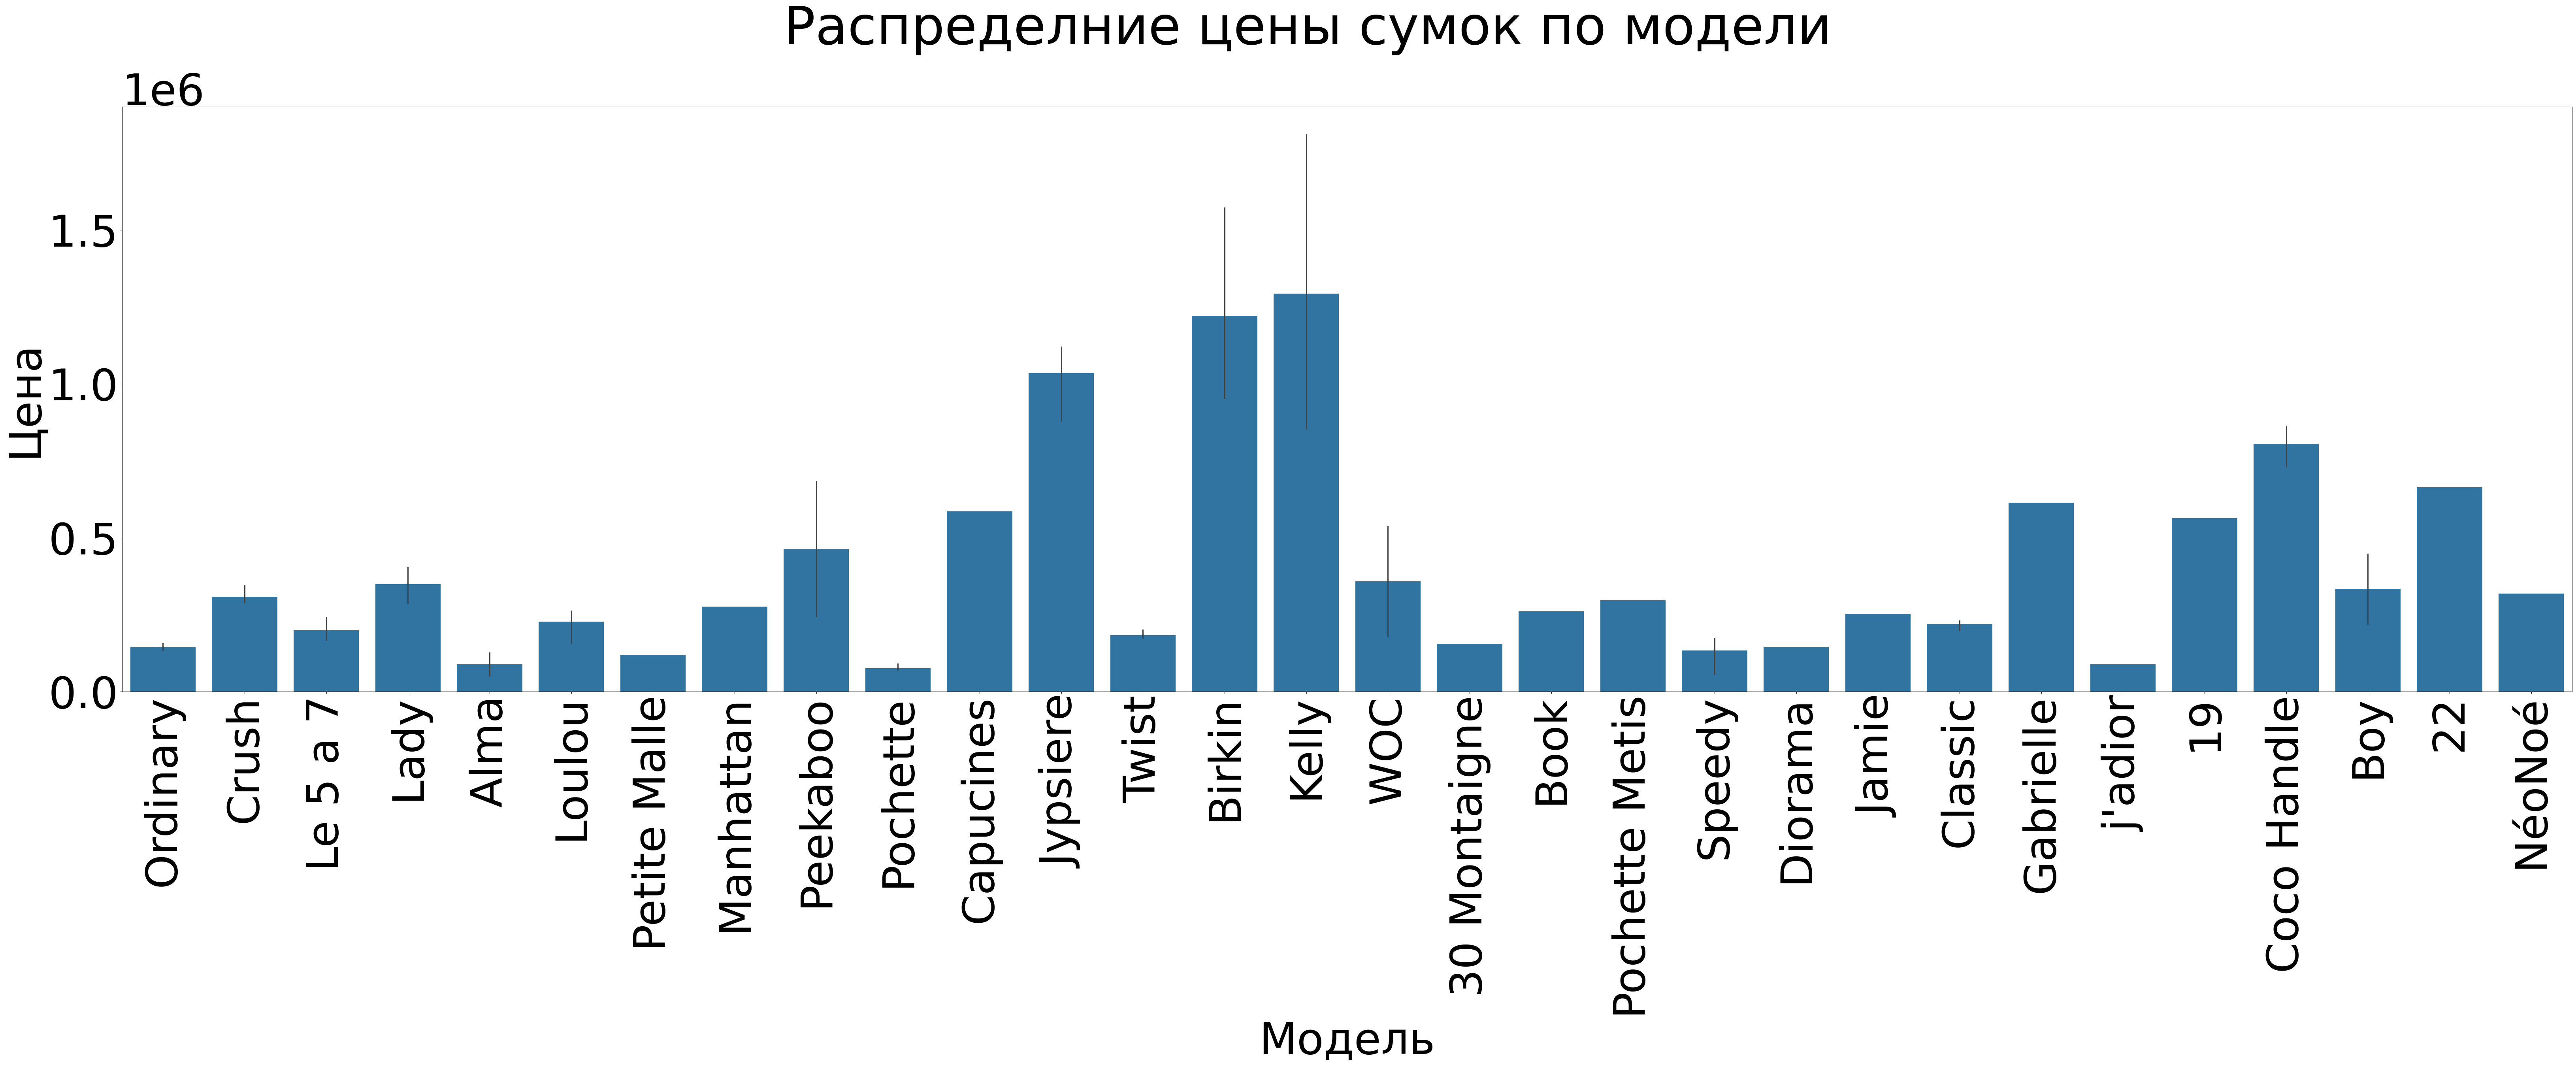

In [53]:
plt.rcParams.update({'font.size':80 })
sns.barplot(x="Модель", y="Цена", data=df)
fig = plt.gcf()
fig.set_size_inches(80, 20)
plt.xticks(rotation=90)


plt.suptitle('Распределние цены сумок по модели')
plt.subplots_adjust(top=0.85)
plt.show()

Text(0.5, 0.98, 'Распределние сумок по модели')

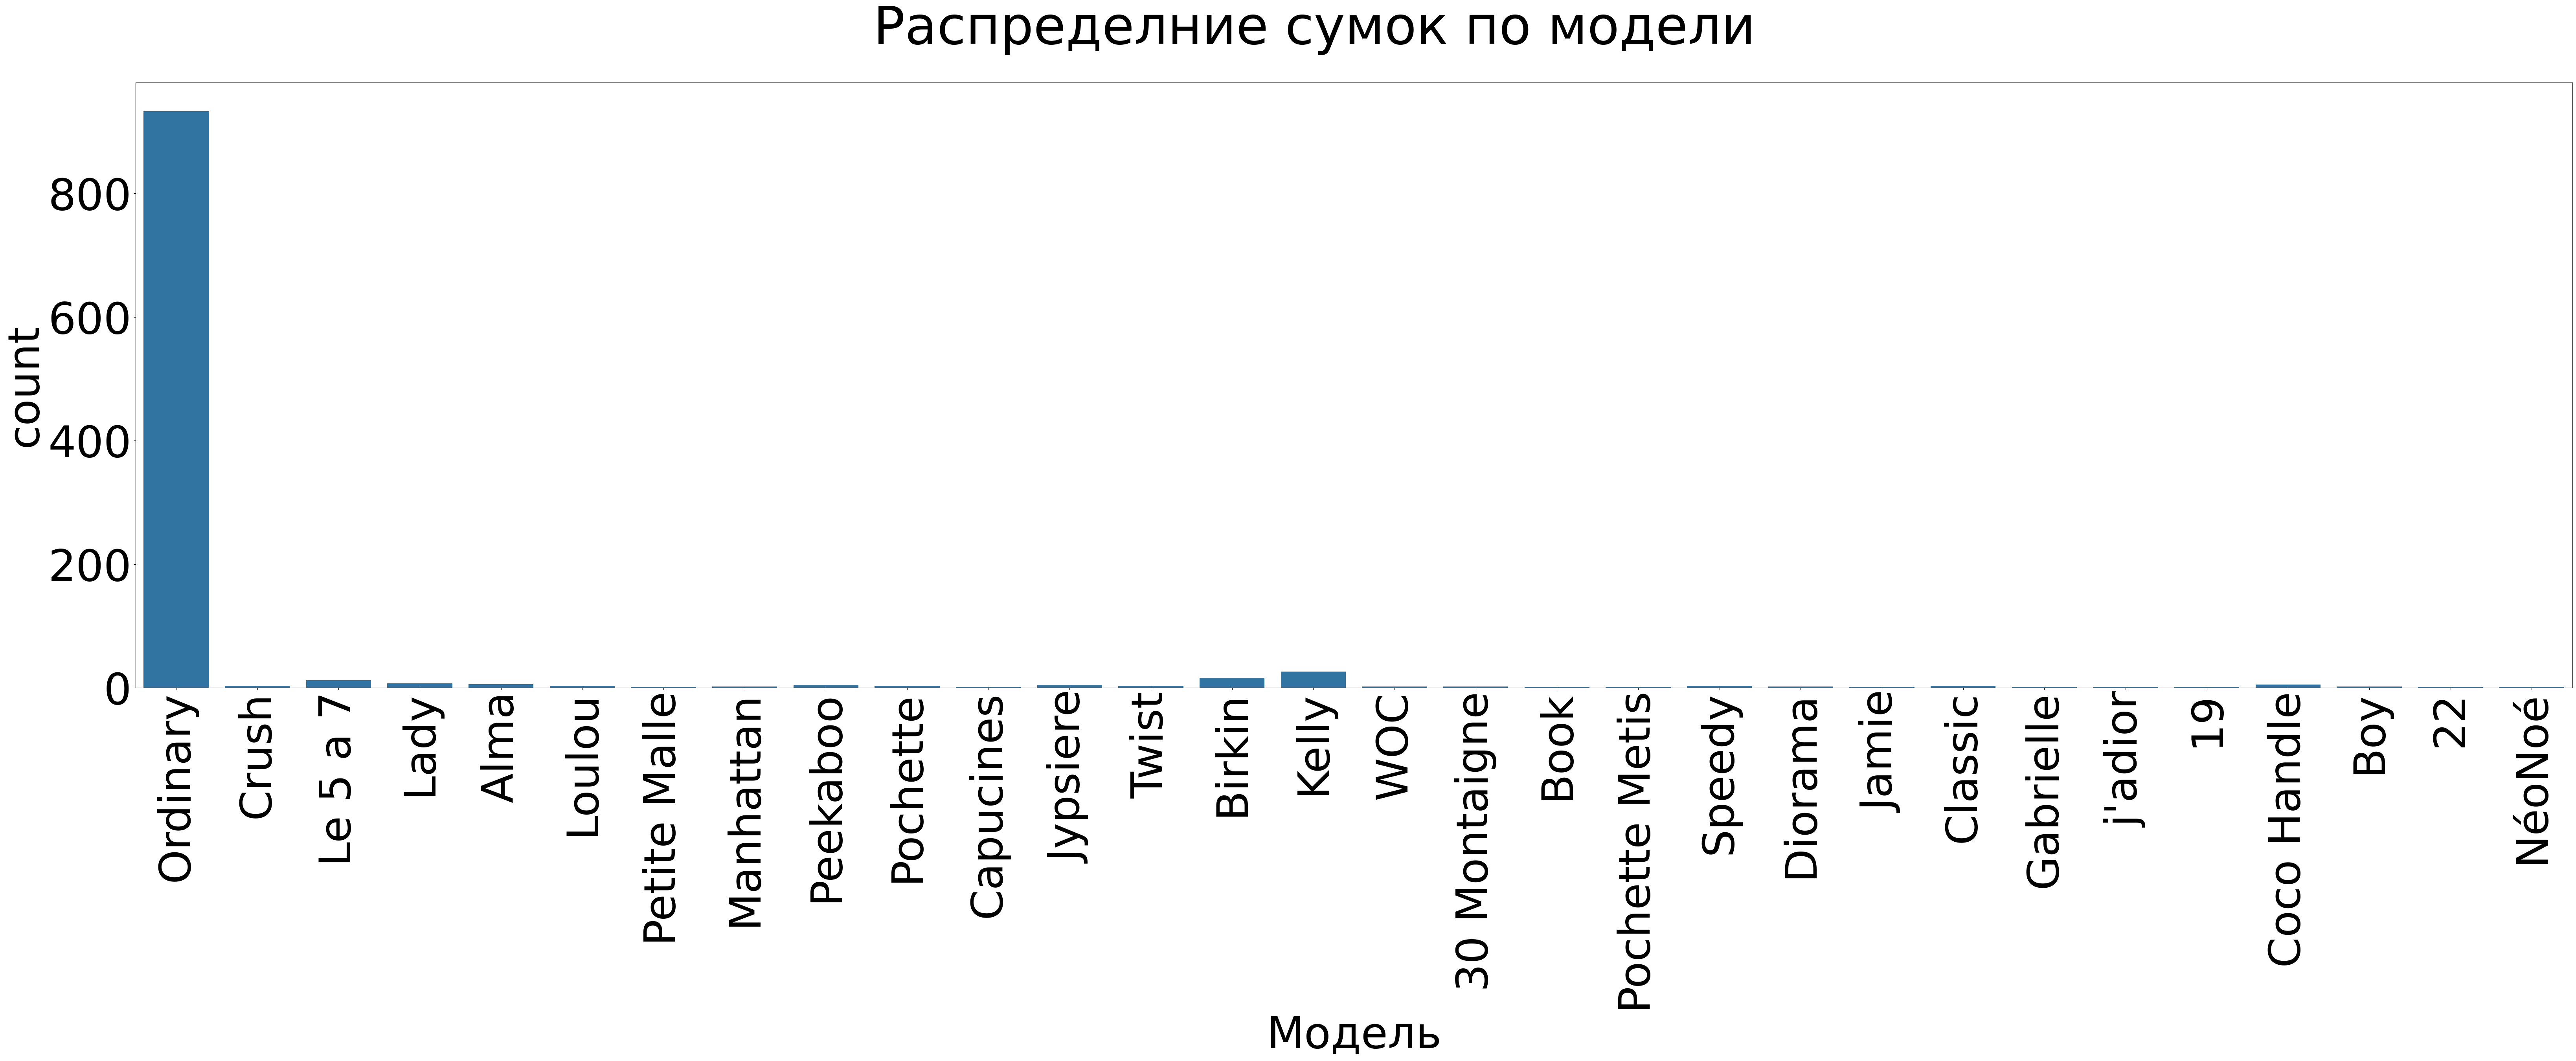

In [54]:
ax, fig = plt.subplots(figsize=(80, 20))
plt.xticks(rotation=90)
sns.countplot(x='Модель', data=df)
plt.suptitle('Распределние сумок по модели')

---

## Теперь проанализируем тип продавца

Text(0.5, 0.98, 'Распределние сумок по типу продавца')

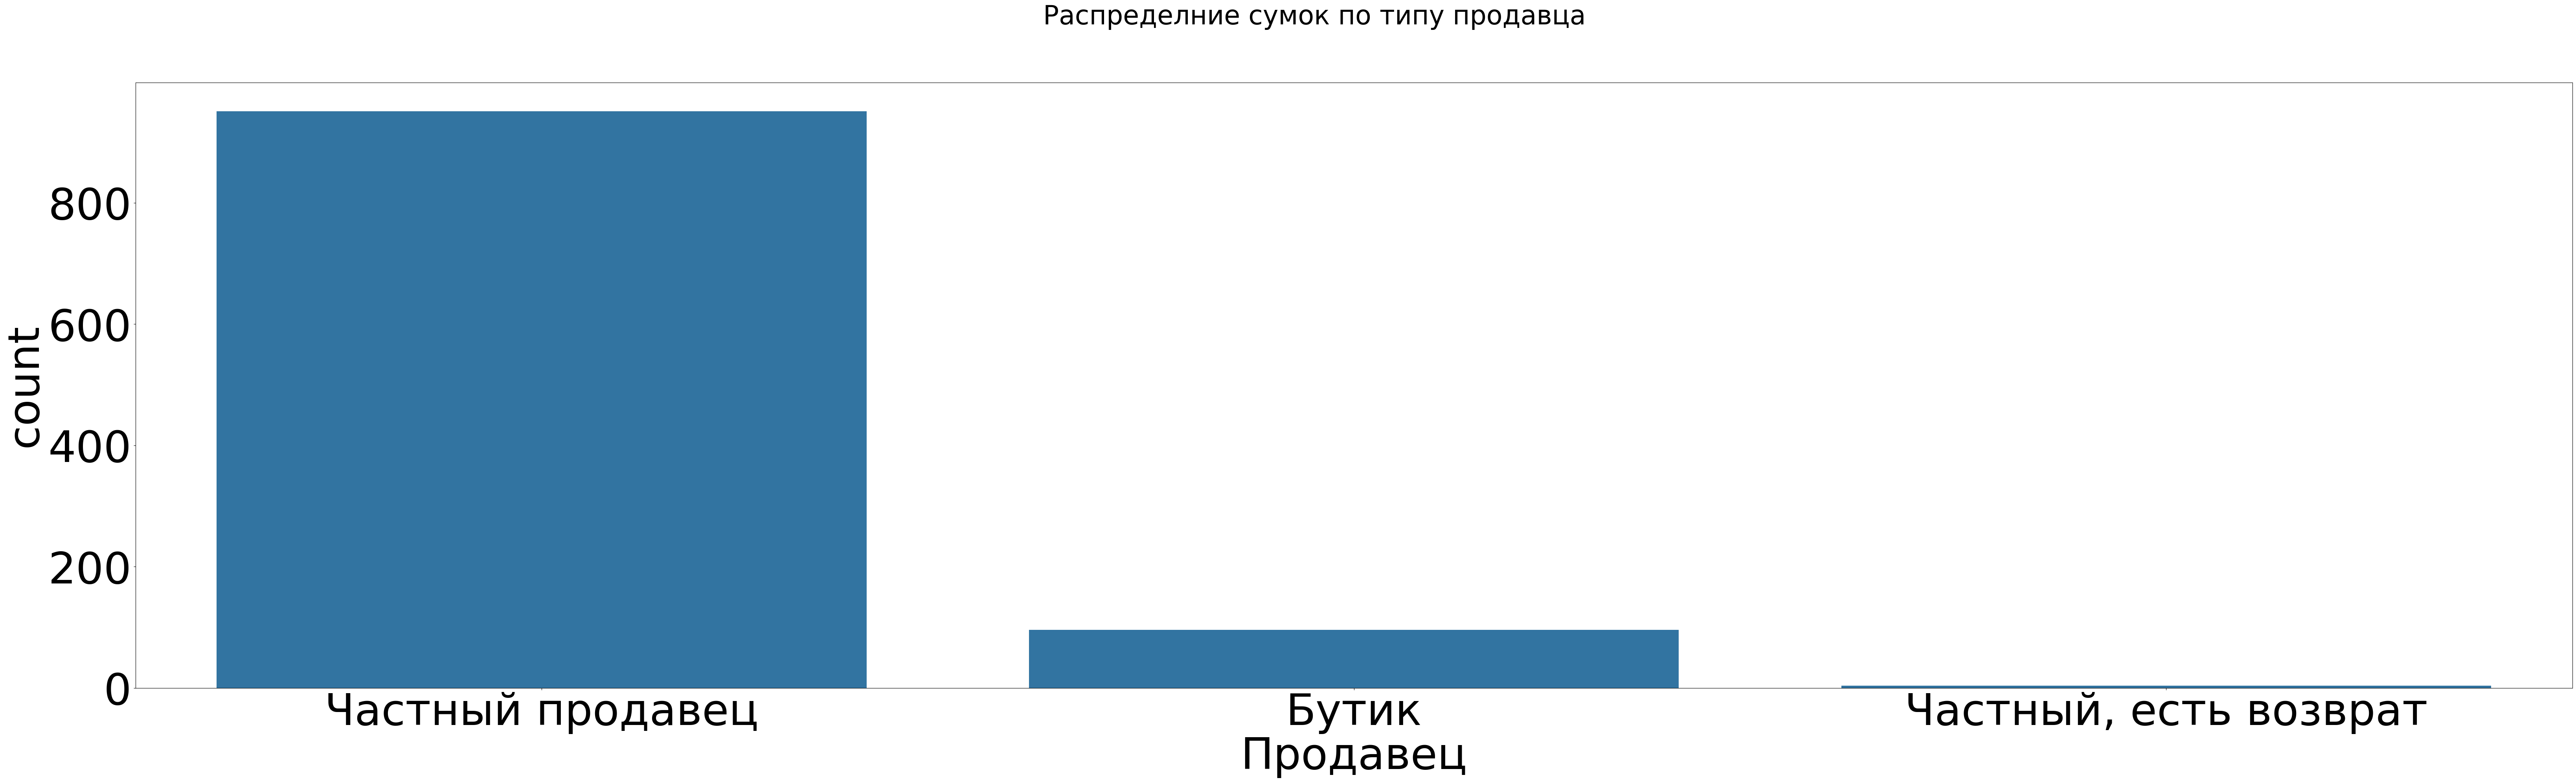

In [35]:
ax, fig = plt.subplots(figsize=(80, 20))
plt.rcParams.update({'font.size':40 })
sns.countplot(x='Продавец', data=df)
plt.suptitle('Распределние сумок по типу продавца')

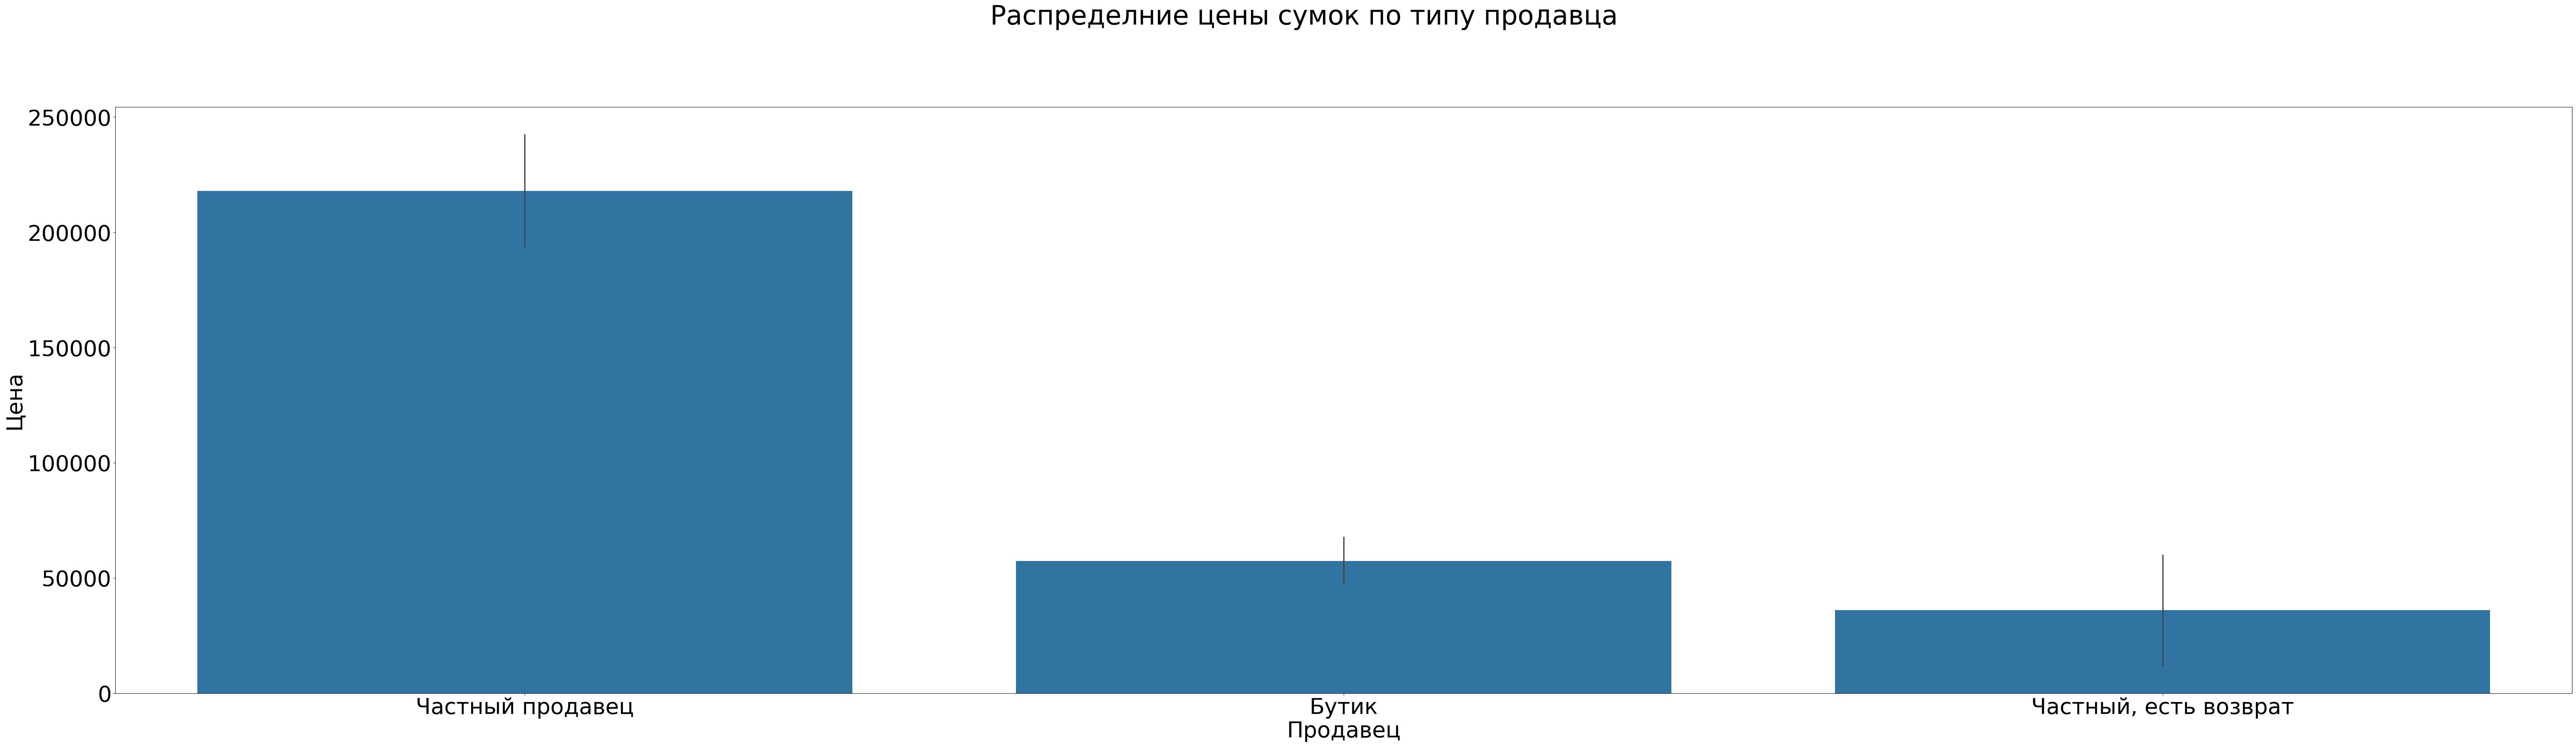

In [36]:
sns.barplot(x="Продавец", y="Цена", data=df)
fig = plt.gcf()
fig.set_size_inches(80, 20)
plt.suptitle('Распределние цены сумок по типу продавца')
plt.subplots_adjust(top=0.85)
plt.show()

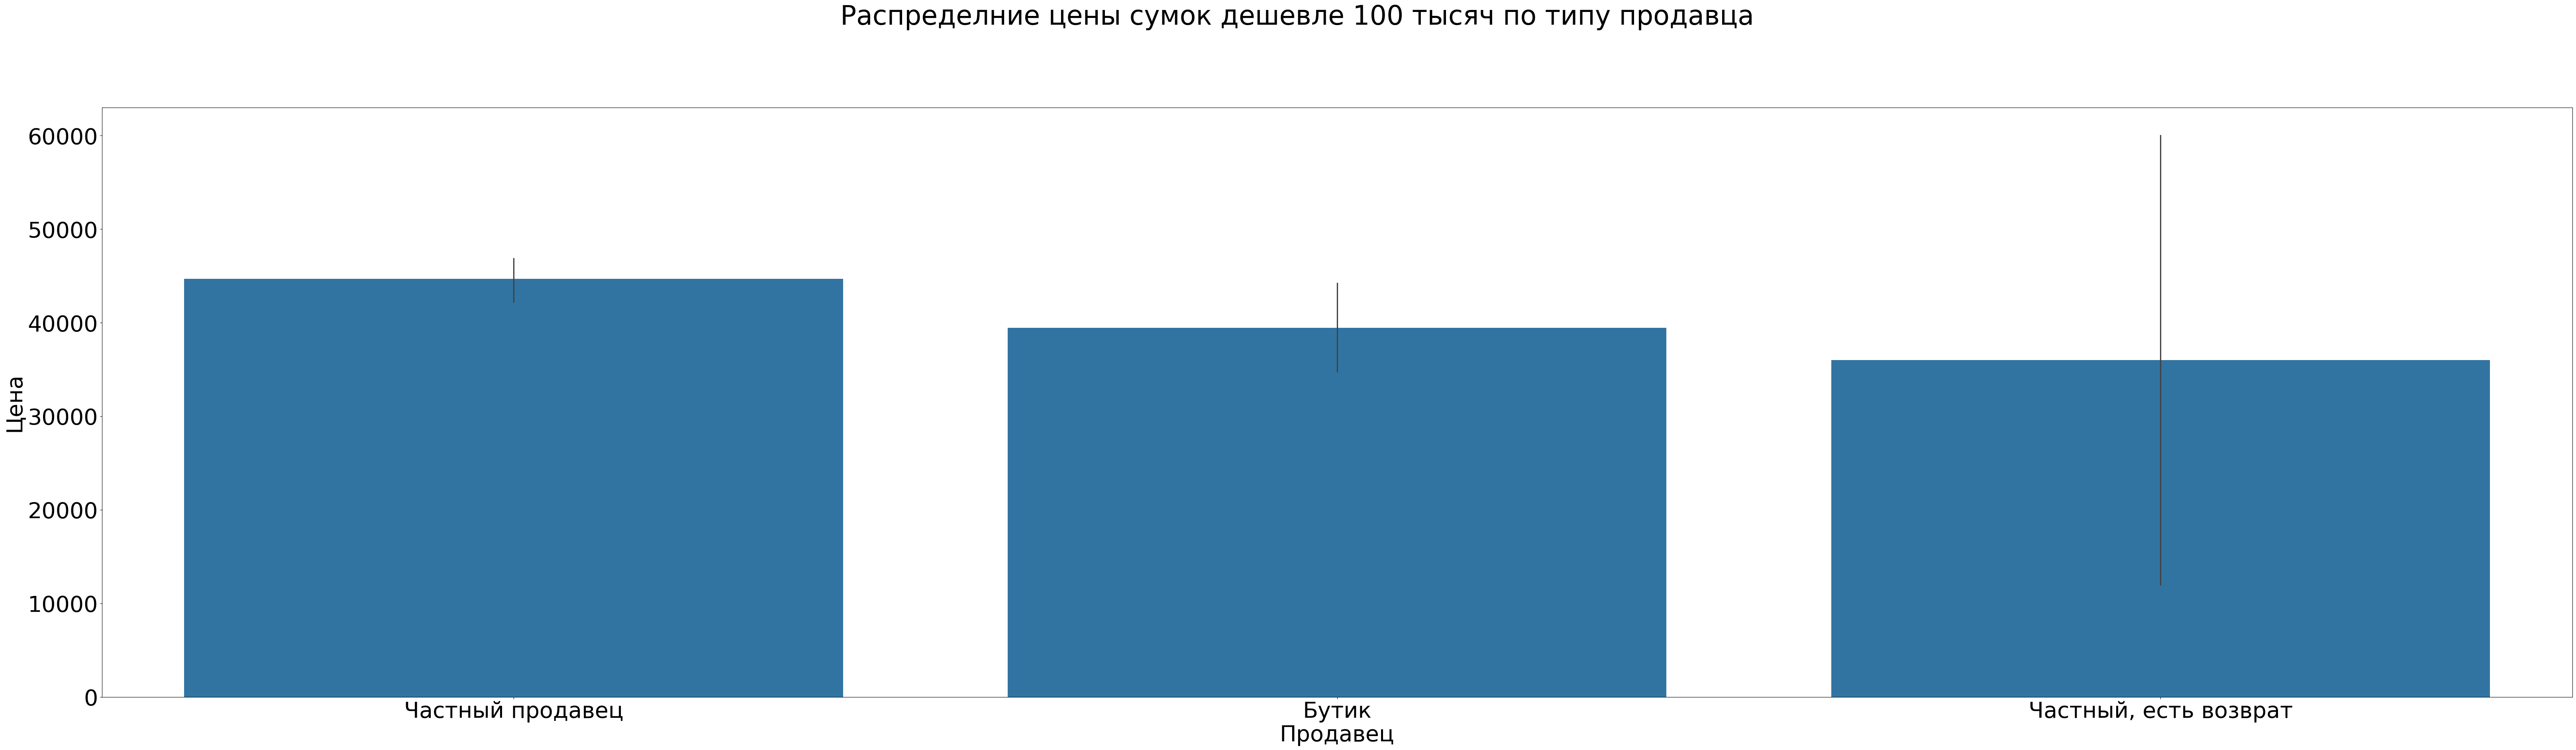

In [37]:
df_less100k=df[df['Цена'] < 100000]
sns.barplot(x="Продавец", y="Цена", data=df_less100k)
fig = plt.gcf()
fig.set_size_inches(80, 20)
plt.suptitle('Распределние цены сумок дешевле 100 тысяч по типу продавца')
plt.subplots_adjust(top=0.85)
plt.show()

Видно, что даже для сумок до 100 тысяч нет того, что сумки с возможностью возврата стоят больше, поэтому удалим этот признак, как неинформативный.

In [38]:
df.drop(columns=['Продавец'], inplace=True)

---

## Рассмотрим распределение цены по размеру

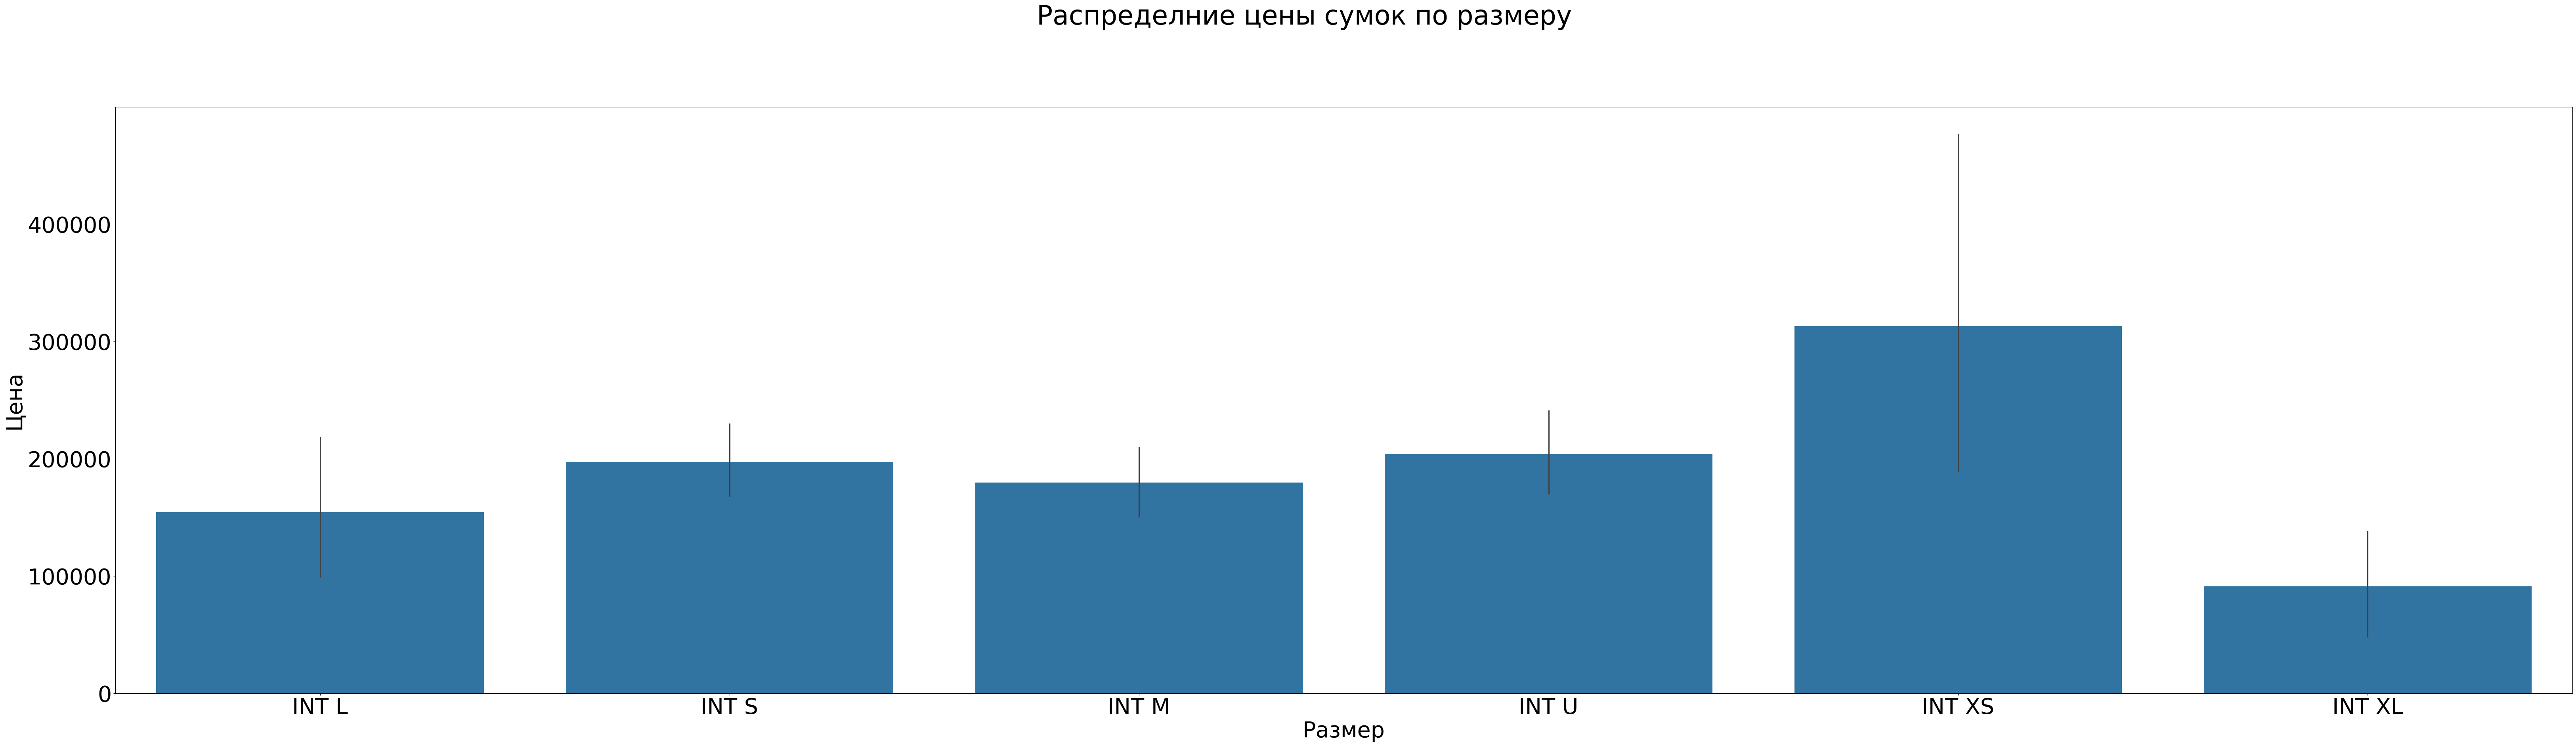

In [39]:
sns.barplot(x="Размер", y="Цена", data=df)
fig = plt.gcf()
fig.set_size_inches(80, 20)
plt.suptitle('Распределние цены сумок по размеру')
plt.subplots_adjust(top=0.85)
plt.show()

**Вывод:** На удивление самыми дорогими оказались сумки размера XS. Это может быть связано с тем, что на вторичной продаже сумки наиболее премиальных брендов больших размеров просто не будут пользоваться спросом, так как люди, которые готовы решится на такую покупку могут непосредственно посетить бутик бренда или воспользоваться услугами баеров, с которыми они уже и так ведут работу. Так как хоть на сайте oskelly и представлены далеко не дешевые сумки, но все-таки это скорее сервис для более широкого ряда людей, чем неприлично богатые.

---

## Рассмотрим распределение цены по цвету сумок

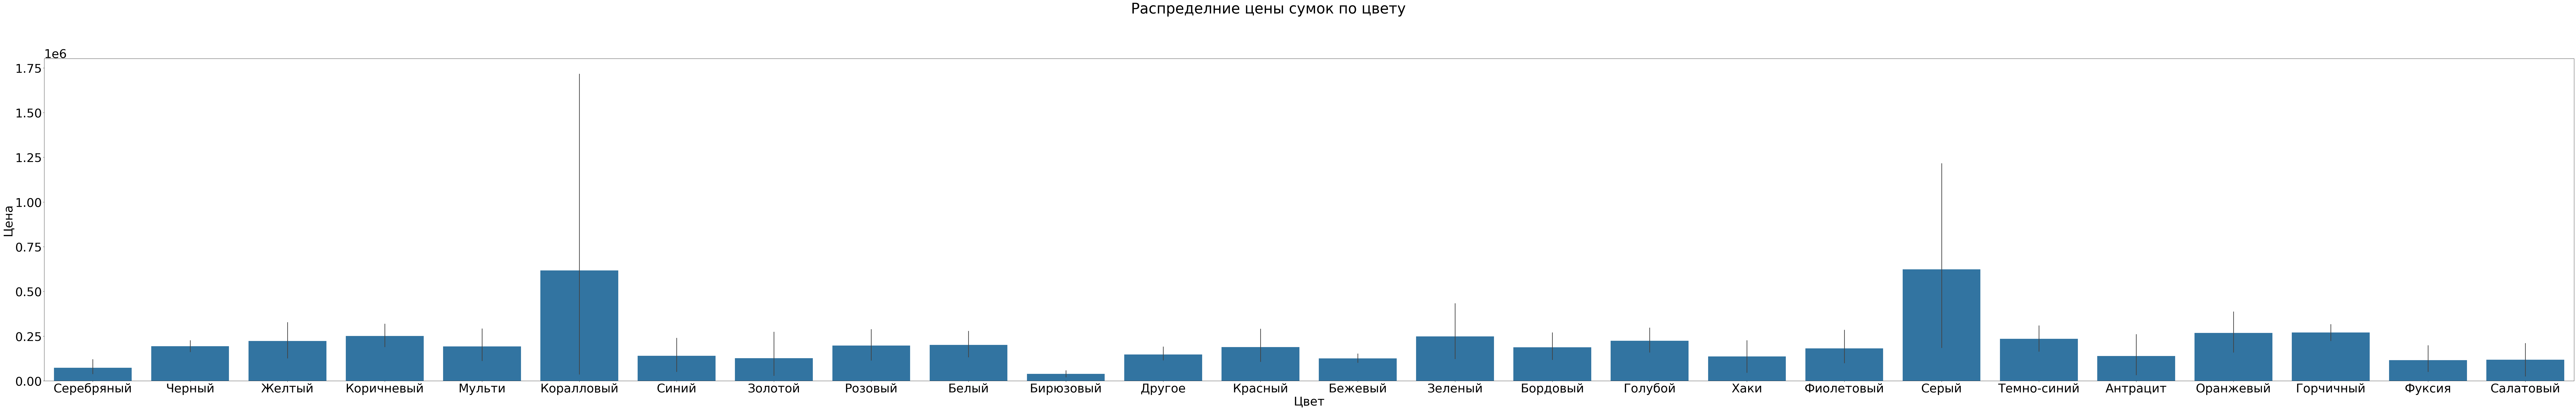

In [40]:
sns.barplot(x="Цвет", y="Цена", data=df)
fig = plt.gcf()
fig.set_size_inches(150, 20)
plt.suptitle('Распределние цены сумок по цвету')
plt.subplots_adjust(top=0.85)
plt.show()

**Вывод:** Полученная диаграмма показывает, что самыми дорогостоящими сумками являются сумки серого и кораллового цветов, значительно опережая базовые белый и черный. Это может объяснятся тем, что самые дорогие сумки бренда Hermes часто выполненые в классическом цвете бренда - коралловом.

---

## Рассмотрим распределение цены по цвету сумок

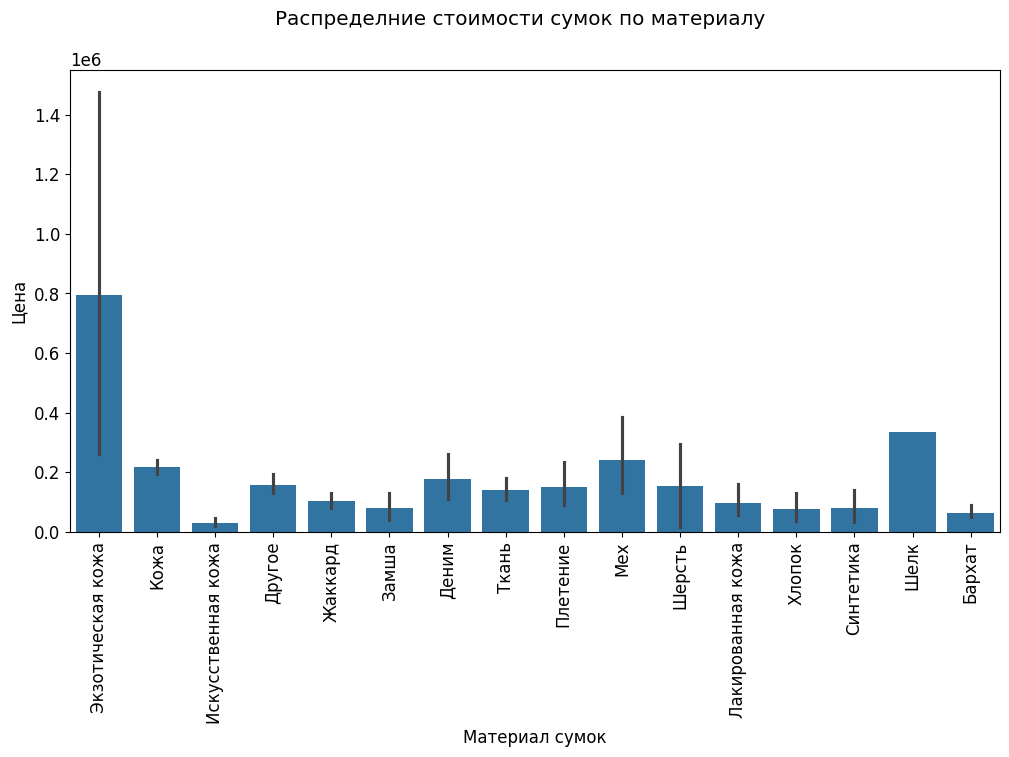

In [55]:
plt.rcParams.update({'font.size':12 })
sns.barplot(x="Материал сумок", y="Цена", data=df)

plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.suptitle('Распределние стоимости сумок по материалу')
plt.show()

**Вывод:** Самые дорогие сумки из экзотической кожи, а самые дешевые - из искусственной, что можно было смело заявить и без графика.

---

## Рассмотрим распределение цены по состоянию товара

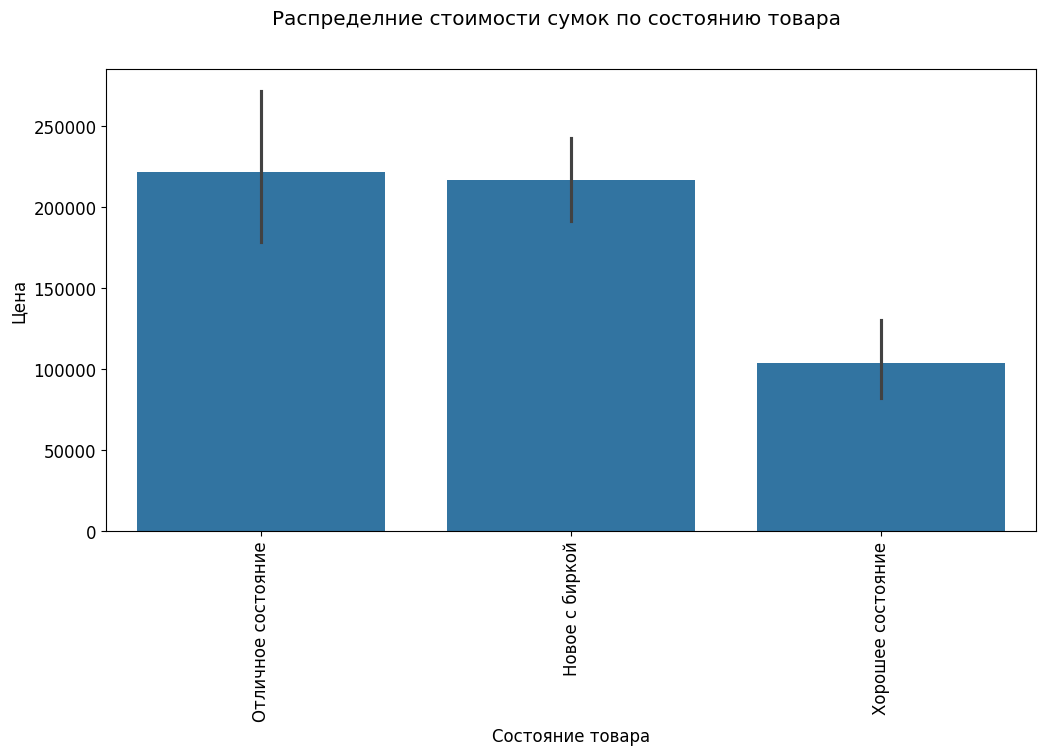

In [56]:
sns.barplot(x="Состояние товара", y="Цена", data=df)

plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.suptitle('Распределние стоимости сумок по состоянию товара')
plt.show()

**Вывод:** сумки с отличным состоянием и новые сумки с биркой почти не отличаются в цене. Это может говорить о том, что особенно дорогие сумки не теряют в стоимости даже если они были в употреблении при условии сохранения товарного вида.

---

## Анализ бинарных признаков

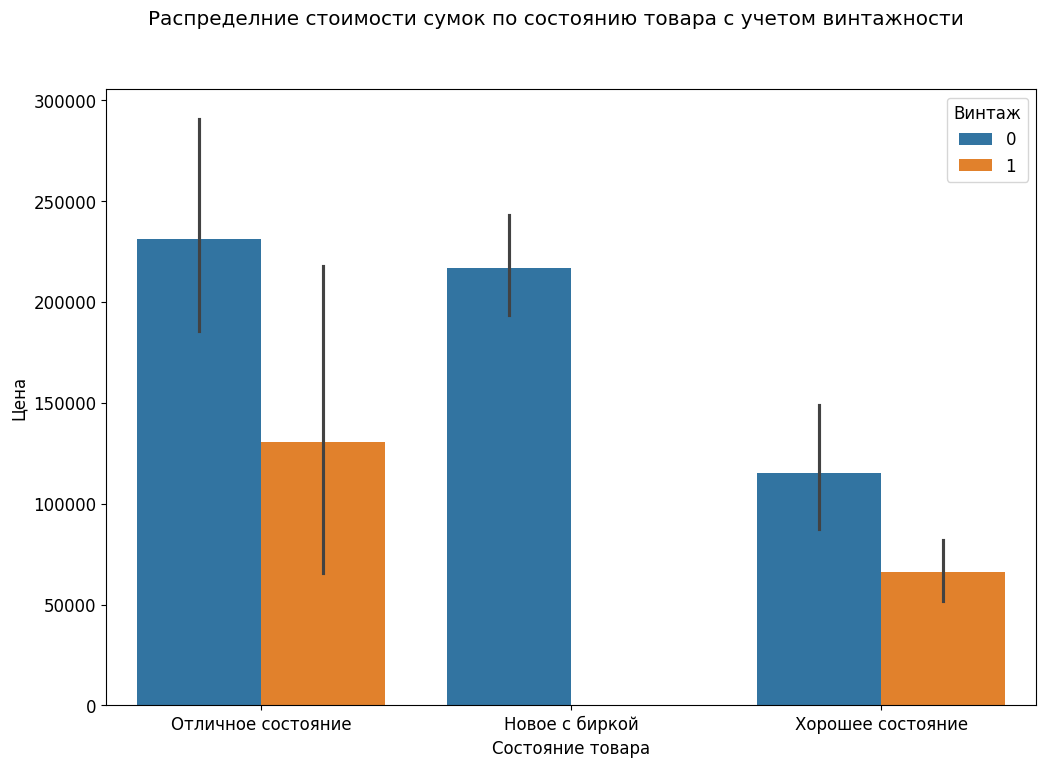

In [57]:
sns.barplot(data=df, x="Состояние товара", y='Цена', hue="Винтаж")
plt.suptitle('Распределние стоимости сумок по состоянию товара с учетом винтажности')
fig = plt.gcf()
fig.set_size_inches(12, 8);

**Вывод:** удивительно, но в среднем не винтажные сумки несмотря на состояние стоят дешевле за редкими выбросами.

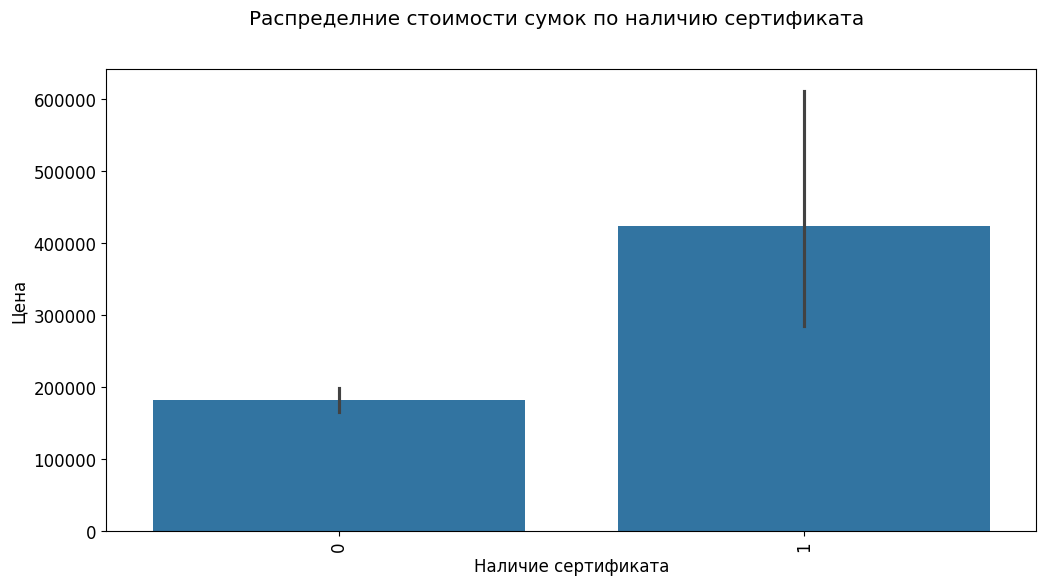

In [58]:
sns.barplot(x="Наличие сертификата", y="Цена", data=df)
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.suptitle('Распределние стоимости сумок по наличию сертификата')
plt.show()

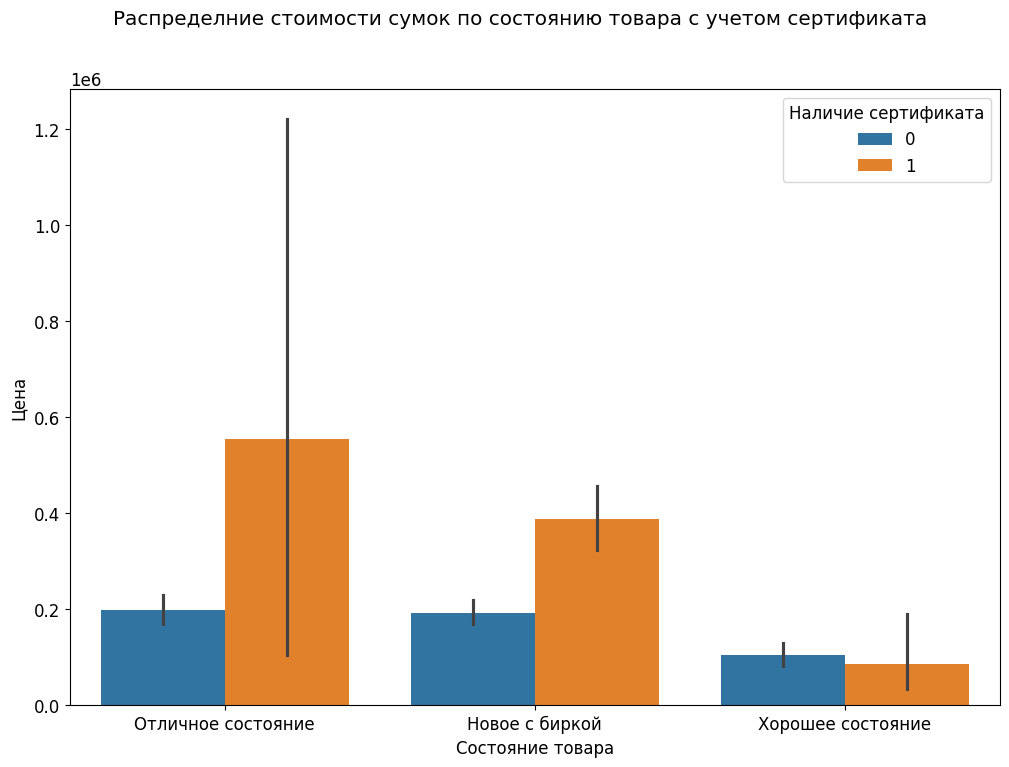

In [59]:
sns.barplot(data=df, x="Состояние товара", y='Цена', hue="Наличие сертификата")
plt.suptitle('Распределние стоимости сумок по состоянию товара с учетом сертификата')
fig = plt.gcf()
fig.set_size_inches(12, 8);

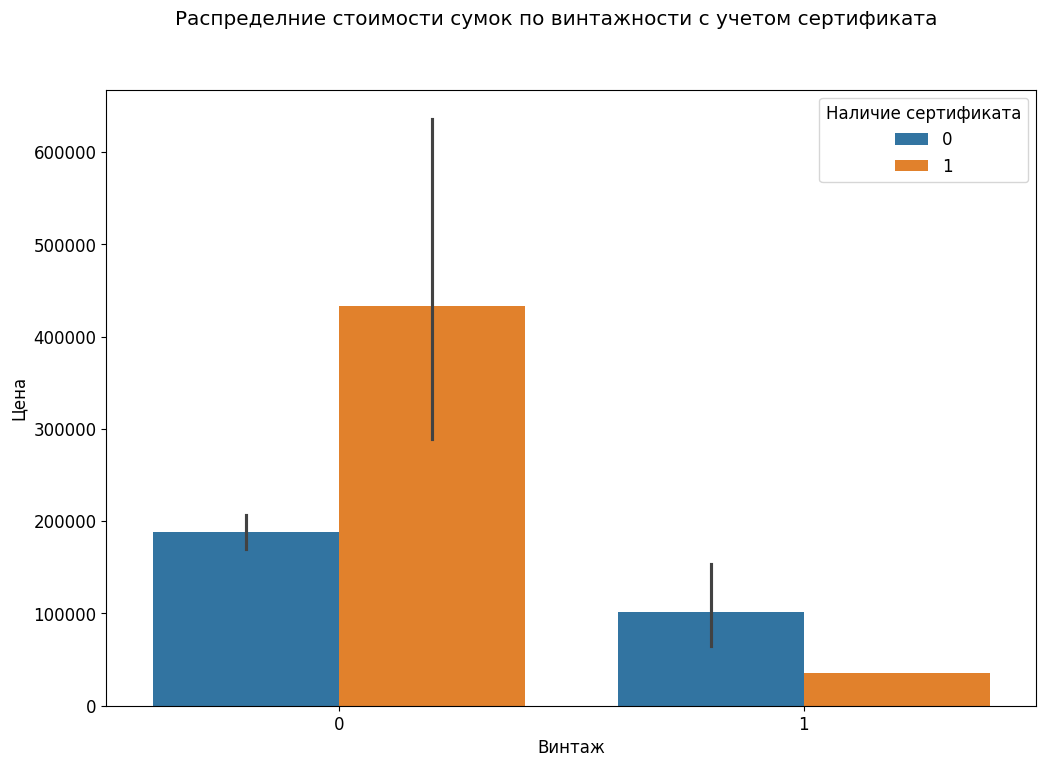

In [60]:
sns.barplot(data=df, x="Винтаж", y='Цена', hue="Наличие сертификата")
plt.suptitle('Распределние стоимости сумок по винтажности с учетом сертификата')
fig = plt.gcf()
fig.set_size_inches(12, 8);

**Вывод:** каким бы не было состояние товара наличие у него сертификата в среднем положительно сказывается на цене. Но винтажным сумкам даже наличие сертификата слабо помогает винтажным сумкам быть дороже хотя бы невинтажных без сертификата.

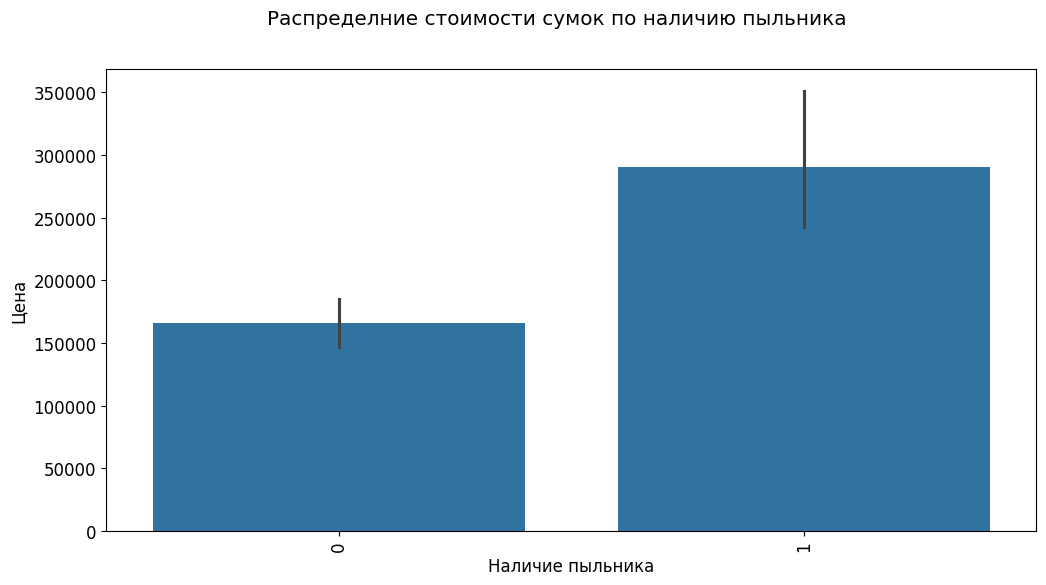

In [61]:
sns.barplot(x="Наличие пыльника", y="Цена", data=df)
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.suptitle('Распределние стоимости сумок по наличию пыльника')
plt.show()

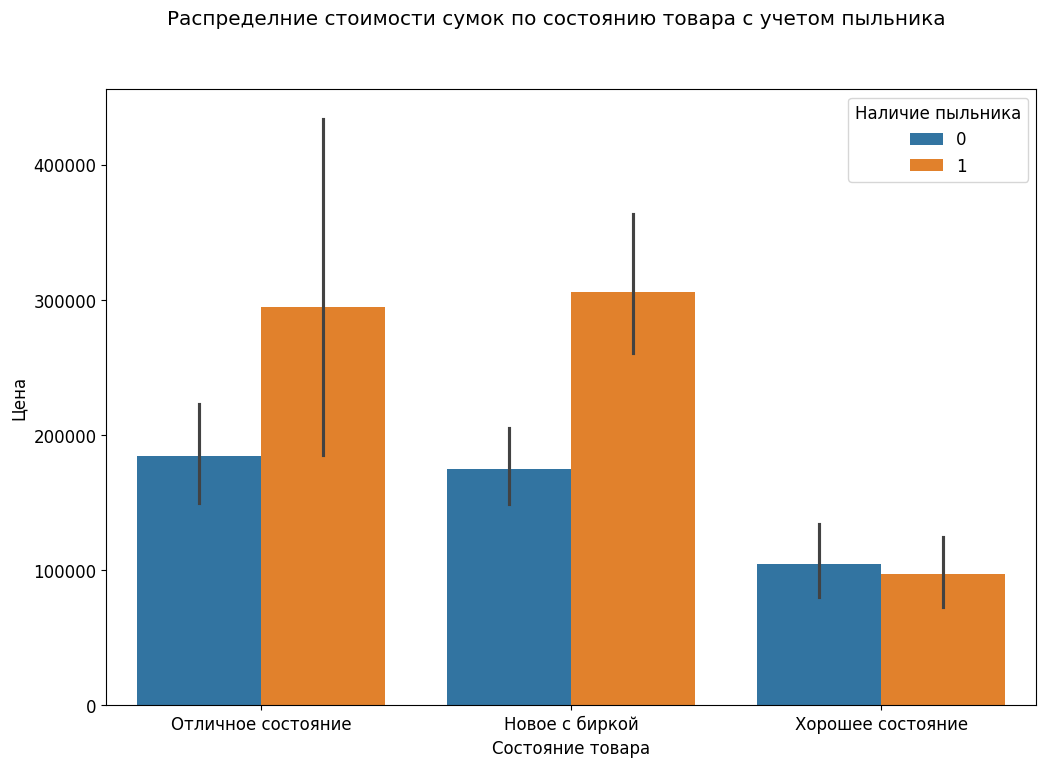

In [62]:
sns.barplot(data=df, x="Состояние товара", y='Цена', hue="Наличие пыльника")
plt.suptitle('Распределние стоимости сумок по состоянию товара с учетом пыльника')
fig = plt.gcf()
fig.set_size_inches(12, 8);

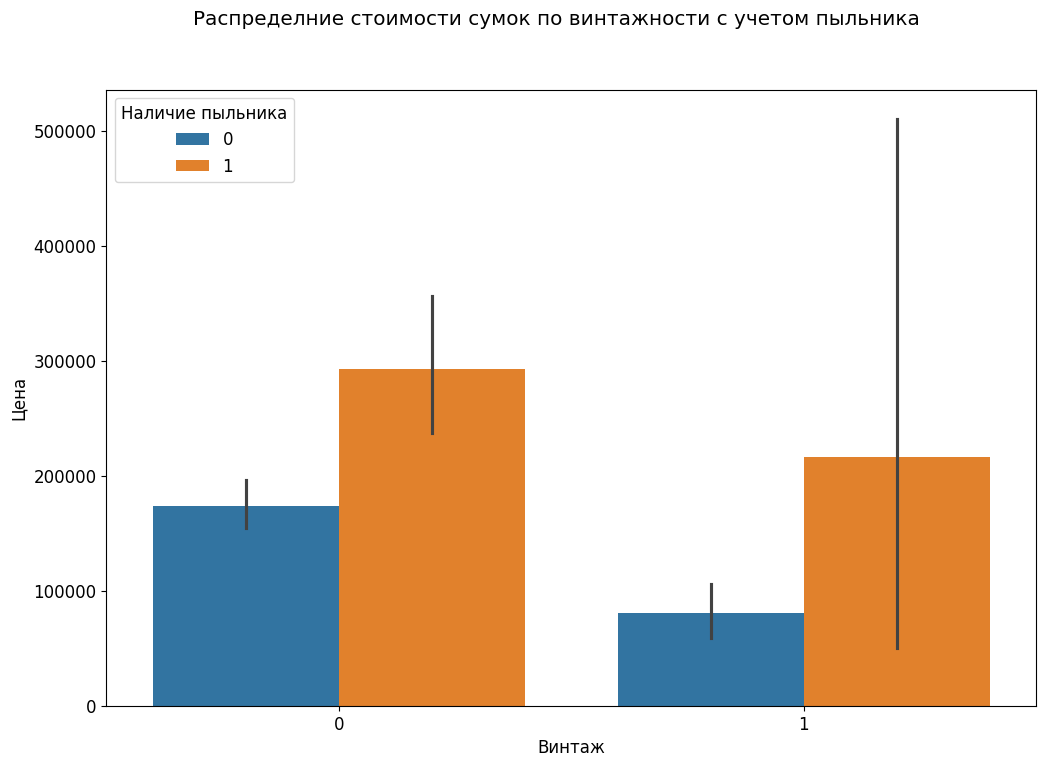

In [63]:
sns.barplot(data=df, x="Винтаж", y='Цена', hue="Наличие пыльника")
plt.suptitle('Распределние стоимости сумок по винтажности с учетом пыльника')
fig = plt.gcf()
fig.set_size_inches(12, 8);

**Вывод:** каким бы не было состояние товара наличие у него пыльника в среднем положительно сказывается на цене. Однако в этот раз наличие пыльника помогло винтажным сумкам стать дороже не винтажных без пыльника. Судя по всему покупателей в винтажных сумках больше смущает отсутсвие пыльника, чем сертификата подлинности

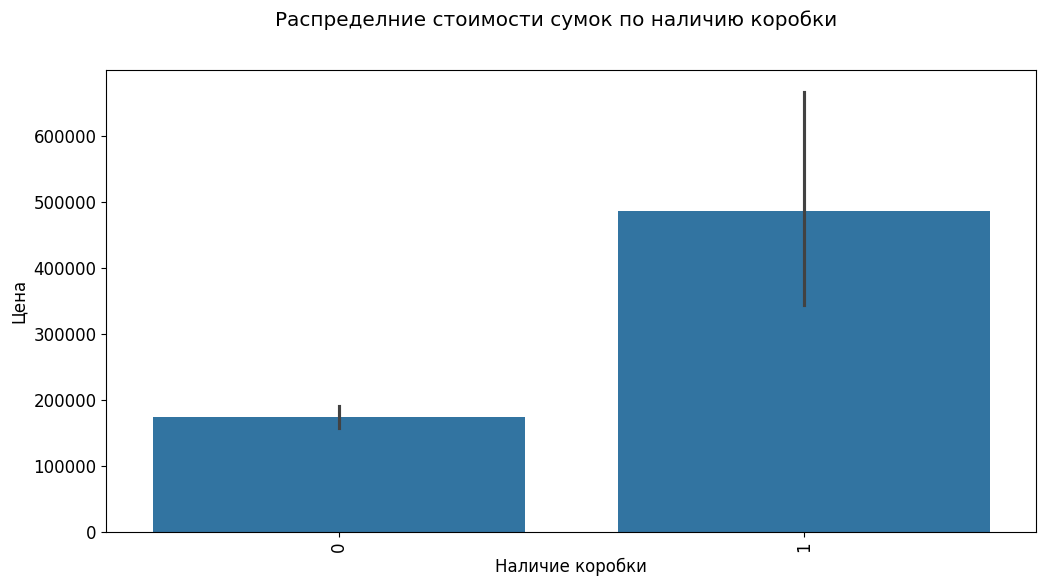

In [64]:
sns.barplot(x="Наличие коробки", y="Цена", data=df)
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.suptitle('Распределние стоимости сумок по наличию коробки')
plt.show()

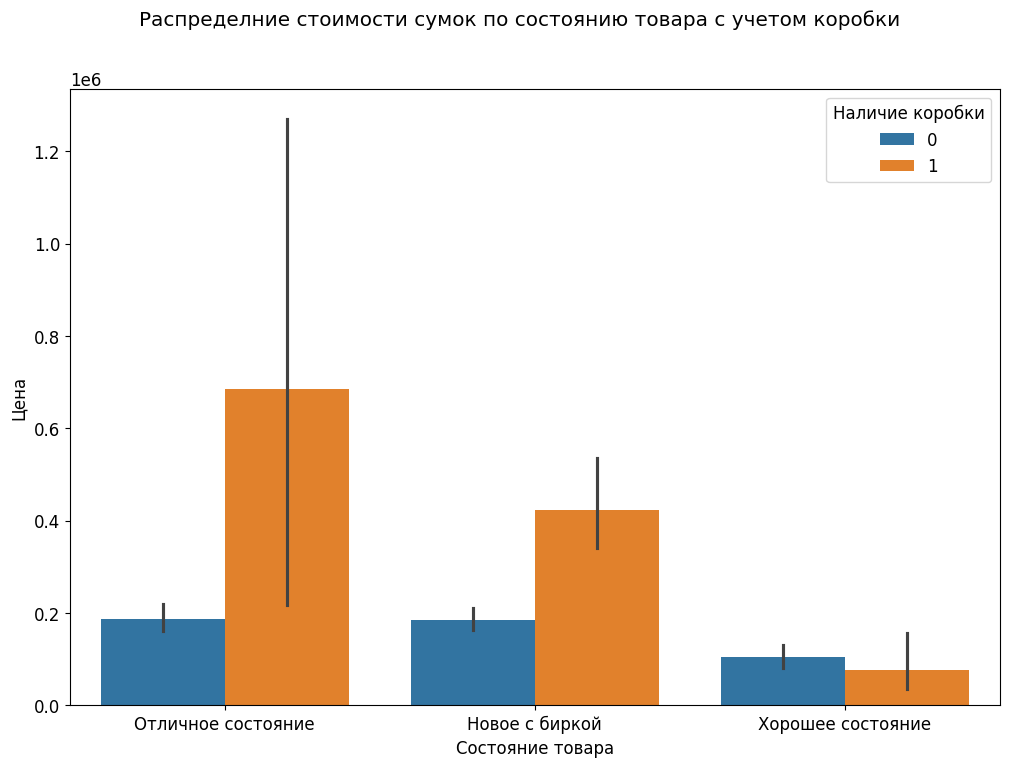

In [65]:
sns.barplot(data=df, x="Состояние товара", y='Цена', hue="Наличие коробки")
plt.suptitle('Распределние стоимости сумок по состоянию товара с учетом коробки')
fig = plt.gcf()
fig.set_size_inches(12, 8);

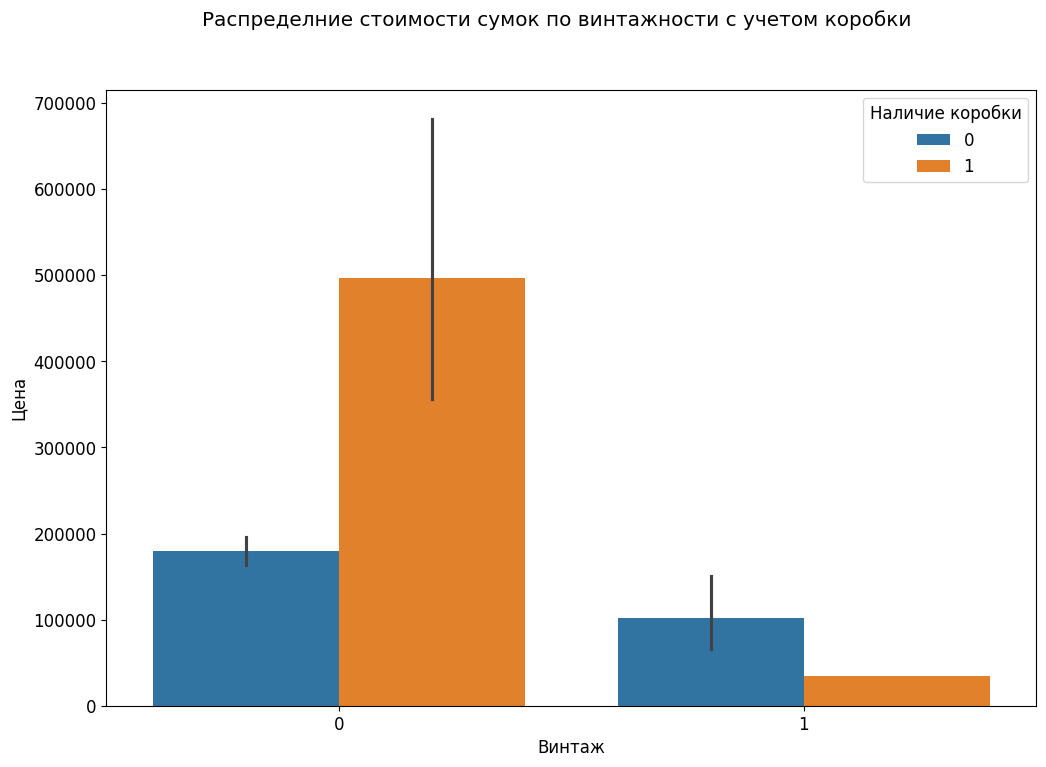

In [66]:
sns.barplot(data=df, x="Винтаж", y='Цена', hue="Наличие коробки")
plt.suptitle('Распределние стоимости сумок по винтажности с учетом коробки')
fig = plt.gcf()
fig.set_size_inches(12, 8);

**Вывод:** Здесь вывод аналогичен наличию сертификата подлинности, но только положительное влияние на цену более слабое.

In [67]:
df.to_csv('df_afterEDA.csv', index=False)